In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="darkgrid")
# import scipy.stats as stats

In [2]:
df_customer = pd.read_csv('customer.csv')
df_click = pd.read_csv('click_stream.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('transactions.csv')

In [3]:
## Use this instead, if you're using colab

# url1='https://drive.google.com/file/d/17B6EQ9TJosC3b_u7ykg5ZpxPIFs2k3EO/view?usp=sharing'
# url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
# df_click = pd.read_csv(url1)

# url2='https://drive.google.com/file/d/1jyytgw3oU2IJPf0AVA6JbW0DZ2dKv2Ge/view?usp=sharing'
# url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
# df_customer = pd.read_csv(url2)

# url3='https://drive.google.com/file/d/1rnTQrQl7IMCGJETDxMhYrAtj1gL3h_Ih/view?usp=sharing'
# url3='https://drive.google.com/uc?id=' + url3.split('/')[-2]
# df_product = pd.read_csv(url3, on_bad_lines='skip')

# url4='https://drive.google.com/file/d/1McJFpLLgyeQ--DcH-N8yF656ltSeoMiz/view?usp=sharing'
# url4='https://drive.google.com/uc?id=' + url4.split('/')[-2]
# df_trans = pd.read_csv(url4)



# Inspeksi dan Cleaning Data

## Dataset Customer

In [4]:
# inspeksi dan cleaning data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [5]:
df_customer.shape

(100000, 15)

In [6]:
df_customer.head()

customer_id first_name    last_name                              username  \
0         2870       Lala      Maryati  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1         8193   Maimunah   Laksmiwati  83be2ba7-8133-48a4-bbcb-b46a2762473f   
2         7279    Bakiman  Simanjuntak  3250e5a3-1d23-4675-a647-3281879d42be   
3        88813    Cahyadi    Maheswara  df797edf-b465-4a80-973b-9fbb612260c2   
4        82542    Irnanto       Wijaya  36ab08e1-03de-42a8-9e3b-59528c798824   

                                               email gender   birthdate  \
0  671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1  83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2  3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   
3  df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M  1991-01-05   
4  36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M  2000-07-15   

  device_type                             device_id  \
0         iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1     Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2         iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3         iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4         iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   

                               device_version  home_location_lat  \
0  iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                               Android 2.2.1          -6.212489   
2       iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3        iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4  iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   

   home_location_long        home_location home_country first_join_date  
0          101.360523       Sumatera Barat    Indonesia      2019-07-21  
1          106.818850         Jakarta Raya    Indonesia      2017-07-16  
2          116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23  
3          115.774934     Kalimantan Timur    Indonesia      2021-10-03  
4          114.924675   Kalimantan Selatan    Indonesia      2021-04-11

In [7]:
df_customer.sample(5)

customer_id first_name  last_name  \
52432        26125     Tantri   Prastuti   
50437        65486      Winda    Hariyah   
51997        27234      Dagel    Prakasa   
52584        51433      Nurul     Yuniar   
53120        68361      Padmi  Mandasari   

                                   username  \
52432  6cfb2093-9757-4e50-bd9d-d8d06044a6cc   
50437  d5189fda-6769-4212-a81b-03f586c3b174   
51997  a3fa93cb-c0dd-4518-bdbc-1ff2041d9a44   
52584  e4a03378-b04a-4c31-9b78-b41ba45ef072   
53120  8249ddbd-1466-421d-b44f-d50b15cbd6b7   

                                                   email gender   birthdate  \
52432  6cfb2093_9757_4e50_bd9d_d8d06044a6cc@startupca...      F  1990-10-18   
50437  d5189fda_6769_4212_a81b_03f586c3b174@startupca...      F  1989-09-20   
51997  a3fa93cb_c0dd_4518_bdbc_1ff2041d9a44@zakyfound...      M  1994-07-29   
52584  e4a03378_b04a_4c31_9b78_b41ba45ef072@startupca...      F  1992-10-08   
53120  8249ddbd_1466_421d_b44f_d50b15cbd6b7@zakyfound...      F  2006-02-22   

      device_type                             device_id  \
52432     Android  0f7f8520-4eb6-4fb8-b7da-92d291b82f53   
50437     Android  ecb41f28-64a4-4fa1-97b0-257dba9a5393   
51997     Android  8e50dad9-8733-4285-9931-b4e2105b6a7f   
52584         iOS  b75d9200-6057-49f7-a6c5-d37659cde5f6   
53120     Android  356ab54c-7602-49ee-87f6-e57c94344eab   

                              device_version  home_location_lat  \
52432                            Android 7.0           1.177161   
50437                            Android 4.2          -3.238191   
51997                          Android 4.1.1           0.798316   
52584  iPad; CPU iPad OS 6_1_6 like Mac OS X          -6.151735   
53120                          Android 4.3.1          -6.274949   

       home_location_long     home_location home_country first_join_date  
52432          124.958239    Sulawesi Utara    Indonesia      2017-02-12  
50437          139.991165             Papua    Indonesia      2018-02-18  
51997          113.571865  Kalimantan Barat    Indonesia      2017-01-01  
52584          106.752598      Jakarta Raya    Indonesia      2021-03-19  
53120          106.771667      Jakarta Raya    Indonesia      2022-01-20

In [8]:
df_customer.duplicated().sum()

0

In [9]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [10]:
#mengubah tipe data yang tidak sesuai
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [12]:
df_customer.describe()

customer_id  home_location_lat  home_location_long
count  100000.000000      100000.000000       100000.000000
mean    50000.500000          -5.106390          110.936081
std     28867.657797           3.088183            6.343363
min         1.000000         -10.845002           95.275319
25%     25000.750000          -7.372650          106.860628
50%     50000.500000          -6.240087          110.162010
75%     75000.250000          -3.092254          113.171187
max    100000.000000           5.818355          140.993119

In [13]:
df_customer.describe(include="O")

first_name last_name                              username  \
count      100000    100000                                100000   
unique        707       173                                100000   
top         Rahmi   Susanti  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
freq          560      1028                                     1   

                                                    email  gender device_type  \
count                                              100000  100000      100000   
unique                                             100000       2           2   
top     671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...       F     Android   
freq                                                    1   64230       76637   

                                   device_id device_version home_location  \
count                                 100000         100000        100000   
unique                                100000             86            33   
top     c9c0de76-0a6c-4ac2-843f-65264ab9fe63  Android 2.2.2  Jakarta Raya   
freq                                       1           1296         18715   

       home_country  
count        100000  
unique            1  
top       Indonesia  
freq         100000

In [14]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30 00:00:00
2016-07-27 00:00:00


In [15]:
df_customer.birthdate.sort_values(ascending=False).head(20)

18437   2016-07-27
95661   2016-02-19
93456   2016-01-29
17262   2016-01-15
35826   2015-10-13
37890   2015-07-19
29371   2015-06-28
70817   2015-06-14
62773   2015-04-07
16333   2015-03-14
16615   2015-03-09
2310    2015-02-11
1403    2015-01-29
90829   2014-12-22
47834   2014-12-20
97162   2014-10-09
32420   2014-10-06
51839   2014-09-02
69462   2014-08-25
74399   2014-07-13
Name: birthdate, dtype: datetime64[ns]

In [16]:
df_customer.birthdate.sort_values(ascending=True).head(20)

76383   1954-06-30
97940   1955-01-01
51075   1955-02-14
76788   1955-05-04
76539   1955-06-01
52243   1957-01-02
13873   1957-01-04
15502   1958-08-19
59294   1959-02-28
27158   1960-10-31
13360   1960-11-20
83810   1960-11-29
47851   1961-04-03
77032   1961-07-20
40452   1961-09-06
17233   1962-04-21
14661   1962-06-26
56343   1962-07-11
58820   1962-07-29
85063   1962-07-29
Name: birthdate, dtype: datetime64[ns]

In [17]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30 00:00:00
2022-07-31 00:00:00


In [18]:
df_customer.first_join_date.sort_values(ascending=False).head(20)

81493   2022-07-31
53302   2022-07-31
6797    2022-07-31
16385   2022-07-31
1110    2022-07-31
13622   2022-07-31
27279   2022-07-31
49564   2022-07-31
57854   2022-07-31
27322   2022-07-31
91303   2022-07-31
56114   2022-07-31
27330   2022-07-31
5198    2022-07-31
82320   2022-07-31
37041   2022-07-31
85429   2022-07-31
49471   2022-07-31
14594   2022-07-31
16552   2022-07-31
Name: first_join_date, dtype: datetime64[ns]

In [19]:
df_customer.first_join_date.sort_values(ascending=True).head(20)

77238   2016-06-30
42782   2016-06-30
76057   2016-06-30
73575   2016-06-30
88919   2016-06-30
78050   2016-06-30
86170   2016-07-01
44347   2016-07-01
5767    2016-07-01
36203   2016-07-01
5708    2016-07-01
73421   2016-07-01
62964   2016-07-01
33957   2016-07-01
9576    2016-07-01
35809   2016-07-01
93141   2016-07-02
55931   2016-07-02
74017   2016-07-02
52067   2016-07-02
Name: first_join_date, dtype: datetime64[ns]

In [20]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [21]:
print(df_customer.email.apply(len).min())
print(df_customer.email.apply(len).max())

53
55


In [22]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [23]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

### Interesting Discovery

* Most columns have the data type object. It appears that every column **NOT contains** empty value since the Non-Null count for every column is equal with the total number of rows (100000) **nor** the data contains duplicated data.
* Dataset ini memiliki 20 kolom dan 100000 baris.
* Periode pengambilan data 2016-06-30 hingga 2022-07-31
* Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016.
* Terdapat 4 customer yang lahir pada tahun 2016, 9 customer yang lahir pada tahun 2015.
* Sebanyak 64230 customer berjenis kelamin perempuan
* Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
* Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
* It seems that there is no outlier in this dataset, **Ready for some EDA?**

## Product Dataset

In [24]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [25]:
df_product.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [26]:
df_product.duplicated().sum()

0

In [27]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [28]:
df_product.describe()

id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000

In [29]:
df_product.describe(include="O")

gender masterCategory subCategory articleType baseColour  season  \
count   44424          44424       44424       44424      44409   44403   
unique      5              7          45         143         46       4   
top       Men        Apparel     Topwear     Tshirts      Black  Summer   
freq    22147          21397       15402        7067       9728   21472   

         usage            productDisplayName  
count    44107                         44417  
unique       8                         31121  
top     Casual  Lucera Women Silver Earrings  
freq     34406                            82

In [30]:
#mengubah nama kolom gender product, agar berbeda dengan gender customer
df_product.gender = df_product.rename(columns = {'gender' : 'gender_product'}, inplace = True)

### Data Cleaning
Dapat dilihat dari statistik deskriptif di atas bahwa dataset ini, terdapat tipe data yang tidak sesuai dan memelurkan data cleaning

In [31]:
#Mengubah tipe data kolom year
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [32]:
fixed_product = df_product.copy()

In [33]:
fixed_product[fixed_product.articleType == "Jeans"].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count             609            609         609         609        603   
unique              5              1           1           1         11   
top               Men        Apparel  Bottomwear       Jeans       Blue   
freq              332            609         609         609        446   

        season   usage                productDisplayName  
count      609     609                               609  
unique       4       1                               299  
top     Summer  Casual  Locomotive Men Washed Blue Jeans  
freq       359     609                                27

In [34]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         605     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          103     613     601                                7

In [35]:
fixed_product[fixed_product.articleType == "Face Moisturisers"].describe(include="O")

gender_product masterCategory subCategory        articleType  \
count              61             61          61                 61   
unique              1              1           2                  1   
top             Women  Personal Care        Skin  Face Moisturisers   
freq               61             61          54                 61   

       baseColour  season   usage                           productDisplayName  
count          60      61      48                                           61  
unique         10       1       1                                           60  
top         White  Spring  Casual  Lotus Herbals Cocomoist Moisturising Lotion  
freq           27      61      48                                            2

In [36]:
fixed_product[fixed_product.baseColour.isna()]

id gender_product masterCategory subCategory            articleType  \
6206   11293            Men        Apparel  Bottomwear                  Jeans   
9516   41347            Men        Apparel  Bottomwear                  Jeans   
12763  11288            Men        Apparel  Bottomwear                  Jeans   
14291  30991          Women  Personal Care   Fragrance  Perfume and Body Mist   
15526  57698          Women  Personal Care        Skin      Face Moisturisers   
15708  41355            Men        Apparel  Bottomwear                  Jeans   
17268  43122            Men  Personal Care   Fragrance  Perfume and Body Mist   
17639  45687            Men  Personal Care   Fragrance  Perfume and Body Mist   
20209  11309            Men        Apparel  Bottomwear                  Jeans   
23484  45698          Women  Personal Care   Fragrance  Perfume and Body Mist   
34553  41357            Men        Apparel  Bottomwear                  Jeans   
37531  30992            Men  Personal Care   Fragrance  Perfume and Body Mist   
40675  43119            Men  Personal Care   Fragrance  Perfume and Body Mist   
43260  43116          Women  Personal Care   Fragrance  Perfume and Body Mist   
44224  43120            Men  Personal Care   Fragrance  Perfume and Body Mist   

      baseColour  season    year   usage  \
6206         NaN    Fall  2016.0  Casual   
9516         NaN    Fall  2016.0  Casual   
12763        NaN    Fall  2016.0  Casual   
14291        NaN  Spring  2017.0     NaN   
15526        NaN  Spring  2017.0  Casual   
15708        NaN    Fall  2016.0  Casual   
17268        NaN  Spring  2017.0     NaN   
17639        NaN  Spring  2017.0     NaN   
20209        NaN    Fall  2016.0  Casual   
23484        NaN  Spring  2017.0     NaN   
34553        NaN    Fall  2016.0  Casual   
37531        NaN  Spring  2017.0     NaN   
40675        NaN  Spring  2017.0     NaN   
43260        NaN  Spring  2017.0     NaN   
44224        NaN  Spring  2017.0     NaN   

                                      productDisplayName  
6206                       Wrangler Men Blue Texas Jeans  
9516                      Wrangler Men Black Texas Jeans  
12763                      Wrangler Men Blue Texas Jeans  
14291                                                NaN  
15526  Lotus Herbals Quincenourish Quince Seed Nouris...  
15708                    Wrangler Men Blue Millard Jeans  
17268                    GUESS Man Eau De Toilette 75 ml  
17639                                                NaN  
20209                      Wrangler Men Blue Floyd Jeans  
23484                                                NaN  
34553                    Wrangler Men Blue Millard Jeans  
37531                                                NaN  
40675                                                NaN  
43260                    GUESS Seductive Women EDT Spray  
44224        GUESS by Marciano Men Eau De Toilette 50 ml

#### Cleaning kolom baseColour

In [37]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Face Moisturisers)
fixed_product.at[15526, "baseColour"] = "White"

In [38]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Jeans)
fixed_product.at[6206, "baseColour"] = "Blue"
fixed_product.at[9516, "baseColour"] = "Blue"
fixed_product.at[12763, "baseColour"] = "Blue"
fixed_product.at[15708, "baseColour"] = "Blue"
fixed_product.at[20209, "baseColour"] = "Blue"
fixed_product.at[34553, "baseColour"] = "Blue"

In [39]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist)
fixed_product.at[14291, "baseColour"] = "Blue"
fixed_product.at[17268, "baseColour"] = "Blue"
fixed_product.at[17639, "baseColour"] = "Blue"
fixed_product.at[23484, "baseColour"] = "Blue"
fixed_product.at[37531, "baseColour"] = "Blue"
fixed_product.at[40675, "baseColour"] = "Blue"
fixed_product.at[43260, "baseColour"] = "Blue"
fixed_product.at[44224, "baseColour"] = "Blue"

In [40]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom season

In [41]:
fixed_product['season'] = fixed_product['season'].fillna(fixed_product['season'].mode()[0])

In [42]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom year

In [43]:
fixed_product.loc[21270:21274, :]

id gender_product masterCategory subCategory   articleType  \
21270   5411          Women       Footwear       Shoes  Sports Shoes   
21271  44736            Men       Footwear       Shoes  Formal Shoes   
21272  53781            Men        Apparel     Topwear       Tshirts   
21273  34441          Women        Apparel     Topwear       Tshirts   
21274   6294            Men        Apparel     Topwear       Tshirts   

      baseColour  season    year   usage  \
21270      Black    Fall  2011.0  Sports   
21271      Black  Summer  2012.0  Formal   
21272       Blue  Summer     NaN  Sports   
21273     Yellow  Summer  2012.0  Casual   
21274      Green  Summer  2011.0  Casual   

                                     productDisplayName  
21270                    Tribord To 100 Basic Lady Ss11  
21271            U.S. Polo Assn. Men Black Formal Shoes  
21272            Puma Men Blue Sless Round Neck T-shirt  
21273  Myntra Women Peace Love Chocolate Yellow T-shirt  
21274          UCB Men's Super Star Print Green T-shirt

In [44]:
#Mengubah missing value pada kolom year dengan mode
fixed_product['year'] = fixed_product['year'].fillna(fixed_product['year'].mode()[0])

#### Cleaning kolom productDisplayName

In [45]:
fixed_product[fixed_product.productDisplayName.isna()]

id gender_product masterCategory subCategory            articleType  \
3677   42878          Women    Accessories        Bags               Clutches   
14291  30991          Women  Personal Care   Fragrance  Perfume and Body Mist   
17639  45687            Men  Personal Care   Fragrance  Perfume and Body Mist   
22089  42863          Women    Accessories        Bags               Clutches   
23484  45698          Women  Personal Care   Fragrance  Perfume and Body Mist   
37531  30992            Men  Personal Care   Fragrance  Perfume and Body Mist   
40675  43119            Men  Personal Care   Fragrance  Perfume and Body Mist   

      baseColour  season    year   usage productDisplayName  
3677      Maroon  Summer  2012.0  Casual                NaN  
14291       Blue  Spring  2017.0     NaN                NaN  
17639       Blue  Spring  2017.0     NaN                NaN  
22089      Brown  Summer  2012.0  Casual                NaN  
23484       Blue  Spring  2017.0     NaN                NaN  
37531       Blue  Spring  2017.0     NaN                NaN  
40675       Blue  Spring  2017.0     NaN                NaN

In [46]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         613     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          111     613     601                                7

In [47]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Maroon")].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count              12             12          12          12         12   
unique              1              1           1           1          1   
top             Women    Accessories        Bags    Clutches     Maroon   
freq               12             12          12          12         12   

        season   usage               productDisplayName  
count       12      12                               11  
unique       2       1                                8  
top     Summer  Casual  Lino Perros Women Maroon Clutch  
freq         9      12                                3

In [48]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Brown")].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count              17             17          17          17         17   
unique              1              1           1           1          1   
top             Women    Accessories        Bags    Clutches      Brown   
freq               17             17          17          17         17   

        season   usage        productDisplayName  
count       17      17                        16  
unique       3       1                        13  
top     Summer  Casual  Rocia Women Brown Clutch  
freq        14      17                         3

In [49]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist) dan baseColour
fixed_product.at[3677, "productDisplayName"] = "Lino Perros Women Maroon Clutch"
fixed_product.at[22089, "productDisplayName"] = "Rocia Women Brown Clutch"

In [50]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         613     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          111     613     601                                7

In [51]:
#Mengubah missing value pada kolom productDisplayName dengan mode
fixed_product['productDisplayName'] = fixed_product['productDisplayName'].fillna(fixed_product['productDisplayName'].mode()[0])

#### Cleaning kolom year

In [52]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [53]:
fixed_product.usage.describe(include="O")

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object

In [54]:
fixed_product[fixed_product.usage.isna()]

id gender_product masterCategory       subCategory  \
87     56489          Women  Personal Care             Nails   
92     52029         Unisex        Apparel           Topwear   
292    55001          Women  Personal Care              Lips   
479    57563          Women  Personal Care              Lips   
511    55006          Women  Personal Care              Lips   
...      ...            ...            ...               ...   
43633  56605          Women  Personal Care            Makeup   
44079  57715          Women  Personal Care              Lips   
44224  43120            Men  Personal Care         Fragrance   
44227  55045          Women  Personal Care              Lips   
44343   6839         Unisex    Accessories  Shoe Accessories   

                 articleType    baseColour  season    year usage  \
87               Nail Polish        Bronze  Spring  2017.0   NaN   
92               Rain Jacket  Coffee Brown  Summer  2012.0   NaN   
292                 Lipstick          Pink  Spring  2017.0   NaN   
479                 Lipstick         Brown  Spring  2017.0   NaN   
511                Lip Gloss        Copper  Spring  2017.0   NaN   
...                      ...           ...     ...     ...   ...   
43633     Kajal and Eyeliner         Black  Spring  2017.0   NaN   
44079              Lip Gloss           Red  Spring  2017.0   NaN   
44224  Perfume and Body Mist          Blue  Spring  2017.0   NaN   
44227               Lipstick        Purple  Spring  2017.0   NaN   
44343       Shoe Accessories         Black  Winter  2015.0   NaN   

                                      productDisplayName  
87                       Streetwear Ash Nail Polish # 31  
92              Just Natural Unisex Charcoal Rain Jacket  
292          Lakme Absolute Lip Last Day Kiss Lip Colour  
479    Lotus Herbals Pure Colours Nutty Brown Lipstic...  
511                       Lakme Sheer Satin Lip Gloss 51  
...                                                  ...  
43633                      Streetwear Black Eye Liner 01  
44079  Lotus Herbals Seduction Sappy Watermelon Lip G...  
44224        GUESS by Marciano Men Eau De Toilette 50 ml  
44227                   Lakme Enrich Satins Lipstick 461  
44343         Timberland Unisex Waximum Shoe Accessories  

[317 rows x 10 columns]

In [55]:
#Mengubah missing value pada kolom usage dengan mode
fixed_product['usage'] = fixed_product['usage'].fillna(fixed_product['usage'].mode()[0])

In [56]:
fixed_product.isna().sum()

id                    0
gender_product        0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

## Transactions Dataset

In [57]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [58]:
df_trans.describe()

customer_id   promo_amount   shipment_fee  shipment_location_lat  \
count  852584.000000  852584.000000  852584.000000          852584.000000   
mean    49839.202245    2042.077949    9189.675152              -5.111961   
std     28999.324142    3063.481424    9377.856335               3.081469   
min         3.000000       0.000000       0.000000             -10.995516   
25%     24563.000000       0.000000       0.000000              -7.377923   
50%     49619.000000       0.000000   10000.000000              -6.241318   
75%     74957.000000    3993.000000   10000.000000              -3.088419   
max     99999.000000   24519.000000   50000.000000               5.874791   

       shipment_location_long  total_amount  
count           852584.000000  8.525840e+05  
mean               110.966216  5.499165e+05  
std                  6.398510  8.153761e+05  
min                 95.030728  1.089800e+04  
25%                106.863926  2.037938e+05  
50%                110.168478  3.029890e+05  
75%                113.194940  5.147022e+05  
max                141.006140  2.350449e+07

In [59]:
# Ubah Tipe Data shipment_date_limit
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

In [60]:
# Ubah tipe data created_id
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

In [61]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
product_metadata                       object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
dtype: object

In [62]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [63]:
# Cek Data Unik
df_trans.nunique()

created_at                852584
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       852584
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [64]:
# Cek Missing Value
df_trans.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [65]:
# Handling Missing Value
df_trans['promo_code'].fillna('NOPROMO', inplace=True)

In [66]:
# Hapus spesial character pada kolom produtc_metadata
df_trans['product_metadata'].replace("[^\w\s]", ' ', regex=True, inplace=True)

In [67]:
print('total pembelian tertinggi: ',df_trans['total_amount'].max())
print('total pembelian terendah: ',df_trans['total_amount'].min())

total pembelian tertinggi:  23504487
total pembelian terendah:  10898


In [68]:
# Membuat Kolom id dengan product_id isi dari kolom product metadata
df_trans['id'] = df_trans.product_metadata.str[15:21]
df_trans['id'] = pd.to_numeric(df_trans['id'], errors='coerce')

In [69]:
# Membuat Kolom qty dengan quantity dari kolom product metadata
df_trans['qty'] = df_trans.product_metadata.str[34:36]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['qty'] = pd.to_numeric(df_trans['qty'], errors='coerce')
#df_trans['qty'].value_counts()

In [70]:
# Membuat Kolom price dengan item_price dari kolom product metadata
df_trans['price'] = df_trans.product_metadata.str[51:58]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['price'] = pd.to_numeric(df_trans['price'], errors='coerce')
#df_trans['price'].value_counts()

## Click Stream Dataset

In [71]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [72]:
df_click.shape

(12833602, 6)

In [73]:
df_click.head()

session_id   event_name  \
0  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   
1  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   
2  7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   
3  7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   
4  7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   

                    event_time                              event_id  \
0  2019-09-06T15:54:32.821085Z  9c4388c4-c95b-4678-b5ca-e9cbc0734109   
1  2019-09-06T16:03:57.821085Z  4690e1f5-3f99-42d3-84a5-22c4c4d8500a   
2  2019-09-01T12:05:10.322763Z  88aeaeb5-ec98-4859-852c-8abb483faf31   
3  2019-09-01T12:06:33.322763Z  934e306e-ecc6-472f-9ccb-12c8536910a2   
4  2019-09-01T12:15:29.425431Z  9f4767a1-40fa-4c9c-9524-dfad18634d56   

  traffic_source                                     event_metadata  
0         MOBILE                                                NaN  
1         MOBILE                                                NaN  
2         MOBILE                                                NaN  
3         MOBILE  {'product_id': 15315, 'quantity': 4, 'item_pri...  
4         MOBILE                      {'payment_status': 'Success'}

In [74]:
df_click.sample(5)

session_id   event_name  \
6174752   4e7714b2-d6cd-44fc-8d0e-429bc5dc02bb       SCROLL   
10925469  4287f89c-a1b2-42e8-926a-1cab35e34765  ADD_TO_CART   
7873654   2750ce67-7a4a-4460-9e9e-351bd701749b        CLICK   
10577407  98dccb3d-456e-4a8d-a0ef-753823eadaa5       SCROLL   
5618744   77008941-e405-4e7f-b6ab-c32837eb393f       SCROLL   

                           event_time                              event_id  \
6174752   2019-10-17T15:28:09.625413Z  ffd71266-4b02-4a82-a998-5dd9b56b8fab   
10925469  2020-08-13T08:39:55.386119Z  26fa831f-6aa5-4494-9620-53a6d3cfc6f0   
7873654   2021-08-18T20:07:07.480723Z  539a15a9-e229-4b1e-ae78-8db118690c74   
10577407  2021-05-12T02:32:33.187463Z  a63aa087-aedd-4f95-a7a7-e8b8e26cfae3   
5618744   2020-08-17T17:05:18.844229Z  de02c272-8799-48db-82f2-1729f6b8358a   

         traffic_source                                     event_metadata  
6174752          MOBILE                                                NaN  
10925469         MOBILE  {'product_id': 57851, 'quantity': 1, 'item_pri...  
7873654          MOBILE                                                NaN  
10577407         MOBILE                                                NaN  
5618744             WEB                                                NaN

In [75]:
df_click.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [76]:
#mengubah tipe data yang tidak sesuai
df_click['event_time'] = pd.to_datetime(df_click['event_time'])

In [77]:
#menampilkan jenis perangkat pengaksesan yang digunakan oleh customer
df_click.traffic_source.unique()

array(['MOBILE', 'WEB'], dtype=object)

In [78]:
user_android = df_customer[df_customer.device_type == "Android"]
user_ios = df_customer[df_customer.device_type == "iOS"]

In [79]:
user_jakarta = df_customer[df_customer.home_location == "Jakarta Raya"]
user_sumbar = df_customer[df_customer.home_location == "Sumatera Barat"]
user_ntb = df_customer[df_customer.home_location == "Nusa Tenggara Barat"]
user_kaltim = df_customer[df_customer.home_location == "Kalimantan Timur"]
user_kalsel = df_customer[df_customer.home_location == "Kalimantan Selatan"]
user_kepri = df_customer[df_customer.home_location == "Kepulauan Riau"]
user_bengkulu = df_customer[df_customer.home_location == "Bengkulu"]
user_jabar = df_customer[df_customer.home_location == "Jawa Barat"]
user_ntt = df_customer[df_customer.home_location == "Nusa Tenggara Timur"]
user_yogya = df_customer[df_customer.home_location == "Yogyakarta"]
user_jatim = df_customer[df_customer.home_location == "Jawa Timur"]
user_jateng = df_customer[df_customer.home_location == "Jawa Tengah"]
user_sulteng = df_customer[df_customer.home_location == "Sulawesi Tenggara"]
user_lampung = df_customer[df_customer.home_location == "Lampung"]
user_bangka = df_customer[df_customer.home_location == "Bangka Belitung"]
user_maluku = df_customer[df_customer.home_location == "Maluku"]
user_sulut = df_customer[df_customer.home_location == "Sulawesi Utara"]
user_sulbar = df_customer[df_customer.home_location == "Sulawesi Barat"]
user_jambi = df_customer[df_customer.home_location == "Jambi"]
user_kalteng = df_customer[df_customer.home_location == "Kalimantan Tengah"]
user_sumut = df_customer[df_customer.home_location == "Sumatera Utara"]
user_kalbar = df_customer[df_customer.home_location == "Kalimantan Barat"]
user_papbar = df_customer[df_customer.home_location == "Papua Barat"]
user_sulsel = df_customer[df_customer.home_location == "Sulawesi Selatan"]
user_malut = df_customer[df_customer.home_location == "Maluku Utara"]
user_banten = df_customer[df_customer.home_location == "Banten"]
user_bali = df_customer[df_customer.home_location == "Bali"]
user_riau = df_customer[df_customer.home_location == "Riau"]
user_sumsel = df_customer[df_customer.home_location == "Sumatera Selatan"]
user_aceh = df_customer[df_customer.home_location == "Aceh"]
user_papua = df_customer[df_customer.home_location == "Papua"]
user_sulteng = df_customer[df_customer.home_location == "Sulawesi Tengah"]
user_gorontalo = df_customer[df_customer.home_location == "Gorontalo"]

In [80]:
daftar_month = df_customer["first_join_date"].dt.month
daftar_year = df_customer["first_join_date"].dt.year
daftar_day = df_customer["first_join_date"].dt.day

birth_year = df_customer["birthdate"].dt.year
birth_month = df_customer["birthdate"].dt.year
birth_day = df_customer["birthdate"].dt.day

In [81]:
user_female = df_customer[df_customer.gender == "Female"]
user_male = df_customer[df_customer.gender == "Male"]

In [82]:
product_apparel = df_product[df_product.masterCategory == "Apparel"]
product_acc = df_product[df_product.masterCategory == "Accessories"]
product_footwear = df_product[df_product.masterCategory == "Footwear"]
product_pesonal = df_product[df_product.masterCategory == "Personal Care"]
product_free = df_product[df_product.masterCategory == "Free Items"]
product_sport = df_product[df_product.masterCategory == "Sporting Goods"]
product_home = df_product[df_product.masterCategory == "Home"]

# Merging Dataset

In [83]:
%%time
# Merge dataset
df_1 = pd.merge(df_click,df_trans,on='session_id', how='left')
df_1 = pd.merge(df_1, fixed_product,on='id', how='left' )
df_1 = pd.merge(df_1, df_customer, on='customer_id', how='left')

CPU times: total: 4min 8s
Wall time: 8min 57s


In [84]:
print(df_1.shape)
# print(df_2.shape)

(12833602, 45)


In [85]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 12833601
Data columns (total 45 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   session_id              object             
 1   event_name              object             
 2   event_time              datetime64[ns, UTC]
 3   event_id                object             
 4   traffic_source          object             
 5   event_metadata          object             
 6   created_at              datetime64[ns, UTC]
 7   customer_id             float64            
 8   booking_id              object             
 9   product_metadata        object             
 10  payment_method          object             
 11  payment_status          object             
 12  promo_amount            float64            
 13  promo_code              object             
 14  shipment_fee            float64            
 15  shipment_date_limit     datetime64[ns, UTC]
 16

In [86]:
# membuat features tahun dilakukannya pembelian
df_1["purchase_year"] = df_1.created_at.dt.year

In [87]:
gender_codes = {'F': 0, 'M': 1}
df_1['gender'] = df_1.gender.map(gender_codes)
df_1.gender = df_1.gender.astype('category')

In [88]:
df_1['device_type'].fillna('unknown', inplace=True)
device_codes = {'Android': 0, 'iOS': 1, 'unknown': 2}
df_1['device_type'] = df_1.device_type.map(device_codes)
df_1.device_type = df_1.device_type.astype('float')

In [89]:
df_1['device_type'].value_counts()

0.0    9597230
1.0    2865774
2.0     370598
Name: device_type, dtype: int64

In [90]:
# Ubah kolom traffic_source menjadi 0 untuk web dan 1 untuk mobile
traf_cols = {'WEB': 0, 'MOBILE': 1}
df_1['traffic_source'] = df_1['traffic_source'].map(traf_cols)
df_1['traffic_source'] = pd.to_numeric(df_1['traffic_source'], errors='coerce')
df_1['traffic_source'].value_counts()

1    11548304
0     1285298
Name: traffic_source, dtype: int64

In [91]:
df_1.created_at.max()

Timestamp('2022-07-31 23:59:45.821469+0000', tz='UTC')

In [92]:
df_1['age'] =  df_1.created_at.dt.year.max() - df_1.birthdate.dt.year

In [93]:
#membuat feature shipment fee customer
ongkir = df_1.groupby("customer_id")[["shipment_fee"]].sum()
ongkir = ongkir.reset_index()
ongkir.columns = ["customer_id","ongkir"]

# membuat feature jumlah promo yang telah customer gunakan
total_promo = df_1.groupby("customer_id")[["promo_amount"]].sum()
total_promo = total_promo.reset_index()
total_promo.columns = ["customer_id","total_promo"]


In [94]:
recency = df_1.groupby(['customer_id'])['created_at'].max()
recency = pd.DataFrame(data = recency).reset_index()

recency['recent_days'] = recency['created_at'].max() - recency['created_at']
recency['recent_days'] = recency['recent_days'].dt.days

In [95]:
frequency = pd.DataFrame(df_1.groupby('customer_id')['booking_id'].count())

In [96]:
monetary = pd.DataFrame(df_1[['customer_id','total_amount']].groupby('customer_id')['total_amount'].sum())

In [97]:
df_rfm = pd.merge(recency, frequency, on='customer_id')
df_rfm = pd.merge(df_rfm, monetary, on='customer_id')

df_rfm = df_rfm.rename(columns = {'booking_id' : 'frequency'})
df_rfm = df_rfm.rename(columns = {'total_amount' : 'monetary'})
df_rfm.head()

customer_id                       created_at  recent_days  frequency  \
0          3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1          8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2          9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3         11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4         15.0 2022-01-05 06:07:58.105040+00:00          207         57   

      monetary  
0  299044279.0  
1   63812004.0  
2   33507505.0  
3    2765462.0  
4   23704990.0

In [98]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary
count  50704.000000  50704.000000  50704.000000  5.070400e+04
mean   49810.841255    299.083563    245.799227  1.526876e+08
std    28957.892213    436.191433    474.176016  3.052852e+08
min        3.000000      0.000000      4.000000  2.097760e+05
25%    24693.750000     39.000000     21.000000  8.260742e+06
50%    49711.000000    110.000000     71.000000  3.795960e+07
75%    74863.500000    359.000000    246.000000  1.515662e+08
max    99999.000000   2221.000000   9760.000000  6.648569e+09

In [99]:
df_rfm['R_rank'] = df_rfm['recent_days'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100

df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

In [100]:
# referensi: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm.head(7)

customer_id                       created_at  recent_days  frequency  \
0          3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1          8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2          9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3         11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4         15.0 2022-01-05 06:07:58.105040+00:00          207         57   
5         17.0 2020-09-27 13:52:19.521918+00:00          672         15   
6         18.0 2022-07-02 20:35:34.010289+00:00           29        450   

      monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  
0  299044279.0        77.48        90.08        90.08       4.41  
1   63812004.0        58.47        71.44        71.44       3.47  
2   33507505.0        62.70        46.06        46.06       2.43  
3    2765462.0        43.79        17.41        17.41       1.07  
4   23704990.0        35.96        45.31        45.31       2.20  
5    2930515.0        14.15        18.59        18.59       0.90  
6  202419619.0        81.14        84.83        84.83       4.21

In [101]:
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                    4.5, "Top Customers",
                                    (np.where(df_rfm['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(df_rfm['RFM_Score'] > 3,
                            "Medium Value Customer",
                            np.where(df_rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df_rfm.sort_values("customer_id", ascending=True)

customer_id                       created_at  recent_days  frequency  \
0              3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1              8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2              9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3             11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4             15.0 2022-01-05 06:07:58.105040+00:00          207         57   
...            ...                              ...          ...        ...   
50699      99992.0 2022-05-25 09:32:49.873510+00:00           67         92   
50700      99995.0 2022-07-29 03:54:17.810263+00:00            2       1002   
50701      99997.0 2020-04-25 18:38:16.825127+00:00          827         10   
50702      99998.0 2022-01-25 00:54:09.703960+00:00          187        354   
50703      99999.0 2016-10-12 19:22:21.166237+00:00         2118         33   

          monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  \
0      299044279.0        77.48        90.08        90.08       4.41   
1       63812004.0        58.47        71.44        71.44       3.47   
2       33507505.0        62.70        46.06        46.06       2.43   
3        2765462.0        43.79        17.41        17.41       1.07   
4       23704990.0        35.96        45.31        45.31       2.20   
...            ...          ...          ...          ...        ...   
50699   46664557.0        61.71        55.48        55.48       2.82   
50700  491782503.0        98.35        94.10        94.10       4.74   
50701    2264610.0        10.94        12.16        12.16       0.60   
50702  236369831.0        38.10        81.32        81.32       3.74   
50703    6471663.0         0.45        33.60        33.60       1.43   

            Customer_segment  
0        High value Customer  
1      Medium Value Customer  
2        Low Value Customers  
3             Lost Customers  
4        Low Value Customers  
...                      ...  
50699    Low Value Customers  
50700          Top Customers  
50701         Lost Customers  
50702  Medium Value Customer  
50703         Lost Customers  

[50704 rows x 10 columns]

## K - Means Untuk Clustering Customer Berdasarkan RFM Score 

In [102]:
# K Means Clustering
from sklearn.cluster import KMeans
X_claster = df_rfm['RFM_Score']
X_claster = X_claster.values.reshape(-1,1)
# 'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'recent_days',	'frequency', 'monetary','

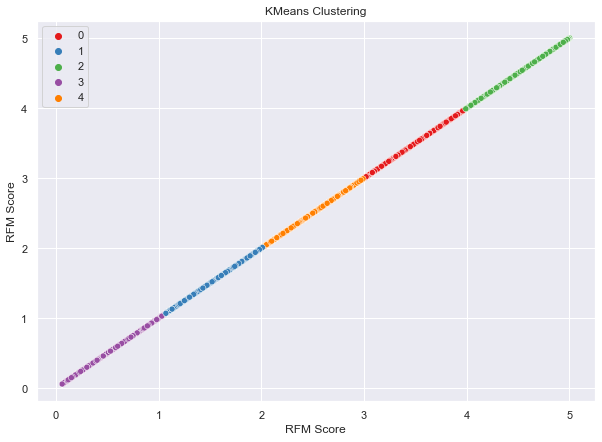

In [103]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_claster)
kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(X_claster[:,0], X_claster[:,0], hue=kmeans.labels_, palette='Set1')
plt.title('KMeans Clustering')
plt.xlabel('RFM Score')
plt.ylabel('RFM Score')
plt.show()

In [104]:
table = df_1.pivot_table(
    values="session_id", 
    index='customer_id', 
    columns='event_name', 
    aggfunc='count')

In [105]:
act_cust = table.reset_index()

In [106]:
act_cust

event_name  customer_id  ADD_PROMO  ADD_TO_CART  BOOKING  CLICK  HOMEPAGE  \
0                   3.0       27.0        156.0     51.0  118.0     109.0   
1                   8.0        1.0         14.0      7.0   25.0      93.0   
2                   9.0        NaN         16.0      6.0   11.0       8.0   
3                  11.0        1.0          4.0      1.0    1.0       3.0   
4                  15.0        4.0         21.0      5.0    9.0       9.0   
...                 ...        ...          ...      ...    ...       ...   
50699           99992.0        2.0         29.0     12.0   16.0      16.0   
50700           99995.0       13.0         79.0     60.0  233.0     187.0   
50701           99997.0        NaN          4.0      1.0    2.0       1.0   
50702           99998.0        6.0         40.0      8.0   31.0     169.0   
50703           99999.0        NaN         12.0      1.0    8.0       1.0   

event_name  ITEM_DETAIL  PROMO_PAGE  SCROLL  SEARCH  
0                  56.0        42.0    72.0    51.0  
1                  32.0         5.0    16.0     9.0  
2                   5.0         3.0     6.0     4.0  
3                   2.0         2.0     NaN     NaN  
4                   3.0         1.0     2.0     3.0  
...                 ...         ...     ...     ...  
50699               2.0         1.0     9.0     5.0  
50700             151.0        34.0   121.0   124.0  
50701               NaN         1.0     1.0     NaN  
50702              35.0        16.0    33.0    16.0  
50703               1.0         NaN     4.0     6.0  

[50704 rows x 10 columns]

In [107]:
pembelian_awal = df_1.groupby(['customer_id'])['created_at'].min()
pembelian_awal = pd.DataFrame(data = pembelian_awal).reset_index()
pembelian_awal = pembelian_awal.rename(columns = {'created_at' : 'initial_purchase_date'})
pembelian_awal.head()

customer_id            initial_purchase_date
0          3.0 2018-08-25 18:54:03.844494+00:00
1          8.0 2021-02-13 09:47:39.656991+00:00
2          9.0 2021-06-27 01:51:48.421034+00:00
3         11.0 2022-03-07 14:29:13.759159+00:00
4         15.0 2019-09-30 04:47:36.105040+00:00

In [108]:
pembelian_akhir = df_1.groupby(['customer_id'])['created_at'].max()
pembelian_akhir = pd.DataFrame(data = pembelian_akhir).reset_index()
pembelian_akhir = pembelian_akhir.rename(columns = {'created_at' : 'last_purchase_date'})
pembelian_akhir.head()

customer_id               last_purchase_date
0          3.0 2022-06-26 15:41:52.844494+00:00
1          8.0 2022-05-15 22:46:22.656991+00:00
2          9.0 2022-05-28 08:44:32.421034+00:00
3         11.0 2022-03-07 14:29:13.759159+00:00
4         15.0 2022-01-05 06:07:58.105040+00:00

In [109]:
new_df = pd.merge(pembelian_awal, pembelian_akhir, on='customer_id')
df_rfm = pd.merge(new_df, df_rfm, on='customer_id')

In [110]:
df_rfm["tenure"] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days/30

In [111]:
df_rfm["monthly_spend"] = np.round(df_rfm.monetary / df_rfm.tenure, 2)

In [112]:
df_rfm["monthly_spend"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_rfm["monthly_spend"].fillna(df_rfm.monetary, inplace=True)

In [113]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary   R_rank_norm  \
count  50704.000000  50704.000000  50704.000000  5.070400e+04  50704.000000   
mean   49810.841255    299.083563    245.799227  1.526876e+08     50.270283   
std    28957.892213    436.191433    474.176016  3.052852e+08     29.023163   
min        3.000000      0.000000      4.000000  2.097760e+05      0.000000   
25%    24693.750000     39.000000     21.000000  8.260742e+06     25.150000   
50%    49711.000000    110.000000     71.000000  3.795960e+07     50.190000   
75%    74863.500000    359.000000    246.000000  1.515662e+08     75.250000   
max    99999.000000   2221.000000   9760.000000  6.648569e+09    100.000000   

        F_rank_norm   M_rank_norm     RFM_Score        tenure  monthly_spend  
count  50704.000000  50704.000000  50704.000000  50704.000000   5.070400e+04  
mean      50.001032     50.001032      2.502072     22.686620   1.066067e+07  
std       28.866391     28.866391      1.401836     20.420384   3.722922e+07  
min        1.320000      1.320000      0.060000      0.000000   3.690178e+04  
25%       24.650000     24.650000      1.280000      3.333333   1.160373e+06  
50%       49.880000     49.880000      2.490000     18.600000   2.978522e+06  
75%       75.030000     75.030000      3.720000     37.700000   8.919439e+06  
max      100.000000    100.000000      5.000000     73.800000   3.180135e+09

In [114]:
df_rfm["monthly_spend"]

0         6408091.69
1         4198158.16
2         3000672.09
3         2765462.00
4          858876.45
            ...     
50699     2020110.69
50700    20838241.65
50701     2264610.00
50702     5446309.47
50703     6471663.00
Name: monthly_spend, Length: 50704, dtype: float64

In [115]:
# membuat feature berapa lama antara pembelian pertama dan pembelian selanjutnya
df_rfm["freq_diff"] = df_rfm['recent_days'] / df_rfm['frequency']

In [116]:
# Membuat data dari 3 bulan terakhir
data_last_months = df_1[(df_1['created_at'] > '2022-01-01 00:00:00') & (df_1['created_at'] <= '2022-04-01 00:00:00')]
# data_last_months.sort_values(by='order_purchase_timestamp', ascending=True)

s = pd.merge(df_rfm, data_last_months, left_on='customer_id',right_on='customer_id',how='left')
df_rfm['purchased_3m'] = s.customer_id.notnull().astype(int)
df_rfm['purchased_3m'].isna().sum()

0

In [117]:
#mengubah 
df_rfm.purchased_3m = df_rfm.purchased_3m.astype('category')

In [118]:
df_rfm.Customer_segment.value_counts()

Lost Customers           16111
Low Value Customers      14559
Medium Value Customer    10267
High value Customer       5250
Top Customers             4517
Name: Customer_segment, dtype: int64

In [119]:
df_rfm.groupby("Customer_segment")["recent_days"].mean()

Customer_segment
High value Customer       29.701333
Lost Customers           704.303519
Low Value Customers      200.119376
Medium Value Customer     64.652771
Top Customers             18.693602
Name: recent_days, dtype: float64

In [120]:
# Jumlah order per customer
order_count = df_1.groupby(['customer_id'])['qty'].count().sort_values(ascending = False).reset_index()
order_count = order_count.rename(columns = {'qty' : 'order_count'})
order_count.head()

customer_id  order_count
0      43202.0         9760
1      82237.0         9337
2      10167.0         8452
3      38588.0         7205
4      39915.0         7067

In [121]:
# Kategori order
kategori_order = []
for i in order_count['order_count']:
    if i <= 5:
        kategori_order.append('0') # Sedikit
    else:
        kategori_order.append('1') # Banyak
kategori_order = pd.DataFrame({'kategori_order' : kategori_order})
order_count = pd.concat([order_count, kategori_order], axis = 1)
order_count.head()

customer_id  order_count kategori_order
0      43202.0         9760              1
1      82237.0         9337              1
2      10167.0         8452              1
3      38588.0         7205              1
4      39915.0         7067              1

In [122]:
order_count['kategori_order'].value_counts()

1    48181
0     2523
Name: kategori_order, dtype: int64

In [123]:
# Merge order_count ke df_rfm
df_rfm = pd.merge(df_rfm, order_count, on='customer_id')

In [124]:
df_rfm.head()

customer_id            initial_purchase_date  \
0          3.0 2018-08-25 18:54:03.844494+00:00   
1          8.0 2021-02-13 09:47:39.656991+00:00   
2          9.0 2021-06-27 01:51:48.421034+00:00   
3         11.0 2022-03-07 14:29:13.759159+00:00   
4         15.0 2019-09-30 04:47:36.105040+00:00   

                last_purchase_date                       created_at  \
0 2022-06-26 15:41:52.844494+00:00 2022-06-26 15:41:52.844494+00:00   
1 2022-05-15 22:46:22.656991+00:00 2022-05-15 22:46:22.656991+00:00   
2 2022-05-28 08:44:32.421034+00:00 2022-05-28 08:44:32.421034+00:00   
3 2022-03-07 14:29:13.759159+00:00 2022-03-07 14:29:13.759159+00:00   
4 2022-01-05 06:07:58.105040+00:00 2022-01-05 06:07:58.105040+00:00   

   recent_days  frequency     monetary  R_rank_norm  F_rank_norm  M_rank_norm  \
0           35        682  299044279.0        77.48        90.08        90.08   
1           77        202   63812004.0        58.47        71.44        71.44   
2           64         59   33507505.0        62.70        46.06        46.06   
3          146         14    2765462.0        43.79        17.41        17.41   
4          207         57   23704990.0        35.96        45.31        45.31   

   RFM_Score       Customer_segment     tenure  monthly_spend  freq_diff  \
0       4.41    High value Customer  46.666667     6408091.69   0.051320   
1       3.47  Medium Value Customer  15.200000     4198158.16   0.381188   
2       2.43    Low Value Customers  11.166667     3000672.09   1.084746   
3       1.07         Lost Customers   0.000000     2765462.00  10.428571   
4       2.20    Low Value Customers  27.600000      858876.45   3.631579   

  purchased_3m  order_count kategori_order  
0            1          682              1  
1            1          202              1  
2            1           59              1  
3            1           14              1  
4            1           57              1

In [125]:
# Selish Tanggal pembelian
df_rfm['selisih_tanggal'] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days
df_rfm['selisih_tanggal'].value_counts()

0       10385
360       142
336       139
252       121
840       116
        ...  
1361        1
1213        1
1697        1
1916        1
2017        1
Name: selisih_tanggal, Length: 2087, dtype: int64

In [126]:
# Rata-rata pembelian per customer 1x 
df_rfm['rata_rata_pembelian'] = df_rfm['selisih_tanggal'] / df_rfm['order_count']
df_rfm['rata_rata_pembelian'].value_counts()

0.000000     10385
6.000000        65
8.000000        61
14.000000       59
7.000000        47
             ...  
0.051613         1
7.514563         1
7.051282         1
1.577362         1
3.677966         1
Name: rata_rata_pembelian, Length: 28849, dtype: int64

# Status Churn Customer

In [127]:
# Kategori rata-rata pembelian
kategori_rata_rata_pembelian = []
for i in df_rfm['rata_rata_pembelian']:
    if (i <= 30) & (i >= 1):
        kategori_rata_rata_pembelian.append('1') # Aktif 
    else:
        kategori_rata_rata_pembelian.append('0') # Tidak Aktif
kategori_rata_rata_pembelian = pd.DataFrame({'kategori_rata_rata_pembelian' : kategori_rata_rata_pembelian})
df_rfm = pd.concat([df_rfm, kategori_rata_rata_pembelian], axis = 1)

In [128]:
# Rename kolom kategori_rata_rata_pembelian
df_rfm = df_rfm.rename(columns = {'kategori_rata_rata_pembelian' : 'churn'})

In [129]:
df_rfm['churn'].value_counts()

1    31470
0    19234
Name: churn, dtype: int64

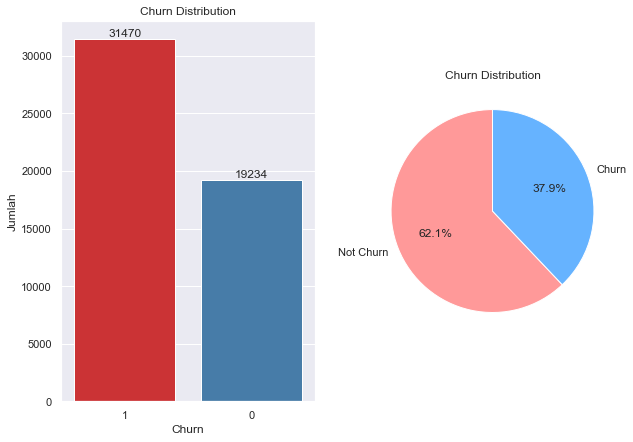

In [130]:
#pd_churn = pd.DataFrame(churn, columns = ['churn'])
#df_rfm['churn'] = pd_churn
#df_rfm['churn'].value_counts()
# Gabungkan dua chart dengan fungsi 
def plot_churn(df_rfm, churn):
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    a = sns.countplot(x=churn, data=df_rfm, ax=ax[0], palette='Set1', order=df_rfm[churn].value_counts().index)
    for j in a.containers:
        a.bar_label(j, label_type='edge')
    ax[0].set_title('Churn Distribution')
    ax[0].set_xlabel('Churn')
    ax[0].set_ylabel('Jumlah')
    plt.pie(df_rfm[churn].value_counts(), labels=['Not Churn','Churn'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    ax[1].set_title('Churn Distribution')
    plt.show()
plot_churn(df_rfm, 'churn')

Semakin kecil rata-rata hari per 1 order maka semakin aktif pelanggan tersebut (aktif) dan sebaliknya (non aktif). Bisa kita lihat bahwa pie chart tersebut bahwa data tersebut kurang seimbang, Aktif (1) lebih banyak dibandingkan dengan Non Aktif (0). 
Yaitu sebanyak 62.1% customer masih aktif dan 37.9% customer sudah tidak aktif. Untuk memperbaiki data tersebut, akan dilakukan oversampling pada data yang tidak seimbang tersebut, dibahas pada bagian **Oversampling**.

## Merge data

In [131]:
fixed_df = df_1.drop_duplicates(subset=['customer_id'])

In [132]:
df_rfm = pd.merge(df_rfm, ongkir, on='customer_id', how='left')
df_rfm = pd.merge(df_rfm, total_promo, on='customer_id', how='left')

In [133]:
df = pd.merge(fixed_df, df_rfm, on='customer_id', how='inner')
#df = pd.merge(df, df_1, on='customer_id', how='inner')
df = pd.merge(df, act_cust, on='customer_id', how='inner')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   session_id              50704 non-null  object             
 1   event_name              50704 non-null  object             
 2   event_time              50704 non-null  datetime64[ns, UTC]
 3   event_id                50704 non-null  object             
 4   traffic_source          50704 non-null  int64              
 5   event_metadata          0 non-null      object             
 6   created_at_x            50704 non-null  datetime64[ns, UTC]
 7   customer_id             50704 non-null  float64            
 8   booking_id              50704 non-null  object             
 9   product_metadata        50704 non-null  object             
 10  payment_method          50704 non-null  object             
 11  payment_status          50704 non-null  o

In [135]:
df.duplicated().sum()

0

In [136]:
df.isnull().sum()

session_id            0
event_name            0
event_time            0
event_id              0
traffic_source        0
                  ...  
HOMEPAGE              0
ITEM_DETAIL        6877
PROMO_PAGE        11640
SCROLL             6252
SEARCH             8539
Length: 78, dtype: int64

In [137]:
#mengubah nilai null pada aktivitas customer dengan 0
# df = df[["ADD_PROMO","CLICK", "ITEM_DETAIL", "PROMO_PAGE", "SCROLL", "SEARCH"]].fillna(0, inplace=True)
df = df.replace(np.nan, 0)

In [138]:
df.isna().sum()

session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
                 ..
HOMEPAGE          0
ITEM_DETAIL       0
PROMO_PAGE        0
SCROLL            0
SEARCH            0
Length: 78, dtype: int64

In [139]:
df.corr()

traffic_source  event_metadata  customer_id  \
traffic_source                1.000000             NaN     0.007186   
event_metadata                     NaN             NaN          NaN   
customer_id                   0.007186             NaN     1.000000   
promo_amount                  0.002812             NaN     0.001964   
shipment_fee                 -0.006575             NaN     0.005066   
shipment_location_lat         0.000312             NaN    -0.001006   
shipment_location_long       -0.005751             NaN    -0.003831   
total_amount                 -0.005343             NaN    -0.003857   
id                            0.006373             NaN    -0.006300   
qty                           0.002004             NaN    -0.006745   
price                        -0.000035             NaN     0.010665   
year                          0.006051             NaN    -0.003739   
device_type                   0.002870             NaN     0.005577   
home_location_lat            -0.002245             NaN     0.002652   
home_location_long           -0.003061             NaN     0.004114   
purchase_year                 0.003104             NaN     0.005362   
age                          -0.001042             NaN    -0.004673   
recent_days                  -0.001812             NaN    -0.004127   
frequency                    -0.008257             NaN     0.000893   
monetary                     -0.007411             NaN    -0.000440   
R_rank_norm                   0.000593             NaN     0.003488   
F_rank_norm                  -0.003534             NaN     0.001029   
M_rank_norm                  -0.003534             NaN     0.001029   
RFM_Score                    -0.002997             NaN     0.001452   
tenure                       -0.002297             NaN    -0.001635   
monthly_spend                -0.003510             NaN     0.008601   
freq_diff                     0.000891             NaN    -0.002241   
order_count                  -0.008257             NaN     0.000893   
selisih_tanggal              -0.002297             NaN    -0.001635   
rata_rata_pembelian           0.001558             NaN    -0.000789   
ongkir                       -0.007172             NaN    -0.000284   
total_promo                  -0.005764             NaN    -0.000125   
ADD_PROMO                    -0.003870             NaN    -0.000119   
ADD_TO_CART                  -0.001855             NaN     0.000033   
BOOKING                      -0.005872             NaN     0.000554   
CLICK                        -0.009429             NaN     0.000929   
HOMEPAGE                     -0.008900             NaN     0.001622   
ITEM_DETAIL                  -0.009425             NaN     0.000737   
PROMO_PAGE                   -0.008833             NaN     0.001102   
SCROLL                       -0.008890             NaN     0.000587   
SEARCH                       -0.010089             NaN     0.001195   

                        promo_amount  shipment_fee  shipment_location_lat  \
traffic_source              0.002812     -0.006575               0.000312   
event_metadata                   NaN           NaN                    NaN   
customer_id                 0.001964      0.005066              -0.001006   
promo_amount                1.000000     -0.004663              -0.008645   
shipment_fee               -0.004663      1.000000               0.000260   
shipment_location_lat      -0.008645      0.000260               1.000000   
shipment_location_long     -0.001322      0.008907               0.122935   
total_amount               -0.009790      0.008745              -0.003507   
id                          0.011228     -0.002606              -0.002406   
qty                        -0.006685      0.002125              -0.004619   
price                       0.000722     -0.002054               0.001264   
year                        0.000275     -0.000559               0.003342   
device_type                 0.005199    

## Outlier Detection

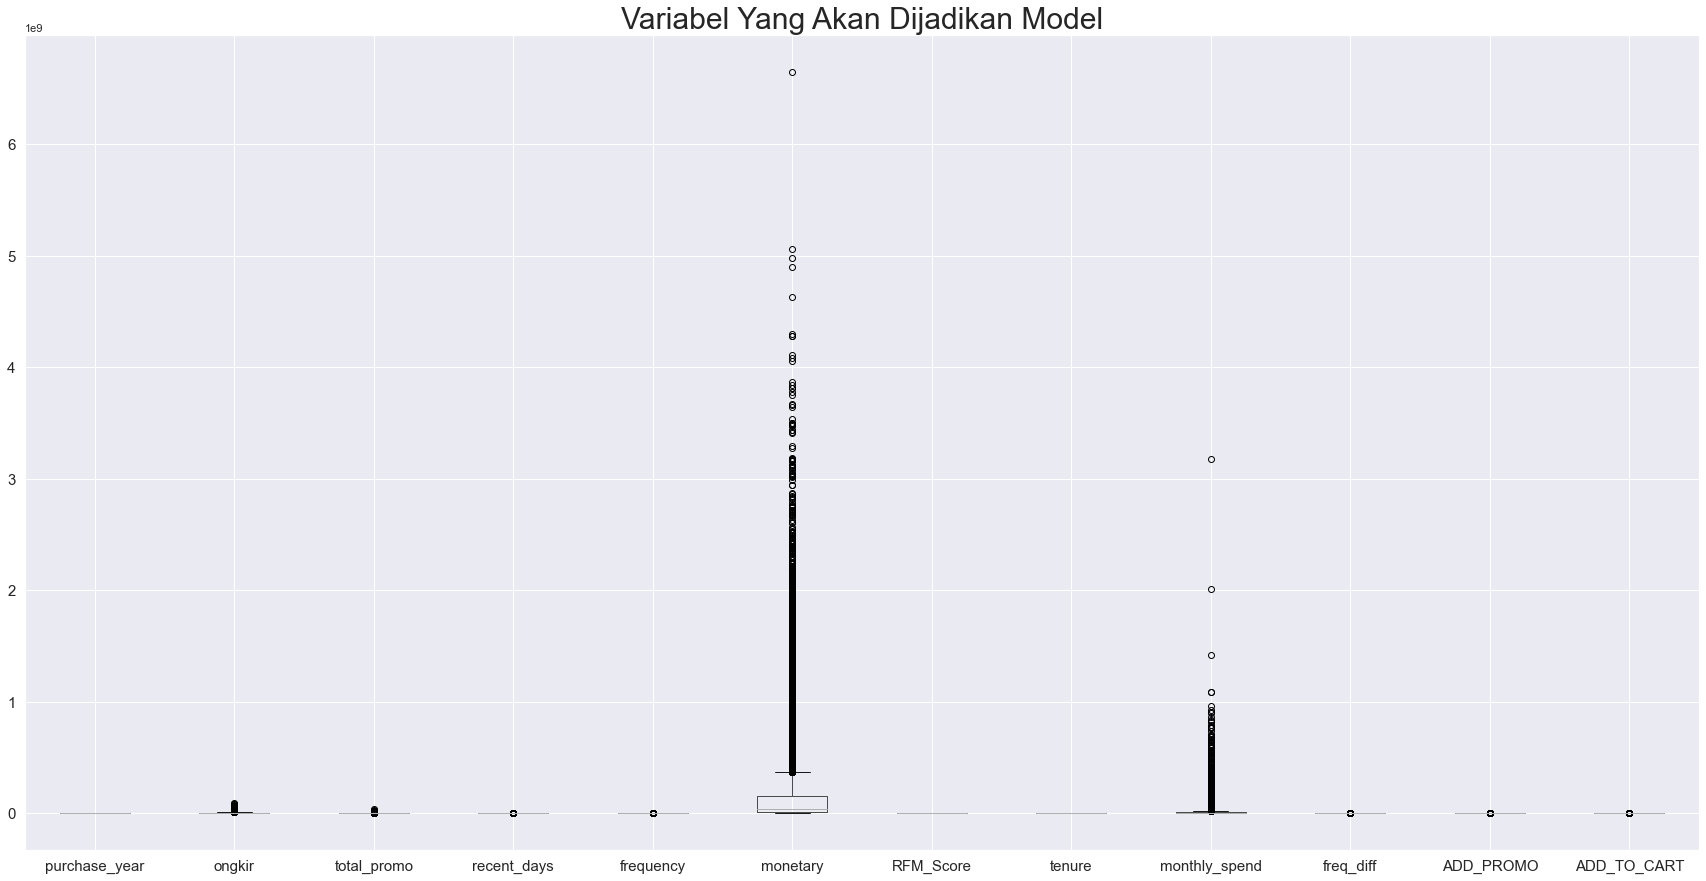

In [140]:
cols = ['purchase_year', 'ongkir','total_promo', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'tenure', 'monthly_spend', 'freq_diff', 'ADD_PROMO', 'ADD_TO_CART']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [141]:
# Cek Outlier dengan IQR
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas
    for i in data:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    print('Outlier (',col,') : ',len(data_outlier[col]),' outlier',data_outlier[col])

Outlier ( purchase_year ) :  2  outlier (2013.5, 2025.5)
Outlier ( ongkir ) :  2  outlier (-2977500.0, 5402500.0)
Outlier ( total_promo ) :  2  outlier (-758722.875, 1320854.125)
Outlier ( recent_days ) :  2  outlier (-441.0, 839.0)
Outlier ( frequency ) :  2  outlier (-316.5, 583.5)
Outlier ( monetary ) :  2  outlier (-206697464.5, 366524419.5)
Outlier ( RFM_Score ) :  2  outlier (-2.380000000000001, 7.380000000000001)
Outlier ( tenure ) :  2  outlier (-48.21666666666666, 89.25)
Outlier ( monthly_spend ) :  2  outlier (-10478224.811250001, 20558036.578750003)
Outlier ( freq_diff ) :  2  outlier (-23.22815092383107, 39.111008201357464)
Outlier ( ADD_PROMO ) :  2  outlier (-6.5, 13.5)
Outlier ( ADD_TO_CART ) :  2  outlier (-52.0, 100.0)


In [142]:
# Handling (Monetary)
q1 = df['monetary'].quantile(0.25)
q3 = df['monetary'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monetary'] = np.where(df['monetary'] > batas_atas, batas_atas, df['monetary'])
df['monetary'] = np.where(df['monetary'] < batas_bawah, batas_bawah, df['monetary'])

batas_bawah :  -206697464.5
batas_atas :  366524419.5


In [143]:
# Handling (Monthly Spend)
q1 = df['monthly_spend'].quantile(0.25)
q3 = df['monthly_spend'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monthly_spend'] = np.where(df['monthly_spend'] > batas_atas, batas_atas, df['monthly_spend'])
df['monthly_spend'] = np.where(df['monthly_spend'] < batas_bawah, batas_bawah, df['monthly_spend'])

batas_bawah :  -10478224.811250001
batas_atas :  20558036.578750003


In [144]:
# Handling Ongkir
q1 = df['ongkir'].quantile(0.25)
q3 = df['ongkir'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['ongkir'] = np.where(df['ongkir'] > batas_atas, batas_atas, df['ongkir'])
df['ongkir'] = np.where(df['ongkir'] < batas_bawah, batas_bawah, df['ongkir'])

batas_bawah :  -2977500.0
batas_atas :  5402500.0


In [145]:
# Handling Total Promo
q1 = df['total_promo'].quantile(0.25)
q3 = df['total_promo'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['total_promo'] = np.where(df['total_promo'] > batas_atas, batas_atas, df['total_promo'])
df['total_promo'] = np.where(df['total_promo'] < batas_bawah, batas_bawah, df['total_promo'])

batas_bawah :  -758722.875
batas_atas :  1320854.125


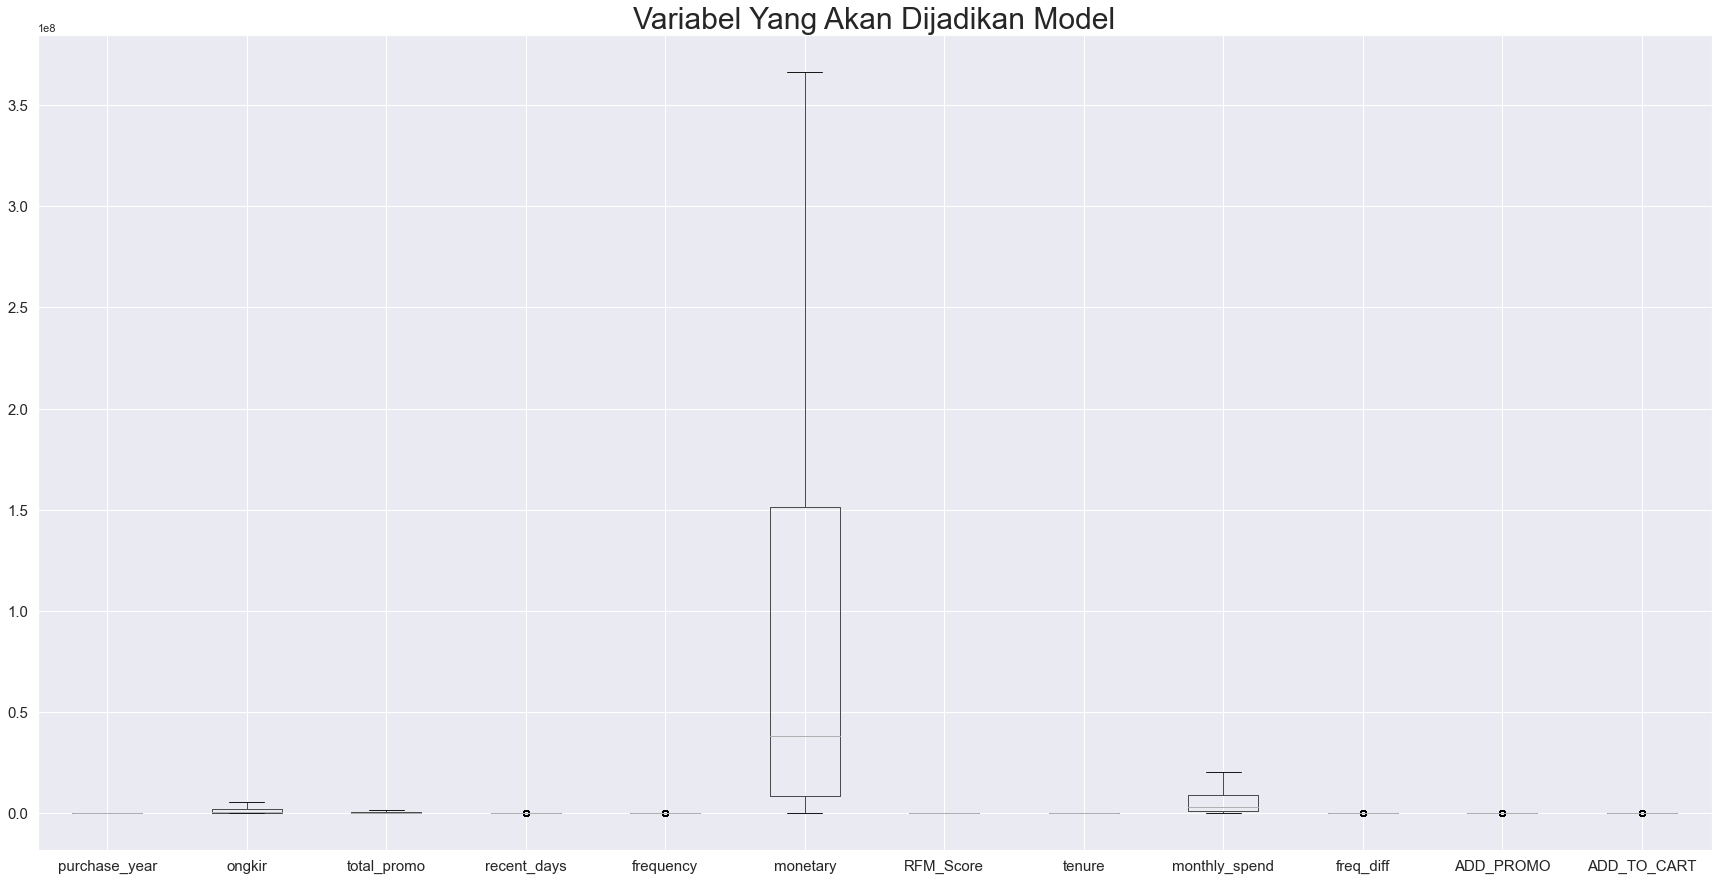

In [146]:
# Setelah dihandle
cols = ['purchase_year', 'ongkir','total_promo', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'tenure', 'monthly_spend', 'freq_diff', 'ADD_PROMO', 'ADD_TO_CART']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [147]:
# Round 
df['monetary'].round(2)
df['monthly_spend'].round(2)
df['frequency'].round(2)

0        2395
1        9337
2         386
3        9760
4        8452
         ... 
50699       4
50700       4
50701       4
50702       4
50703       4
Name: frequency, Length: 50704, dtype: int64

In [148]:
df['monetary']

0        366524419.5
1        366524419.5
2        366524419.5
3        366524419.5
4        366524419.5
            ...     
50699      1171084.0
50700       865460.0
50701       834576.0
50702      1179796.0
50703       395672.0
Name: monetary, Length: 50704, dtype: float64

# EDA

### Berapa jumlah customer yang daftar

In [149]:
sign_in_cust = df_customer['customer_id'].isin(df_trans['customer_id'])
sign_in_cust.value_counts()

True     50705
False    49295
Name: customer_id, dtype: int64

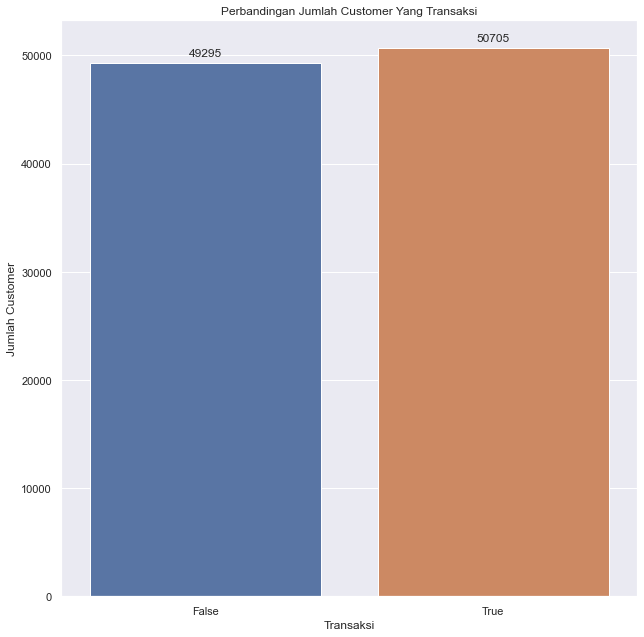

In [150]:
fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
a = sns.countplot(x= sign_in_cust.index, data=sign_in_cust)
for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Transaksi")
plt.ylabel("Jumlah Customer")
plt.title("Perbandingan Jumlah Customer Yang Transaksi")
plt.show()

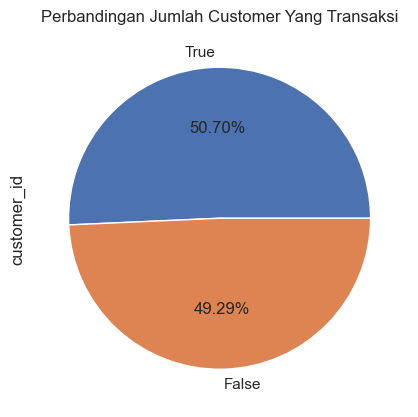

In [151]:
plt.figure(figsize=(5,5), dpi= 100)
sign_in_cust.value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Perbandingan Jumlah Customer Yang Transaksi")
plt.show()

### Apa saja device yang digunakan customer

In [152]:
dev_type = df_customer.groupby("device_type")[["customer_id"]].count()
dev_type

customer_id
device_type             
Android            76637
iOS                23363

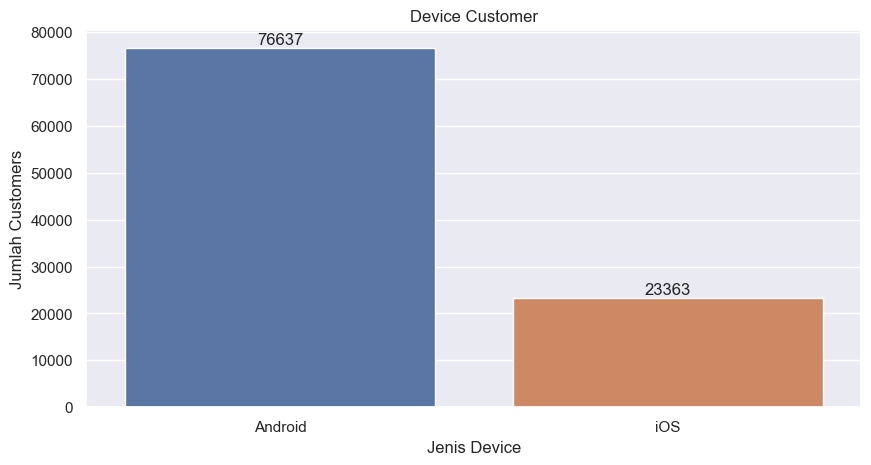

In [153]:
plt.figure(figsize=(10,5), dpi= 100)
a = sns.barplot(x=dev_type.index, y=dev_type.customer_id)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Jenis Device")
plt.ylabel("Jumlah Customers")
plt.title("Device Customer")
plt.show()

### Bagaimana distribusi customer berdasarkan gender

In [154]:
gender_dist = df_customer.groupby("gender")[["customer_id"]].count()
gender_dist

customer_id
gender             
F             64230
M             35770

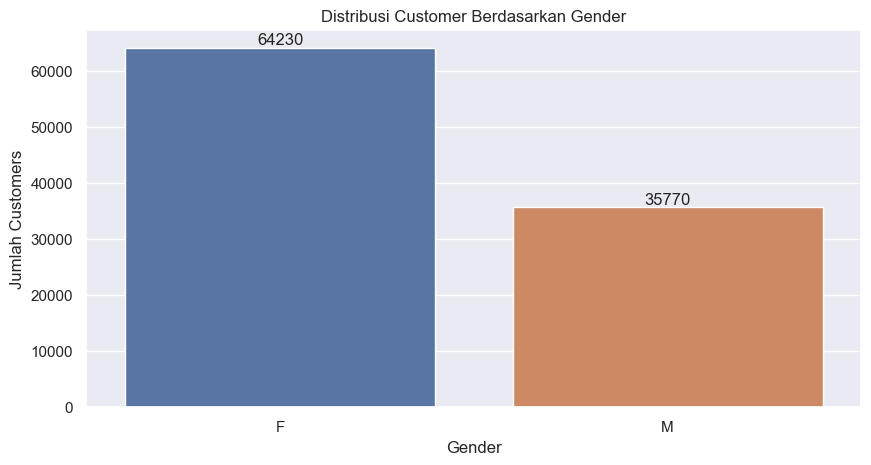

In [155]:
plt.figure(figsize=(10,5), dpi= 100)
a = sns.barplot(x=gender_dist.index, y=gender_dist.customer_id)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Gender")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Customer Berdasarkan Gender")
plt.show()

### Bagaimana distribusi customer berdasarkan tahun lahir

In [156]:
birth_dist = df_customer.groupby(df_customer["birthdate"].dt.year)[["customer_id"]].count()
birth_dist.sort_values("customer_id", ascending=False)

customer_id
birthdate             
1998              5653
1997              5547
1996              5455
1999              5436
1994              5355
...                ...
1960                 3
1957                 2
1959                 1
1958                 1
1954                 1

[62 rows x 1 columns]

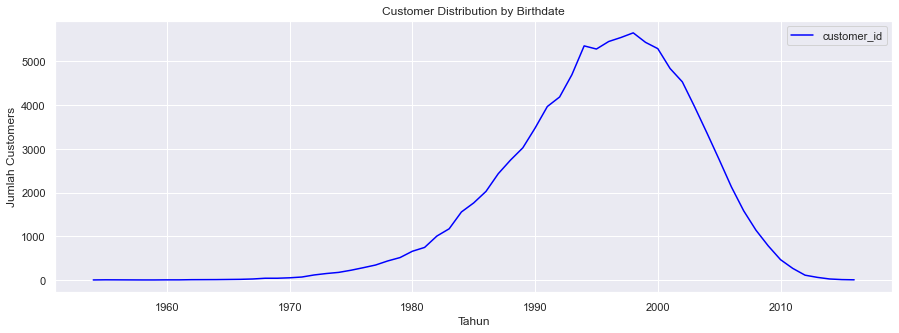

In [157]:
birth_dist.plot(kind="line", color = "blue", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Customers")
plt.title("Customer Distribution by Birthdate")
plt.show()

### Bagaimana distribusi customer berdasarkan provinsi

In [158]:
prov_dist = df_customer.groupby(df_customer["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)
prov_dist

customer_id
home_location                   
Jakarta Raya               18715
Jawa Barat                 11486
Jawa Tengah                10960
Jawa Timur                  9953
Yogyakarta                  7849
Kalimantan Barat            5603
Lampung                     5426
Kalimantan Selatan          4229
Kalimantan Tengah           4091
Kalimantan Timur            2729
Maluku                      2490
Kepulauan Riau              1902
Bali                        1451
Sumatera Barat              1346
Nusa Tenggara Barat         1324
Sulawesi Utara              1279
Sulawesi Barat              1068
Sumatera Utara              1004
Sumatera Selatan             841
Papua                        753
Sulawesi Selatan             726
Papua Barat                  660
Bengkulu                     654
Nusa Tenggara Timur          587
Sulawesi Tengah              505
Jambi                        385
Banten                       377
Maluku Utara                 368
Gorontalo                    348
Aceh                         263
Bangka Belitung              250
Sulawesi Tenggara            246
Riau                         132

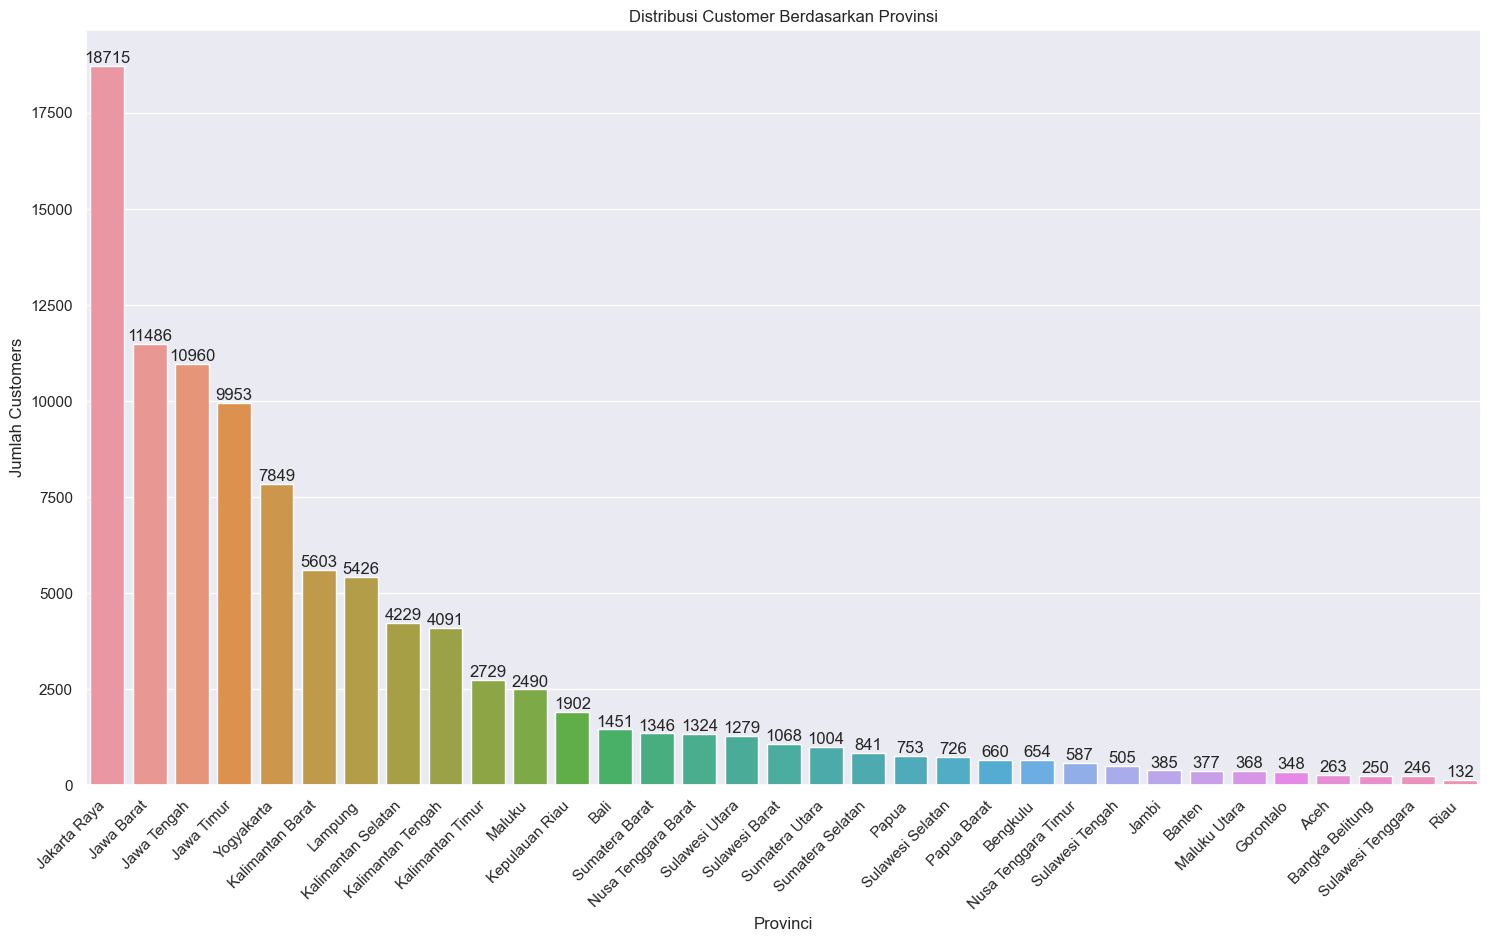

In [159]:
plt.figure(figsize=(18,10), dpi=100)
a = sns.barplot(x=prov_dist.index, y=prov_dist.customer_id)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Provinci")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Customer Berdasarkan Provinsi")
plt.show()

### Bagaimana distribusi customer sign in?

In [160]:
signin_dist = df_customer.groupby(df_customer["first_join_date"].dt.year)[["customer_id"]].count()
signin_dist.sort_values("customer_id", ascending=False)

customer_id
first_join_date             
2021                   22760
2020                   17821
2019                   15303
2022                   14360
2018                   13587
2017                   11440
2016                    4729

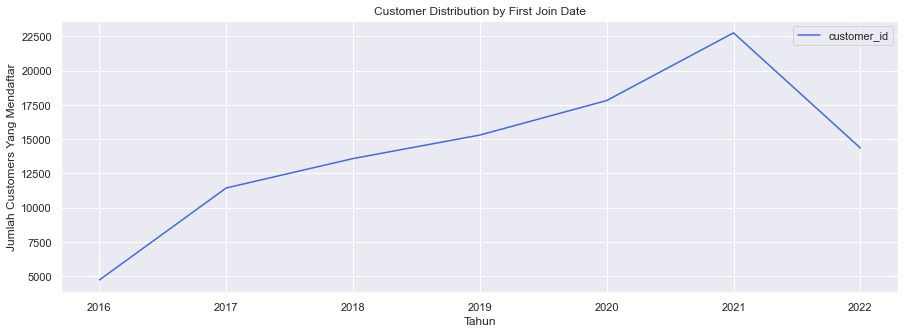

In [161]:
signin_dist.plot(kind="line", color = "royalblue", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Customers Yang Mendaftar")
plt.title("Customer Distribution by First Join Date")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan bulan

In [162]:
daftar_bymonth = df_customer.groupby(df_customer["first_join_date"].dt.month)["customer_id"].count()
daftar_bymonth

first_join_date
1      8100
2      7429
3      7773
4      7457
5      7915
6      7504
7     14716
8      8293
9      7629
10     8009
11     7533
12     7642
Name: customer_id, dtype: int64

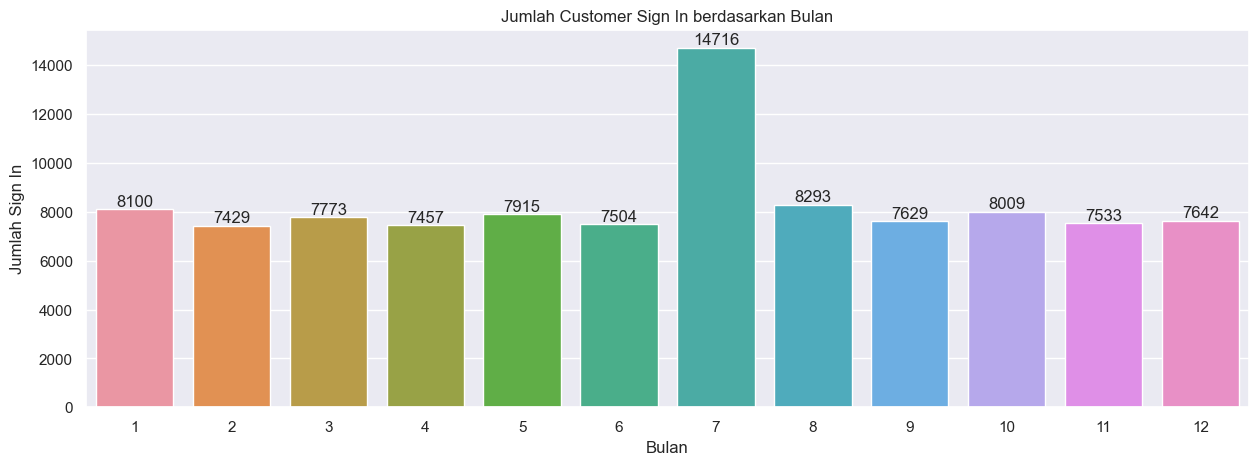

In [163]:
plt.figure(figsize=(15,5), dpi=100)
a = sns.barplot(x=daftar_bymonth.index, y=daftar_bymonth.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=0,ha='center')
plt.xlabel('Bulan')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Bulan")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan tanggal

In [164]:
daftar_byday = df_customer.groupby(df_customer["first_join_date"].dt.day)["customer_id"].count()
daftar_byday

first_join_date
1     3523
2     3818
3     3723
4     3646
5     3814
6     3402
7     3070
8     3029
9     3221
10    3204
11    3196
12    3169
13    2999
14    3051
15    3114
16    3077
17    3210
18    3142
19    3169
20    3012
21    3059
22    2955
23    3171
24    3261
25    3231
26    3149
27    3092
28    3140
29    3113
30    3622
31    2618
Name: customer_id, dtype: int64

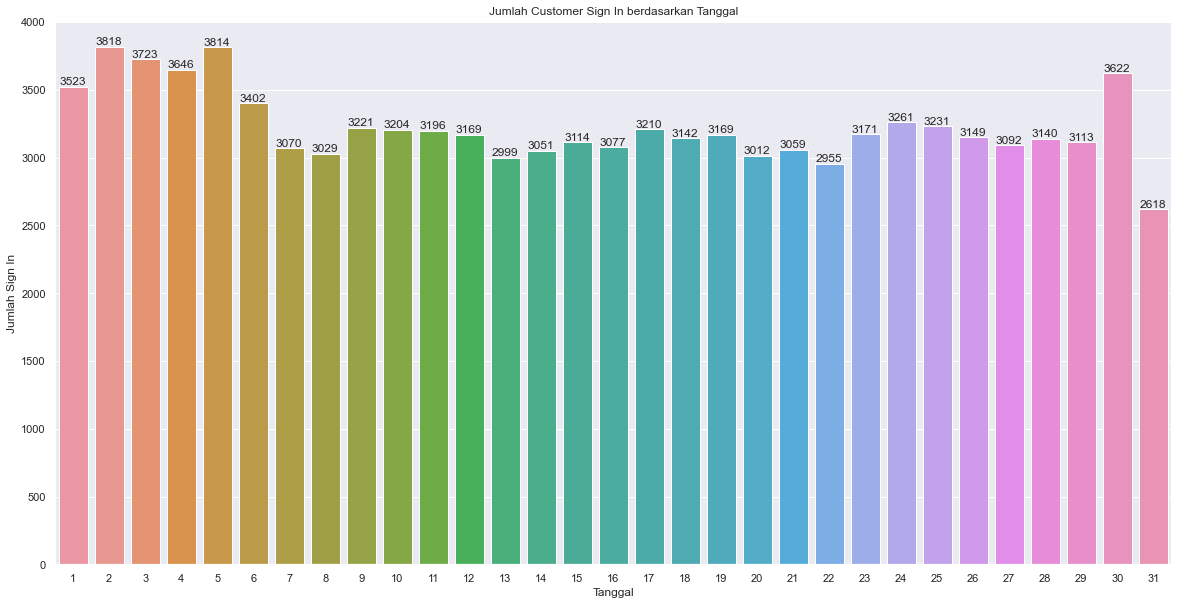

In [165]:
plt.figure(figsize=(20,10))
a = sns.barplot(x=daftar_byday.index, y=daftar_byday.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=0,ha='center')
plt.xlabel('Tanggal')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Tanggal")
plt.show()

### Apa produk gender yang terfavorit?

In [166]:
fav_gen = df_product.groupby("gender_product")["id"].count()
fav_gen

gender_product
Boys        830
Girls       655
Men       22147
Unisex     2161
Women     18631
Name: id, dtype: int64

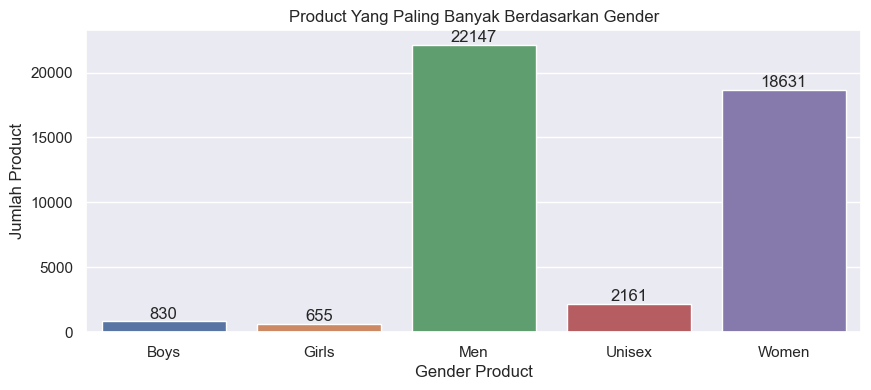

In [167]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=fav_gen.index, y=fav_gen.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=0,ha='center')
plt.xlabel('Gender Product')
plt.ylabel("Jumlah Product")
plt.title("Product Yang Paling Banyak Berdasarkan Gender")
plt.show()

### Apa Master Category Product Terfavorit?

In [168]:
master_cat = df_product.groupby("masterCategory")["id"].count()
master_cat

masterCategory
Accessories       11274
Apparel           21397
Footwear           9219
Free Items          105
Home                  1
Personal Care      2403
Sporting Goods       25
Name: id, dtype: int64

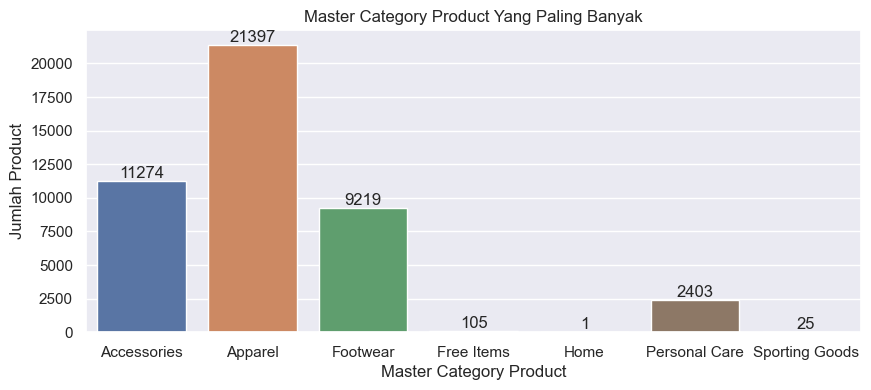

In [169]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=master_cat.index, y=master_cat.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=0,ha='center')
plt.xlabel('Master Category Product')
plt.ylabel("Jumlah Product")
plt.title("Master Category Product Yang Paling Banyak")
plt.show()

### Apa Sub Category Product Terfavorit?

In [170]:
sub_cat = df_product.groupby("subCategory")["id"].count()
sub_cat = sub_cat.sort_values(ascending=False).head(10)
sub_cat

subCategory
Topwear       15402
Shoes          7343
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal          963
Name: id, dtype: int64

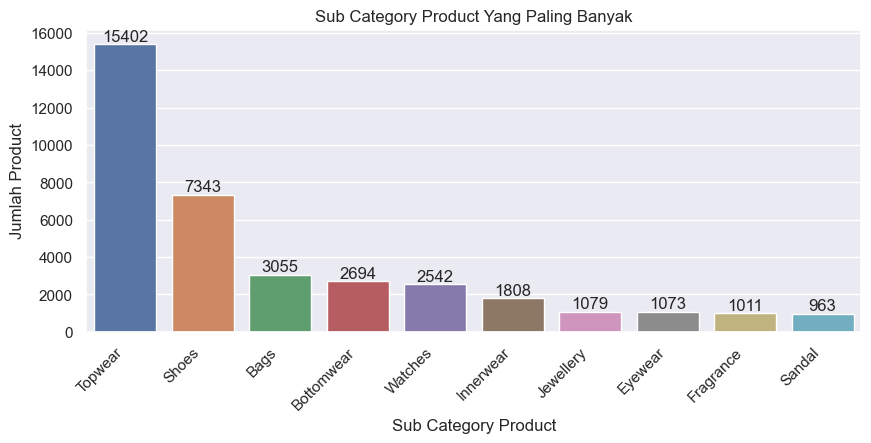

In [171]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=sub_cat.index, y=sub_cat.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sub Category Product')
plt.ylabel("Jumlah Product")
plt.title("Sub Category Product Yang Paling Banyak")
plt.show()

### Apa Article Type Product Terfavorit?

In [172]:
article_type = df_product.groupby("articleType")["id"].count()
article_type = article_type.sort_values(ascending=False).head(10)
article_type

articleType
Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: id, dtype: int64

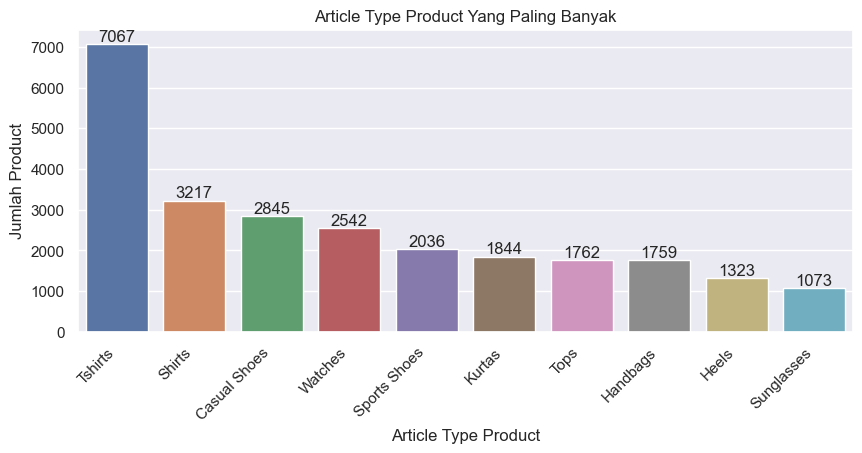

In [173]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=article_type.index, y=article_type.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Article Type Product')
plt.ylabel("Jumlah Product")
plt.title("Article Type Product Yang Paling Banyak")
plt.show()

### Tahun Kapan Product Dibuat?

In [174]:
year_product = df_product.groupby("year")["id"].count()
year_product

year
2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13672
2012.0    16288
2013.0     1212
2014.0      236
2015.0     2780
2016.0     6006
2017.0     2916
2018.0      405
2019.0       33
Name: id, dtype: int64

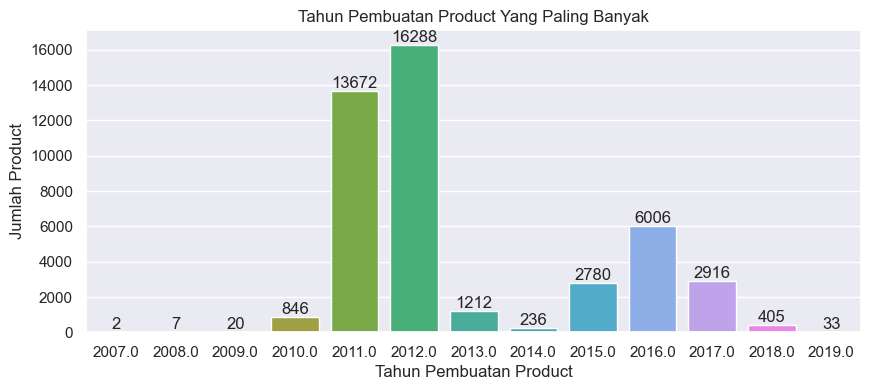

In [175]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=year_product.index, y=year_product.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel('Tahun Pembuatan Product')
plt.ylabel("Jumlah Product")
plt.title("Tahun Pembuatan Product Yang Paling Banyak")
plt.show()

### Bagaimana Distribusi Jumlah Product Berdasarkan Season?

In [176]:
season_product = df_product.groupby("season")["id"].count()
season_product

season
Fall      11431
Spring     2983
Summer    21472
Winter     8517
Name: id, dtype: int64

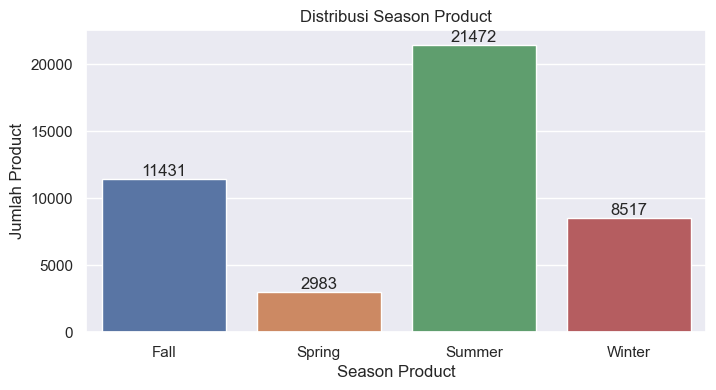

In [177]:
plt.figure(figsize=(8,4), dpi=100)
a = sns.barplot(x=season_product.index, y=season_product.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel('Season Product')
plt.ylabel("Jumlah Product")
plt.title("Distribusi Season Product")
plt.show()

### Bagaimana Distribusi Jumlah Product Berdasarkan Kegunaannya?

In [178]:
usage_product = df_product.groupby("usage")["id"].count()
usage_product

usage
Casual          34406
Ethnic           3208
Formal           2345
Home                1
Party              29
Smart Casual       67
Sports           4025
Travel             26
Name: id, dtype: int64

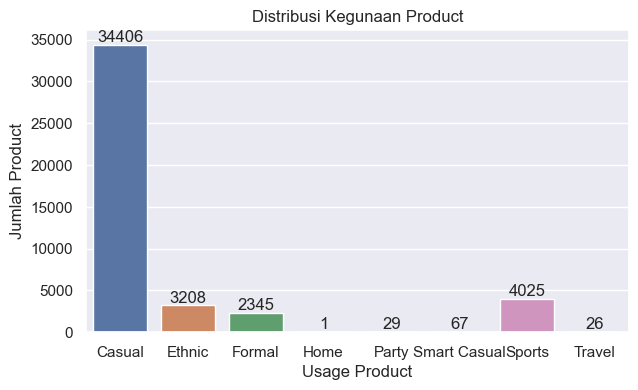

In [179]:
plt.figure(figsize=(7,4), dpi=100)
a = sns.barplot(x=usage_product.index, y=usage_product.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel('Usage Product')
plt.ylabel("Jumlah Product")
plt.title("Distribusi Kegunaan Product")
plt.show()

### Apa Product Terfavorit?

In [180]:
fav_product = df_product.groupby("productDisplayName")["id"].count()
fav_product = fav_product.sort_values(ascending=False).head(10)
fav_product

productDisplayName
Lucera Women Silver Earrings              82
Lucera Women Silver Pendant               56
Lucera Women Silver Ring                  50
Catwalk Women Black Heels                 48
Q&Q Men Black Dial Watch                  42
Fastrack Men Black Dial Watch             41
Maxima Men White Dial Watch               38
Fabindia Women Anusuya Silver Earrings    37
FNF Multi Coloured Printed Sari           32
Miami Blues Women Sunglasses              31
Name: id, dtype: int64

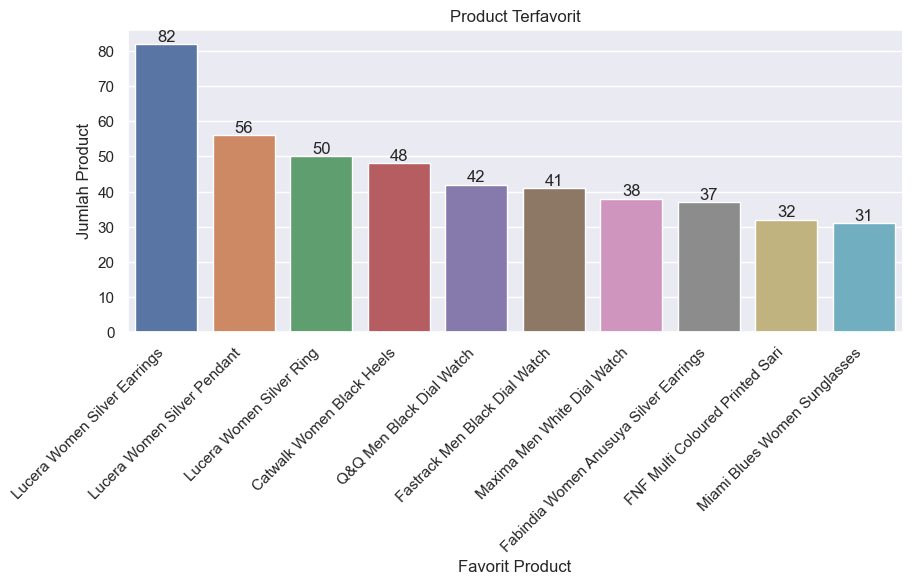

In [181]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=fav_product.index, y=fav_product.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Favorit Product')
plt.ylabel("Jumlah Product")
plt.title("Product Terfavorit")
plt.show()

### Bagaimana distribusi status pembayaran?

In [182]:
df_trans.payment_status.value_counts()

Success    815964
Failed      36620
Name: payment_status, dtype: int64

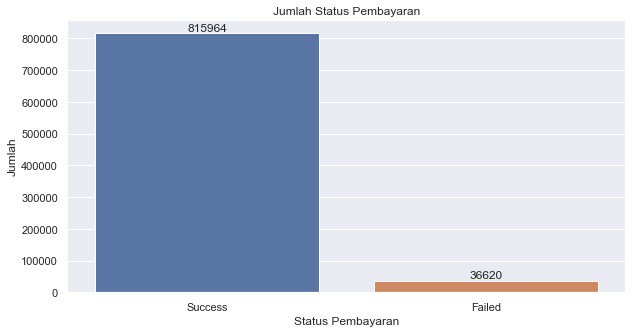

In [183]:
plt.figure(figsize=(10,5))
a = sns.countplot('payment_status', data=df_trans)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Status Pembayaran')
plt.ylabel('Jumlah')
plt.xlabel('Status Pembayaran')
plt.show()

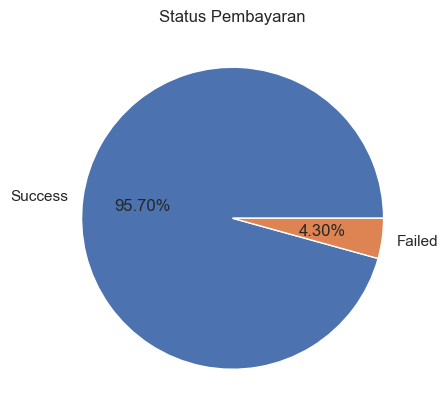

In [184]:
plt.figure(figsize=(5,5), dpi= 100)
df_trans.payment_status.value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Status Pembayaran')
plt.ylabel('')
plt.show()

### Apa jenis pembayaran yang paling banyak dilakukan oleh customer?

In [185]:
best_method = df_trans.groupby(['payment_method'])['customer_id'].count().sort_values(ascending=False)
best_method

payment_method
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: customer_id, dtype: int64

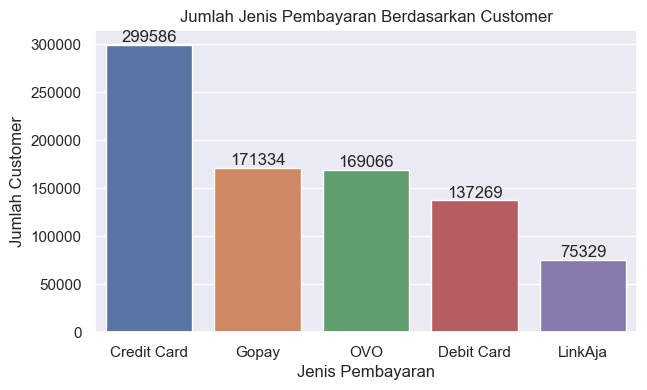

In [186]:
plt.figure(figsize=(7,4), dpi=100)
a = sns.barplot(x=best_method.index, y=best_method.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Jenis Pembayaran Berdasarkan Customer')
plt.ylabel('Jumlah Customer')
plt.xlabel('Jenis Pembayaran')
plt.show()

### Apa metode pembayaran yang paling banyak menghasilkan revenue?

In [187]:
total_rev_method = df_trans.groupby(['payment_method'])['total_amount'].sum().sort_values(ascending=False)
total_rev_method

payment_method
Credit Card    164571866929
Gopay           93837512187
OVO             92913944350
Debit Card      75760589561
LinkAja         41766109142
Name: total_amount, dtype: int64

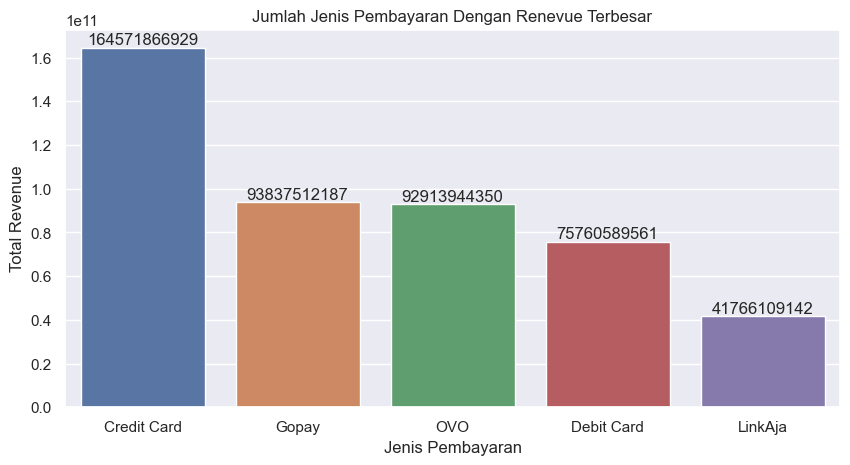

In [188]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.barplot(x=total_rev_method.index, y=total_rev_method.values)
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.title('Jumlah Jenis Pembayaran Dengan Renevue Terbesar')
plt.ylabel('Total Revenue')
plt.xlabel('Jenis Pembayaran')
plt.show()

### Bagaimana type pembayaran yang paling banyak dilakukan oleh customer setiap tahunnya?

In [189]:
df['type_buy_tahun'] = df['created_at_x'].dt.year

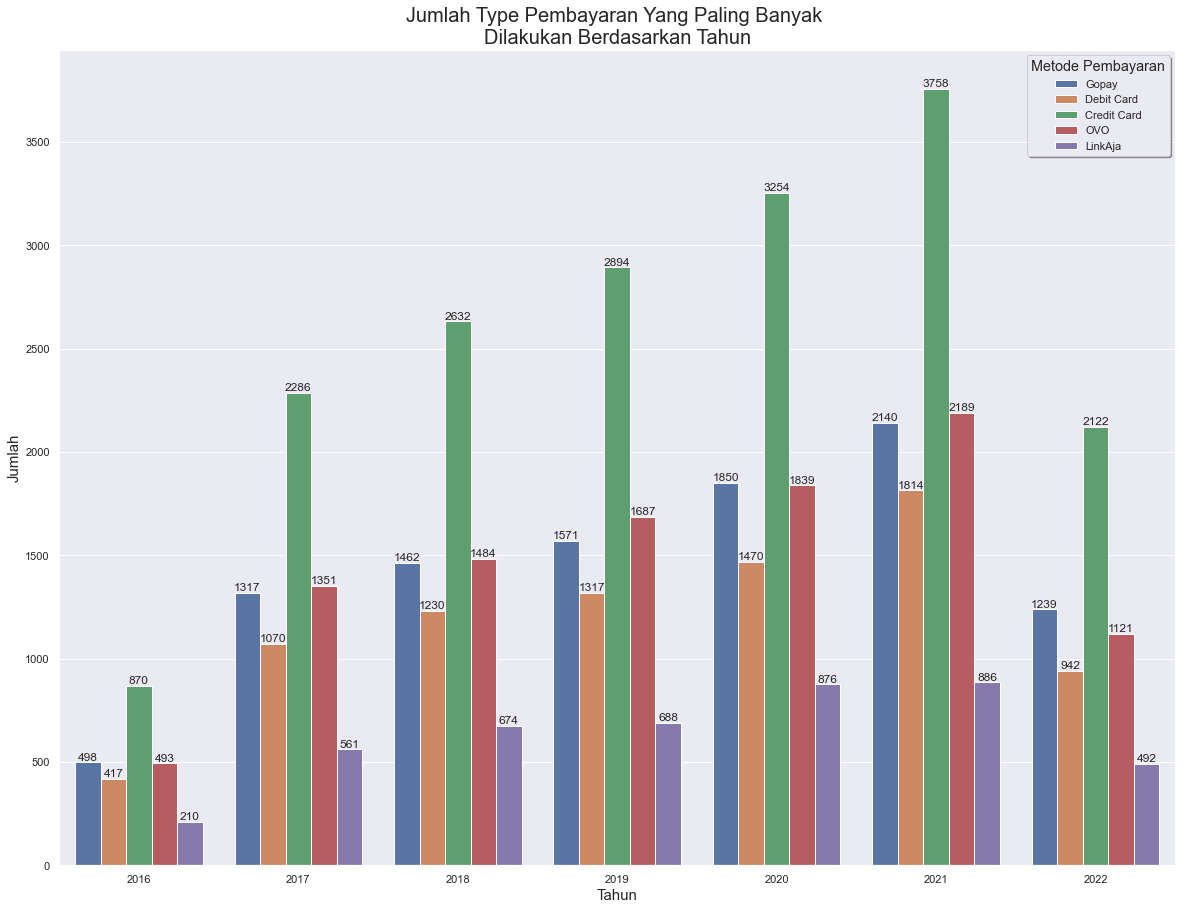

In [190]:
plt.figure(figsize=(20,15))
a = sns.countplot('type_buy_tahun', hue='payment_method', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Type Pembayaran Yang Paling Banyak \nDilakukan Berdasarkan Tahun', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Tahun', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()

### Bagaimana distribusi jumlah transaksi berdasarkan bulan?

In [191]:
bulan_colss = {1:'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli', 8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'}
df['type_buy_bulan'] = df['created_at_x'].dt.month
df['type_buy_bulan'] = df['type_buy_bulan'].map(bulan_colss)
#df['type_buy_bulan'].value_counts()


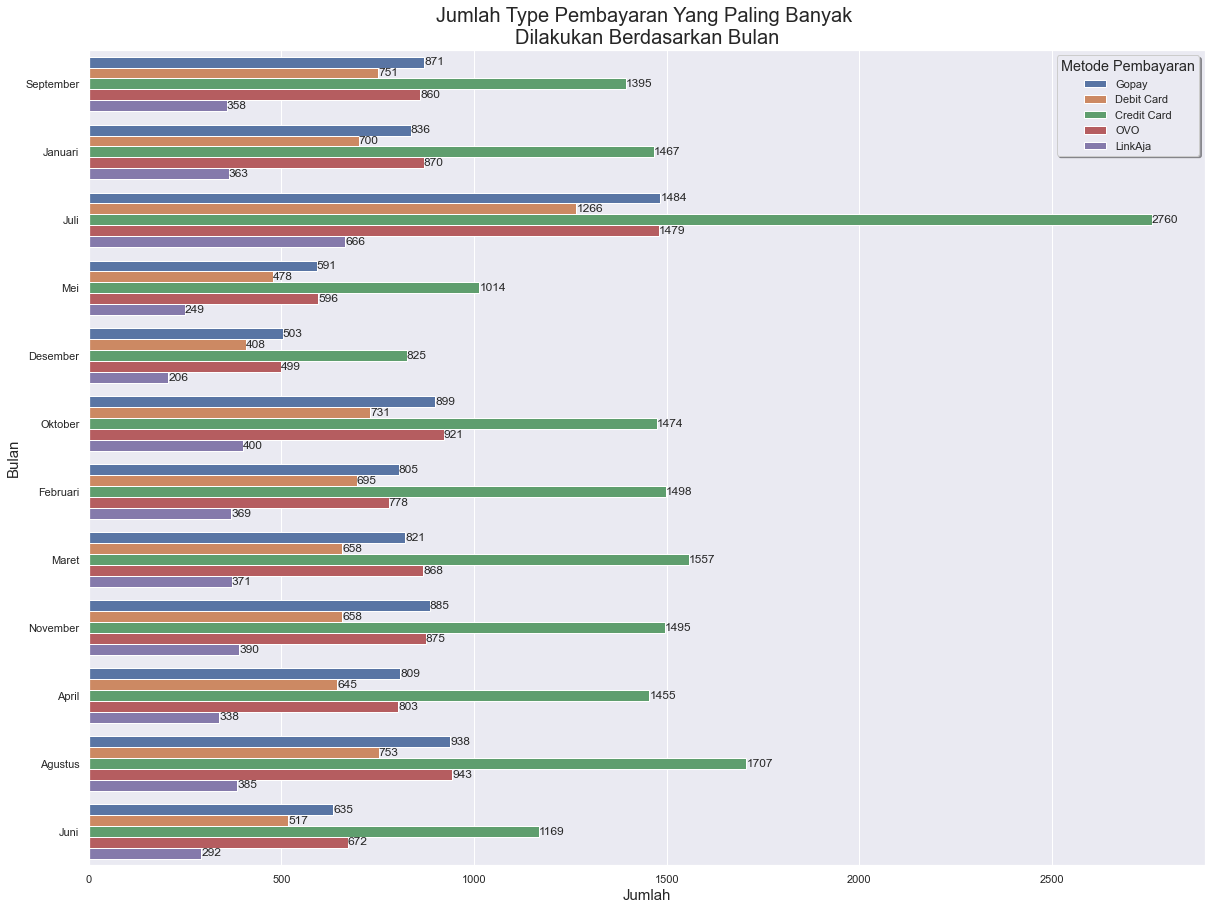

In [192]:
plt.figure(figsize=(20,15))
a = sns.countplot(y='type_buy_bulan',hue='payment_method', data=df, orient='h')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Type Pembayaran Yang Paling Banyak \nDilakukan Berdasarkan Bulan', fontsize=20)
plt.ylabel('Bulan', fontsize=15)
plt.xlabel('Jumlah', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()    

### Bagaimana Type Pembayaran yang paling banyak dilakukan oleh customer setiap harinya?

In [193]:
df['type_buy_hari'] = df['created_at_x'].dt.day_of_week
df['type_buy_hari'] = df['type_buy_hari'].map({0:'Senin', 1:'Selasa', 2:'Rabu', 3:'Kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'})
#df['type_buy_hari'].value_counts()

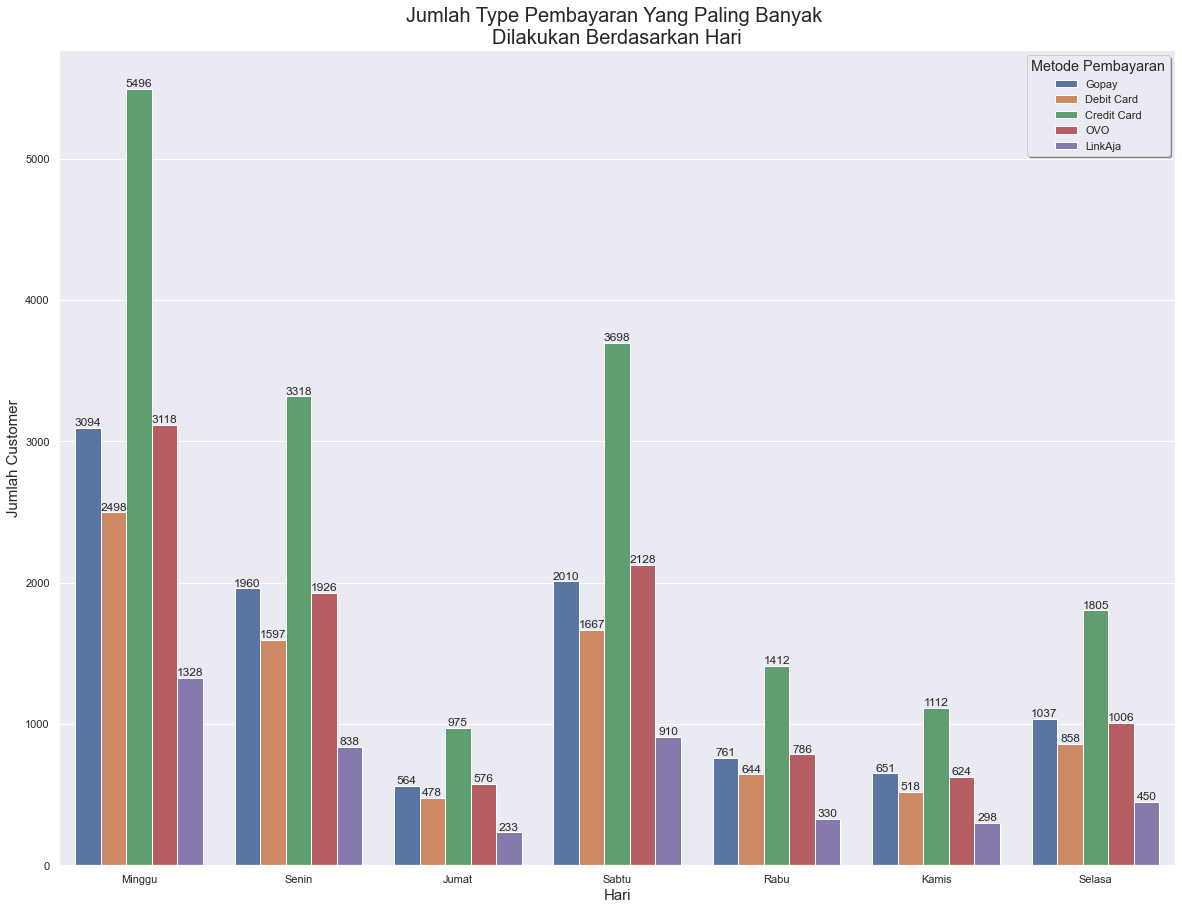

In [194]:
plt.figure(figsize=(20,15))
a = sns.countplot('type_buy_hari', hue='payment_method', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Type Pembayaran Yang Paling Banyak \nDilakukan Berdasarkan Hari', fontsize=20)
plt.ylabel('Jumlah Customer', fontsize=15)
plt.xlabel('Hari', fontsize=15)
plt.legend(loc='upper right', ncol=1, title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()

### Bagaimana distribusi jumlah transaksi berdasarkan pembagian waktu?

In [195]:
# Kategori waktu type pembayaran yang paling banyak digunakan
type_buy_jam = df.groupby('customer_id')['created_at_x'].max().dt.hour
type_buy_jam = pd.DataFrame(type_buy_jam).reset_index()
type_buy_jam.columns = ['customer_id', 'jam_promo']

type_jam_buy = []
for x in type_buy_jam['jam_promo']:
    if (x >= 5) & (x < 11):
        type_jam_buy.append('Pagi')
    elif (x >= 11) & (x < 15):
        type_jam_buy.append('Siang')
    elif (x >= 15) & (x < 18):
        type_jam_buy.append('Sore')
    elif (x >= 18) & (x <= 24):
        type_jam_buy.append('Malam')
    elif (x > 0) & (x < 5):
        type_jam_buy.append('Dini Hari')
        
df_wkt = pd.DataFrame({'type_jam_buy':type_jam_buy})
type_buy_jam['type_jam_buy'] = df_wkt
#type_buy_jam['type_jam_buy'].value_counts()


In [196]:
df = pd.merge(df, type_buy_jam, on='customer_id', how='left')

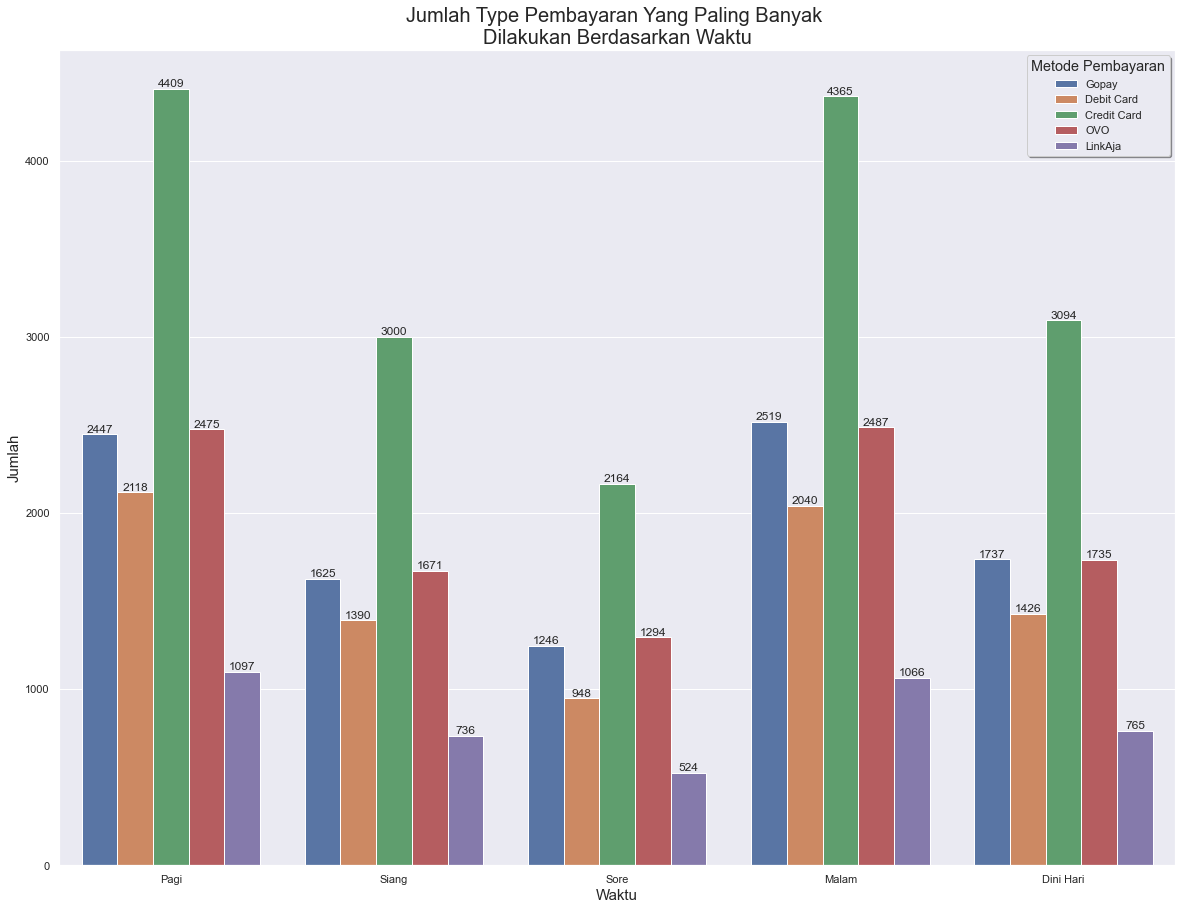

In [197]:
plt.figure(figsize=(20,15))
a = sns.countplot('type_jam_buy', hue='payment_method', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Type Pembayaran Yang Paling Banyak \nDilakukan Berdasarkan Waktu', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Waktu', fontsize=15)
plt.legend(bbox_to_anchor=(1,1),title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()    

### Bagaimana distribusi churn berdasarkan type pembayaran?

In [198]:
# Churn Customer Berdasarkan Type Pembayaran
df_churn = df.groupby(['payment_method', 'churn'])['customer_id'].count().reset_index()
df_churn.columns = ['payment_method', 'churn', 'jumlah']
#df_churn


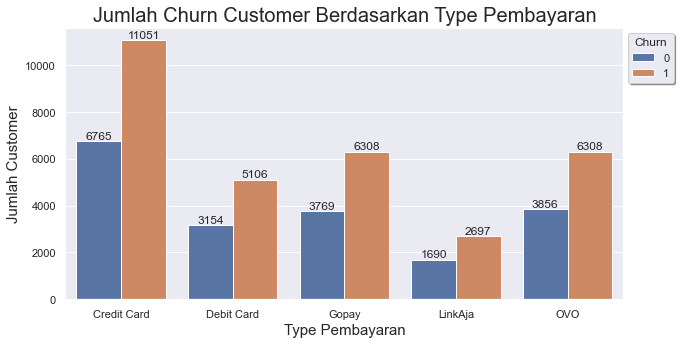

In [199]:
plt.figure(figsize=(10,5))
a = sns.barplot(x='payment_method', y='jumlah', hue='churn', data=df_churn)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Churn Customer Berdasarkan Type Pembayaran', fontsize=20)  
plt.ylabel('Jumlah Customer', fontsize=15)
plt.xlabel('Type Pembayaran', fontsize=15)
plt.legend(title='Churn', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.show()

### Bagaimana distribusi status pembayaran berdasarkan metode pembayaran?

In [200]:
df_trans.groupby(['payment_method','payment_status'])["customer_id"].count()

payment_method  payment_status
Credit Card     Failed             12894
                Success           286692
Debit Card      Failed              5958
                Success           131311
Gopay           Failed              7387
                Success           163947
LinkAja         Failed              3323
                Success            72006
OVO             Failed              7058
                Success           162008
Name: customer_id, dtype: int64

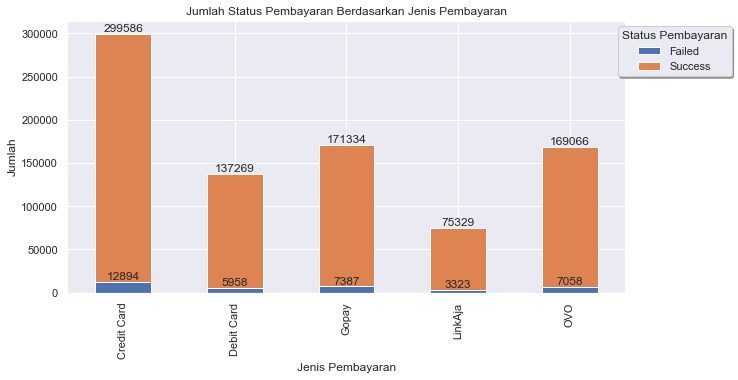

In [201]:
a = df_trans.groupby(['payment_method','payment_status']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,5))
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Status Pembayaran Berdasarkan Jenis Pembayaran')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Pembayaran')
plt.legend(loc='upper right', title='Status Pembayaran', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.show()

### Bagaimana tren jumlah order?

In [202]:
order_dist = df_trans.groupby(df_trans["created_at"].dt.date)[["customer_id"]].count()
order_dist.sort_values("created_at", ascending=False)

customer_id
created_at             
2022-07-31         1145
2022-07-30          647
2022-07-29          467
2022-07-28          602
2022-07-27          694
...                 ...
2016-07-04           13
2016-07-03            8
2016-07-02            5
2016-07-01            3
2016-06-30            1

[2223 rows x 1 columns]

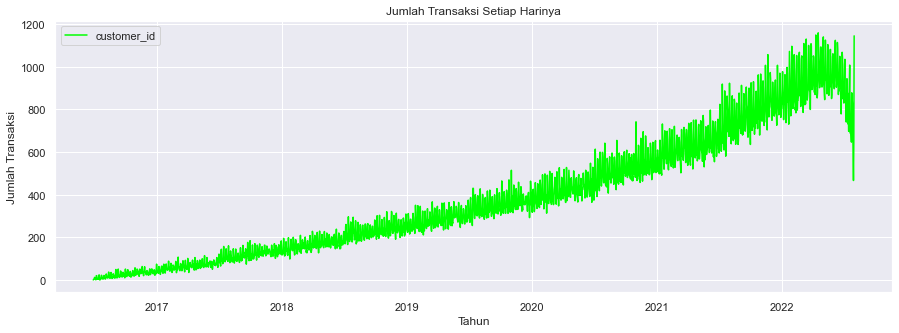

In [203]:
#nyari distribusi belanja
order_dist.plot(kind="line", color = "lime", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Transaksi")
plt.title("Jumlah Transaksi Setiap Harinya")
plt.show()

### Bagaimana Transaksi setiap jam nya?

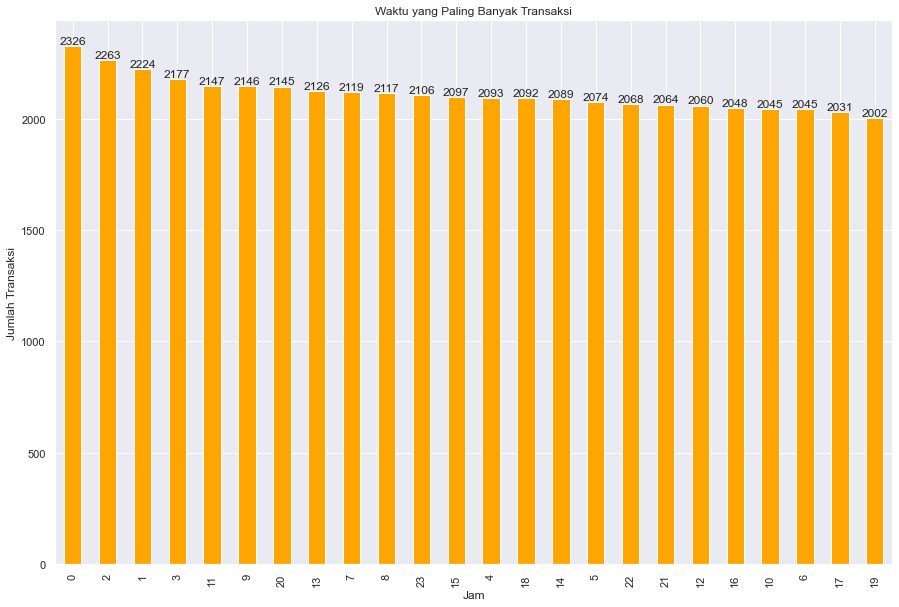

In [204]:
plt.figure(figsize=(15,10))
a = df.groupby(df["created_at_x"].dt.hour)["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "orange")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi")
plt.title("Waktu yang Paling Banyak Transaksi")
plt.show()

### Waktu yang paling banyak dilakukan transaksi?

In [205]:
df['hour'] = df['created_at_x'].dt.hour

In [206]:
#Waktu tersering melakukan order berdasarkan bagian hari
pod_buy = df.groupby(['customer_id'])['hour'].max(df['hour'].count())
pod_buy = pd.DataFrame(data = pod_buy).reset_index()

def pod(x):
    if (x >= 5) & (x < 11):
        return 'Pagi'
    elif (x >= 11) & (x < 15):
        return 'Siang'
    elif (x >= 15) & (x < 18):
        return 'Sore'
    elif (x >= 18) & (x <= 24):
        return 'Malam'
    elif (x > 0) & (x < 5):
        return 'Dini Hari'
pod_buy['kategori_waktu'] = pod_buy['hour'].apply(pod)
#pod_buy['kategori_waktu'].value_counts()

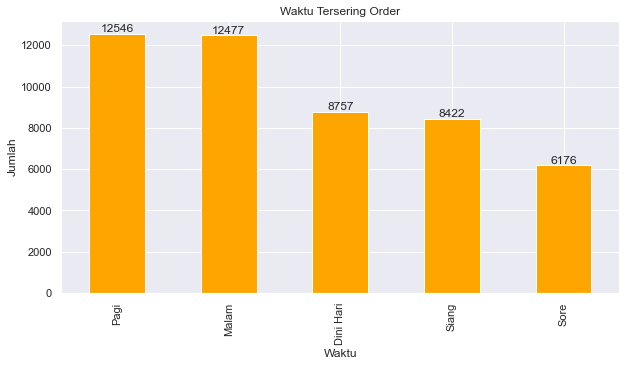

In [207]:
plt.figure(figsize=(10,5))
a = pod_buy.groupby(pod_buy['kategori_waktu'])['customer_id'].count().sort_values(ascending=False).plot(kind="bar", color = "orange")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Waktu Tersering Order')
plt.ylabel('Jumlah')
plt.xlabel('Waktu')
plt.show()

### Hari yang paling banyak dilakukan transaksi?

In [208]:
#Berdasarkan hari dalam seminggu
df['hari'] = df['created_at_x'].dt.dayofweek

#Berdasarkan nama hari
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['day_name'] = df['hari'].map(day_name)

In [209]:
day_buy = df.groupby(['customer_id'])['hari'].max(df['hari'].count())
day_buy = pd.DataFrame(data = day_buy).reset_index()

day_name = {0 : 'Senin', 1 : 'Selasa', 2 : 'Rabu', 3 : 'Kamis', 4 : "Jum'at", 5 : 'Sabtu', 6 : 'Minggu'}
df['day_name'] = df['hari'].map(day_name)
day_buy['modus_day_buy'] = day_buy['hari'].map(day_name)

#day_buy['modus_day_buy'].value_counts()

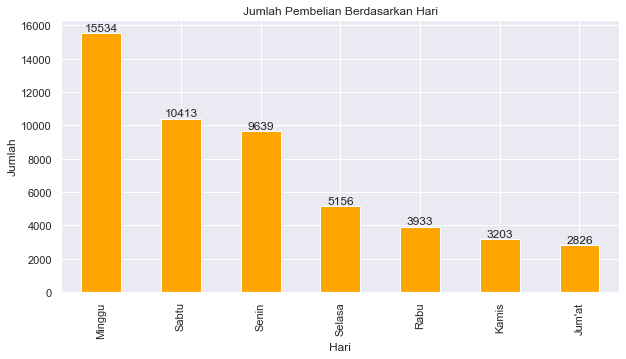

In [210]:
plt.figure(figsize=(10,5))
a = df.groupby(df["day_name"])["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "orange")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Pembelian Berdasarkan Hari')
plt.ylabel('Jumlah')
plt.xlabel('Hari')
plt.show()

### Bagaimana transaksi berdasarkan Tanggal?

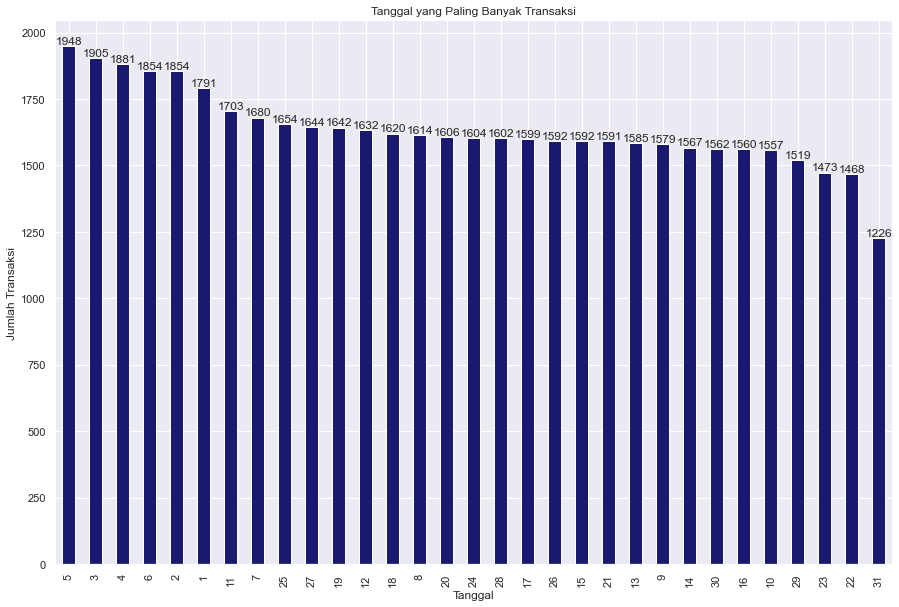

In [211]:
# Tanggal yang paling banyak transaksi
plt.figure(figsize=(15,10))
a = df.groupby(df["created_at_x"].dt.day)["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "midnightblue")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.title("Tanggal yang Paling Banyak Transaksi")
plt.show()


### Bagaimana transaksi berdasarkan Bulan?

In [212]:
bulan = {1 : 'Januari', 2 : 'Februari', 3 : 'Maret', 4 : 'April', 5 : 'Mei', 6 : 'Juni', 7 : 'Juli', 8 : 'Agustus', 9 : 'September', 10 : 'Oktober', 11 : 'November', 12 : 'Desember'}
df['bulan'] = df['created_at_x'].dt.month
df['bulan'] = df['bulan'].map(bulan)


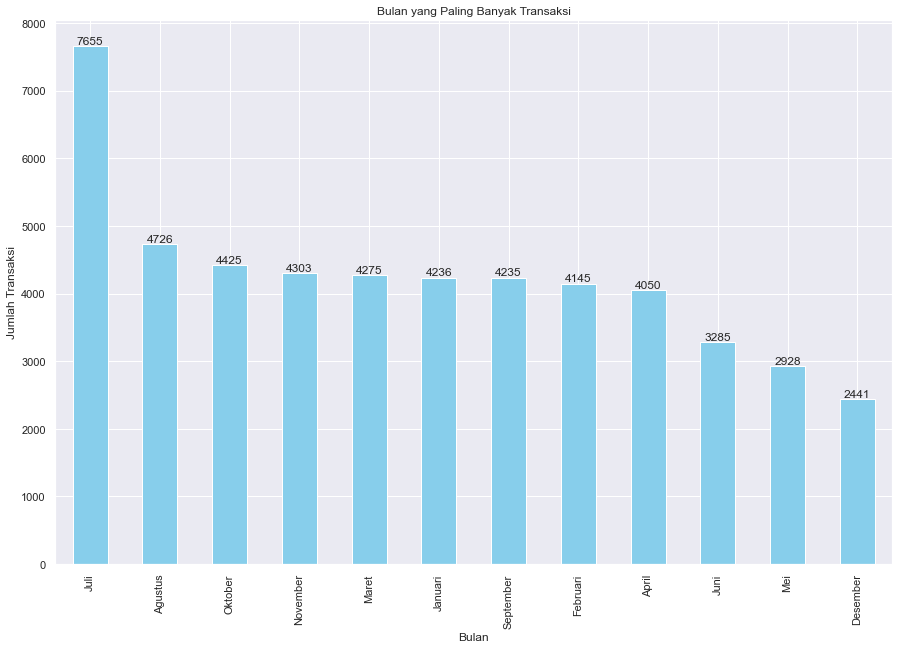

In [213]:
plt.figure(figsize=(15,10))
a = df.groupby(df['bulan'])["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "skyblue")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.title("Bulan yang Paling Banyak Transaksi")
plt.show()


### Bagaimana transaksi berdasarkan Tahun?

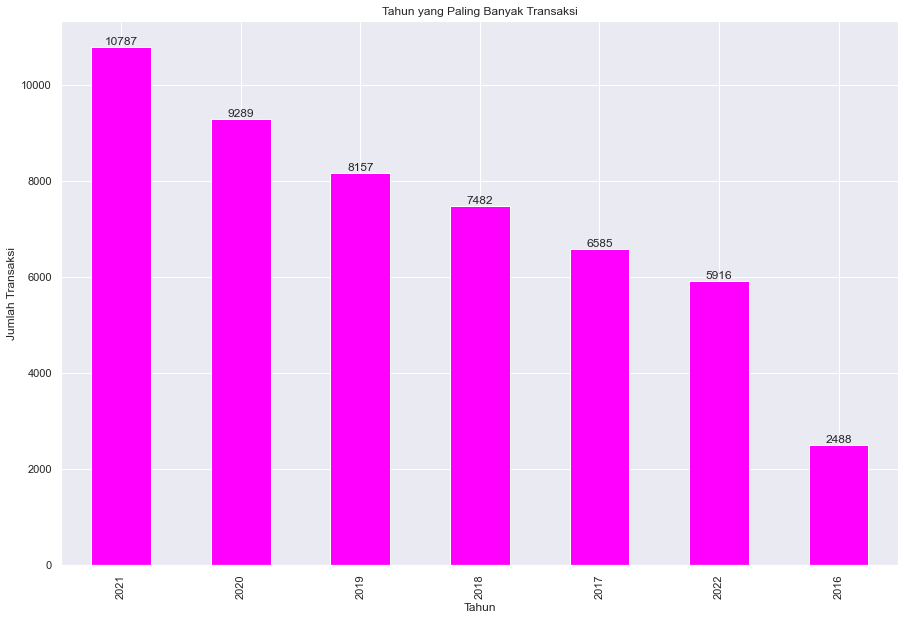

In [214]:
plt.figure(figsize=(15,10))
a = df.groupby(df["created_at_x"].dt.year)["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "magenta")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Transaksi")
plt.title("Tahun yang Paling Banyak Transaksi")
plt.show()

### Apa promo code yang paling banyak digunakan?

In [215]:
most_promo_code = df_trans.groupby(['promo_code'])['customer_id'].count().sort_values(ascending=False)
most_promo_code

promo_code
NOPROMO          526048
AZ2022            89227
BUYMORE           66835
WEEKENDSERU       61941
XX2022            44744
LIBURDONG         20965
WEEKENDMANTAP     20448
SC2022            11271
STARTUP           11105
Name: customer_id, dtype: int64

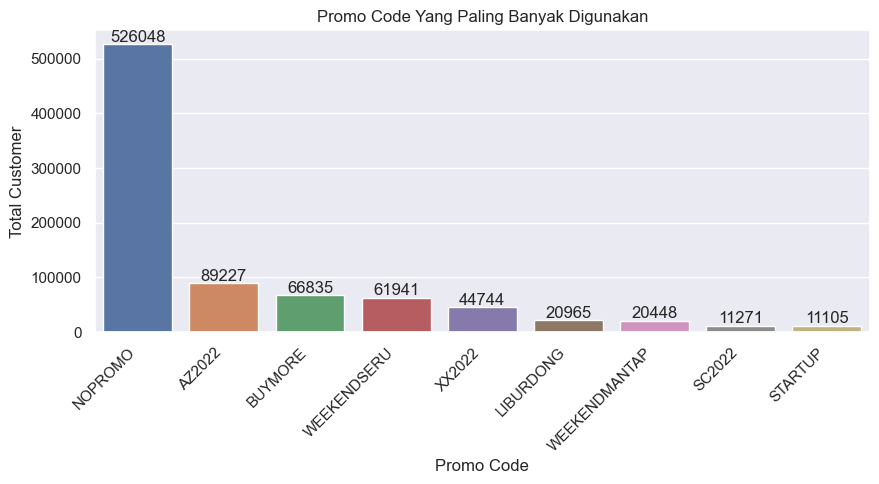

In [216]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=most_promo_code.index, y=most_promo_code.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.title('Promo Code Yang Paling Banyak Digunakan')
plt.ylabel('Total Customer')
plt.xlabel('Promo Code')
plt.show()

### Jenis pembayaran yang paling banyak menggunakan promo?

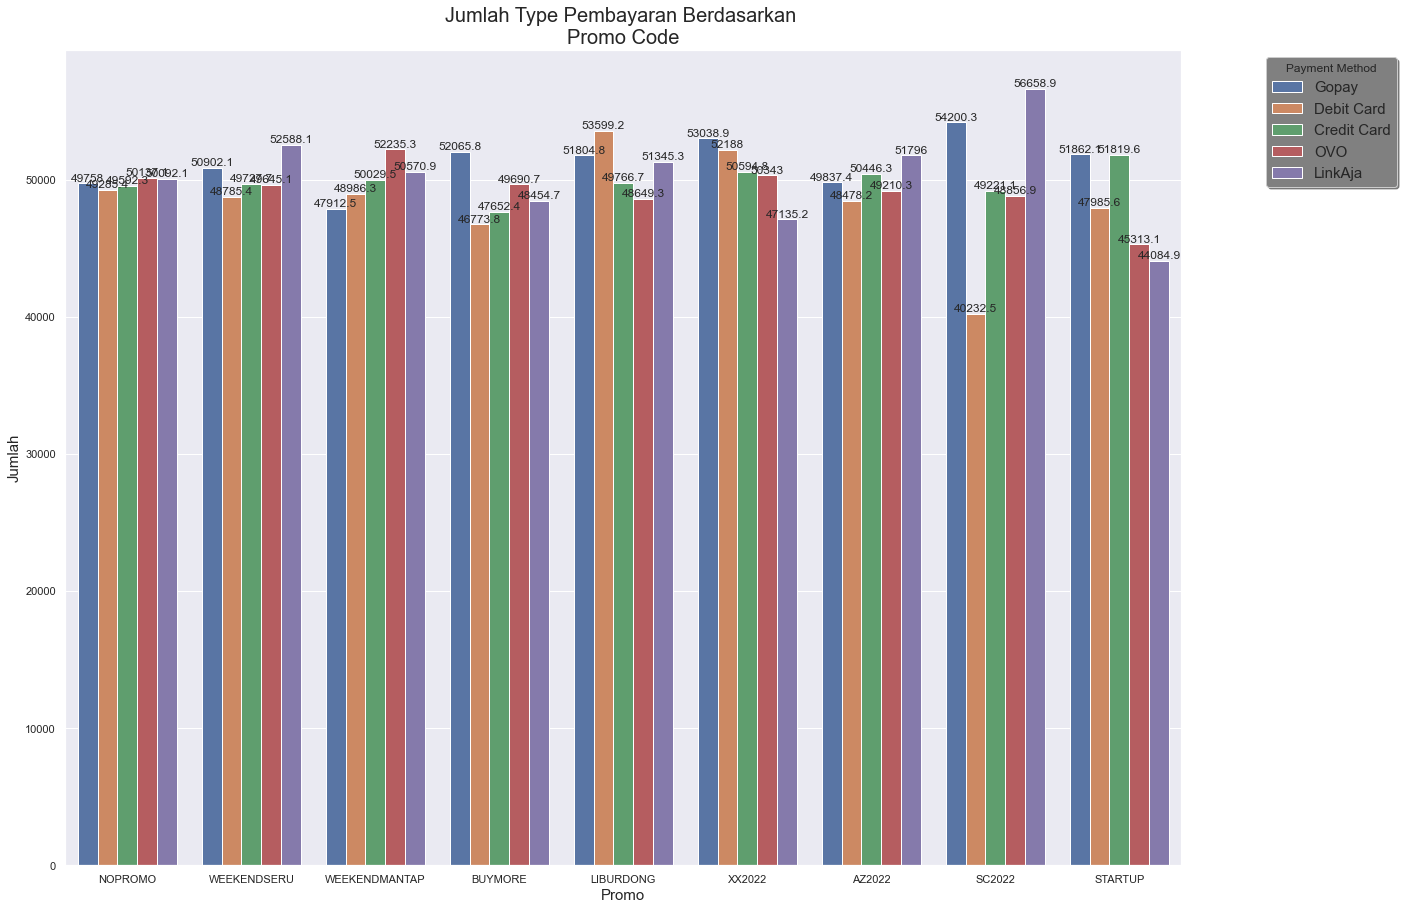

In [217]:
plt.figure(figsize=(20,15))
a = sns.barplot(x='promo_code', y='customer_id', hue='payment_method', data=df, ci=None, )
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Type Pembayaran Berdasarkan \nPromo Code', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Promo', fontsize=15)
plt.legend(loc='upper right', fontsize=15, title='Payment Method',shadow=True, facecolor='grey', bbox_to_anchor=(1.2, 1))
plt.show()

### Promo code yang paling banyak digunakan berdasarkan waktu event?

In [218]:
# Promo Code yang paling banyak digunakan berdasarkan hari
#Berdasarkan hari dalam seminggu
df['hari_promo'] = df['event_time'].dt.dayofweek

#Berdasarkan nama hari
hari_promo = {0 : 'Senin', 1 : 'Selasa', 2 : 'Rabu', 3 : 'Kamis', 4 : "Jum'at", 5 : 'Sabtu', 6 : 'Minggu'}
df['hari_promo'] = df['hari_promo'].map(hari_promo)

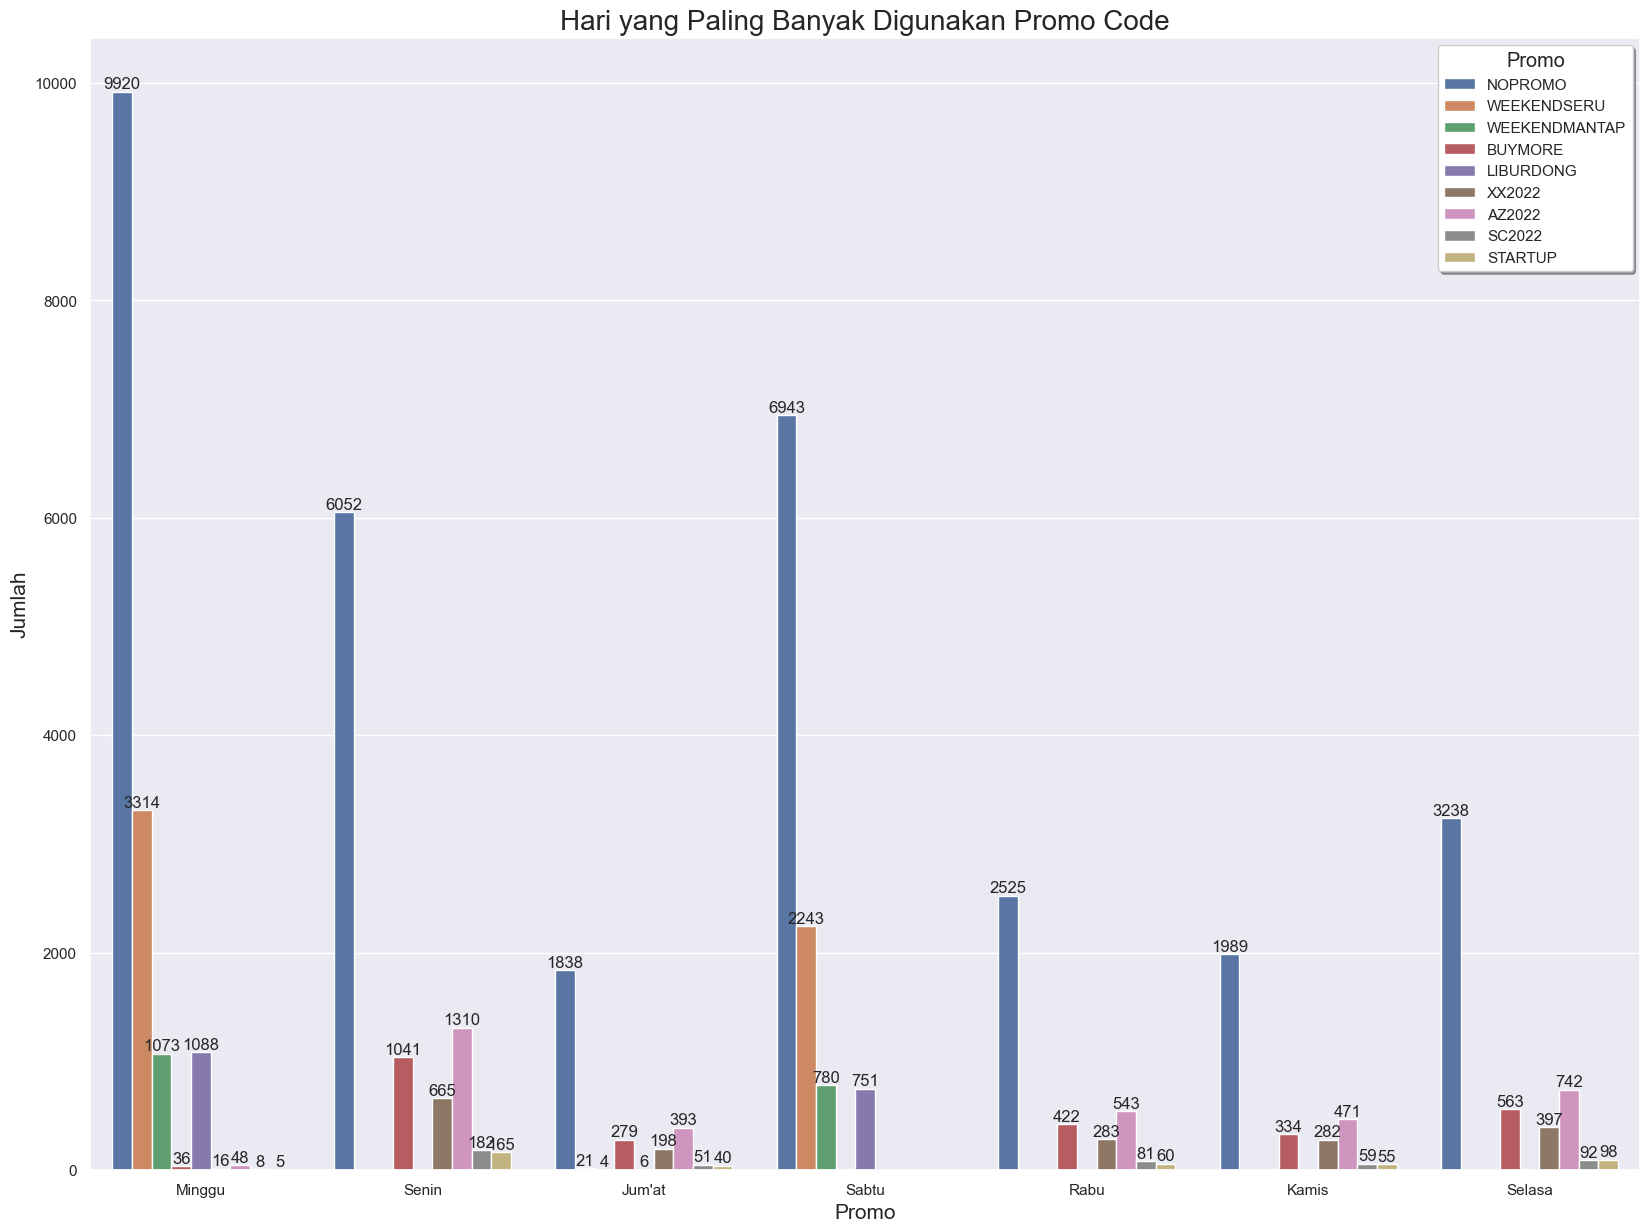

In [219]:
plt.figure(figsize=(20,15), dpi=100)
a = sns.countplot(x='hari_promo', hue='promo_code', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Hari yang Paling Banyak Digunakan Promo Code', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Promo', fontsize=15)
plt.legend(loc='upper right', title='Promo',shadow=True, facecolor='white', title_fontsize='large')
plt.show()

### Bagaimana tanggal event yang paling banyak menggunakan promo?

In [220]:
df['tanggal_promo'] = df['event_time'].dt.day
#df['tanggal_promo'].value_counts()

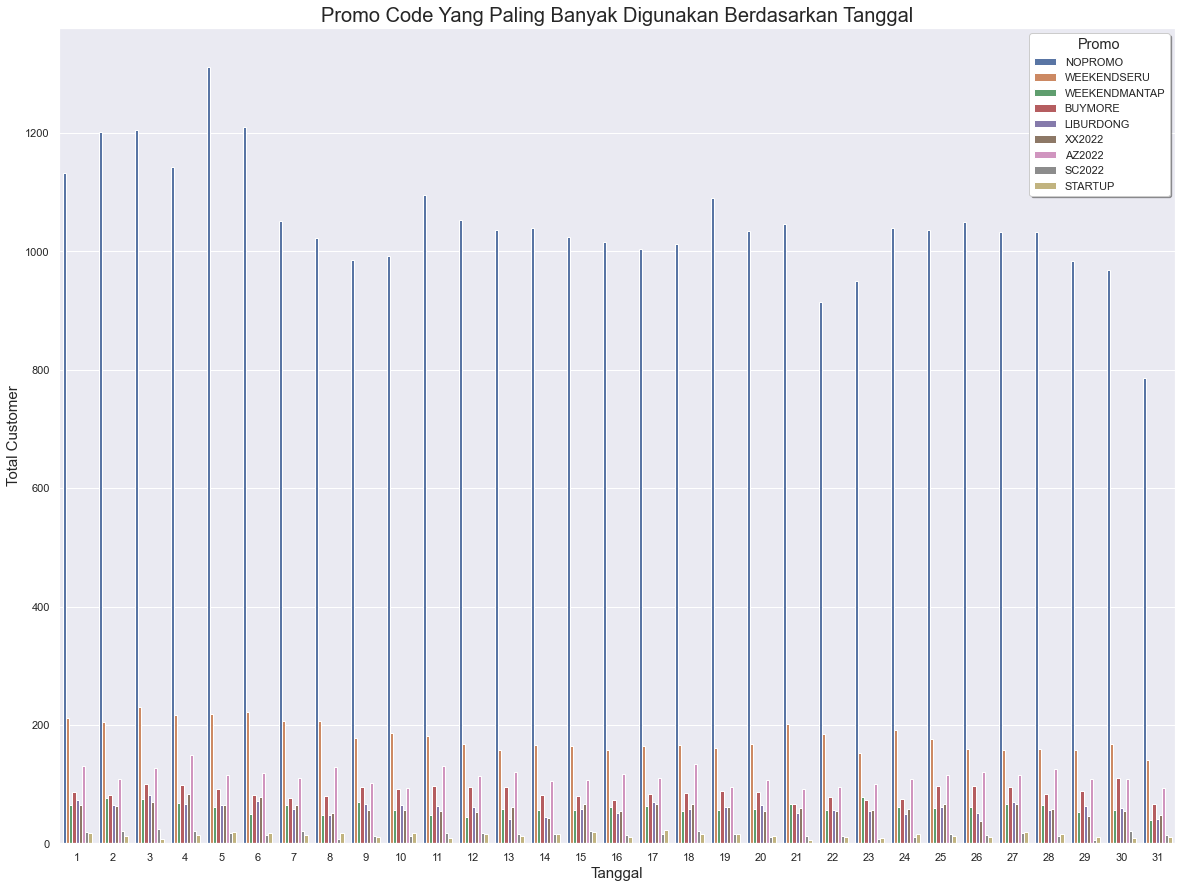

In [221]:
plt.figure(figsize=(20,15))
sns.countplot(x='tanggal_promo', hue='promo_code', data=df)
plt.title('Promo Code Yang Paling Banyak Digunakan Berdasarkan Tanggal', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Tanggal', fontsize=15)
plt.legend(loc='upper right', title='Promo',shadow=True, facecolor='white', title_fontsize='large')
plt.show()

### Bagaimana promo code di setiap jam nya?

In [222]:
df['jam_promo'] = df['event_time'].dt.hour
#df['jam_promo'].value_counts()

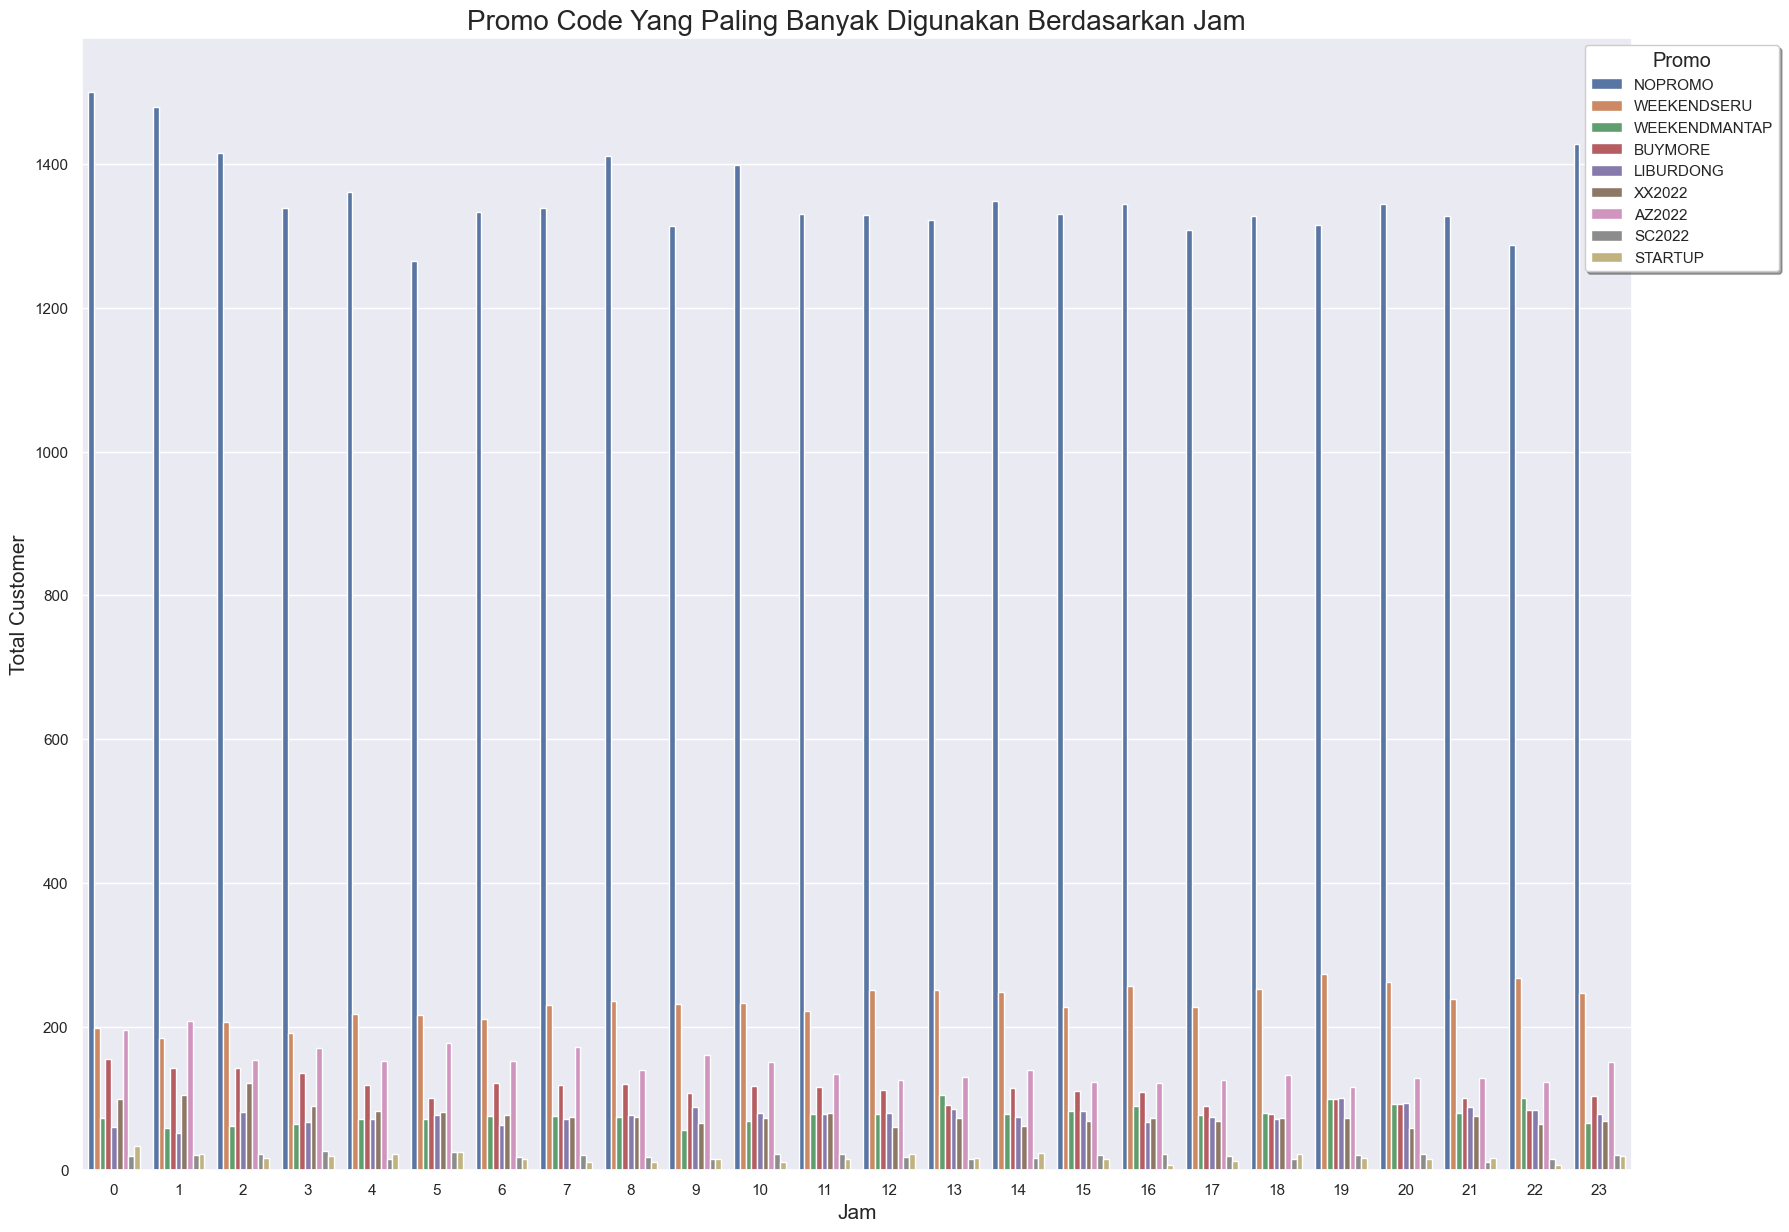

In [223]:
plt.figure(figsize=(20,15), dpi=100)
sns.countplot(x='jam_promo', hue='promo_code', data=df)
plt.title('Promo Code Yang Paling Banyak Digunakan Berdasarkan Jam', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Jam', fontsize=15)
plt.legend(title='Promo',shadow=True, facecolor='white', title_fontsize='large', bbox_to_anchor=(1.1, 1))
plt.show()

### Bagaimana customer yang menggunakan promo code di setiap pembagian waktu?

In [224]:
# Kategori waktu promo code yang paling banyak digunakan
jam_prom = df.groupby('customer_id')['event_time'].max().dt.hour
jam_prom = pd.DataFrame(jam_prom).reset_index()
jam_prom.columns = ['customer_id', 'jam_promo']

kategori_waktu = []
for x in jam_prom['jam_promo']:
    if (x >= 5) & (x < 11):
        kategori_waktu.append('Pagi')
    elif (x >= 11) & (x < 15):
        kategori_waktu.append('Siang')
    elif (x >= 15) & (x < 18):
        kategori_waktu.append('Sore')
    elif (x >= 18) & (x <= 24):
        kategori_waktu.append('Malam')
    elif (x > 0) & (x < 5):
        kategori_waktu.append('Dini Hari')
        
df_wkt = pd.DataFrame({'kategori_waktu':kategori_waktu})
jam_prom['kategori_waktu'] = df_wkt
#jam_prom['kategori_waktu'].value_counts()

In [225]:
df = pd.merge(df, jam_prom, on='customer_id', how='left')

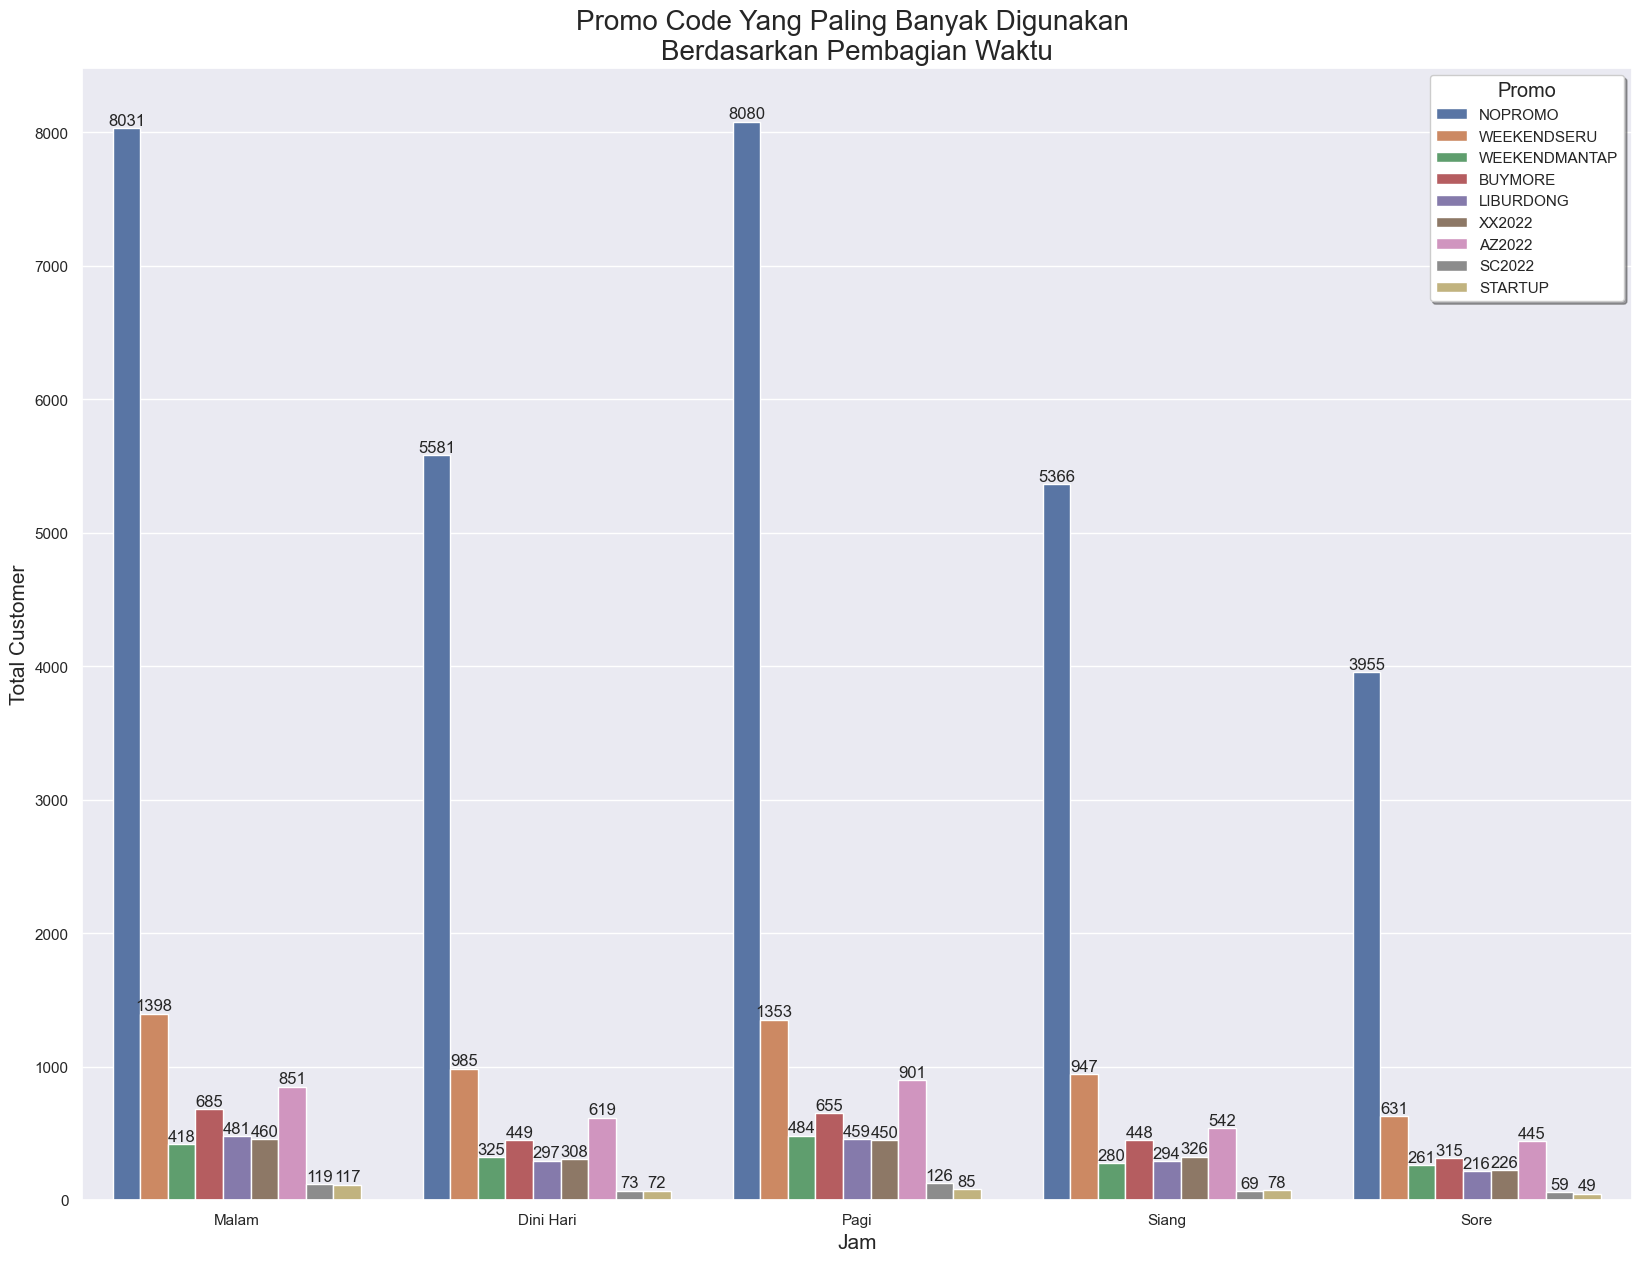

In [226]:
plt.figure(figsize=(20,15), dpi=100)
a = sns.countplot(x='kategori_waktu', hue='promo_code', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Promo Code Yang Paling Banyak Digunakan \nBerdasarkan Pembagian Waktu', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Jam', fontsize=15)
plt.legend(title='Promo',shadow=True, facecolor='white', title_fontsize='large')
plt.show()

### Bagaimana customer yang menggunakan promo code di setiap bulan?

In [227]:
# Ganti angka menjadi nama bulan
bulan = {1 : 'Januari', 2 : 'Februari', 3 : 'Maret', 4 : 'April', 5 : 'Mei', 6 : 'Juni', 7 : 'Juli', 8 : 'Agustus', 9 : 'September', 10 : 'Oktober', 11 : 'November', 12 : 'Desember'}
df['bulan_promo'] = df['event_time'].dt.month
df['bulan_promo'] = df['bulan_promo'].map(bulan)
#df['bulan_promo'].value_counts()

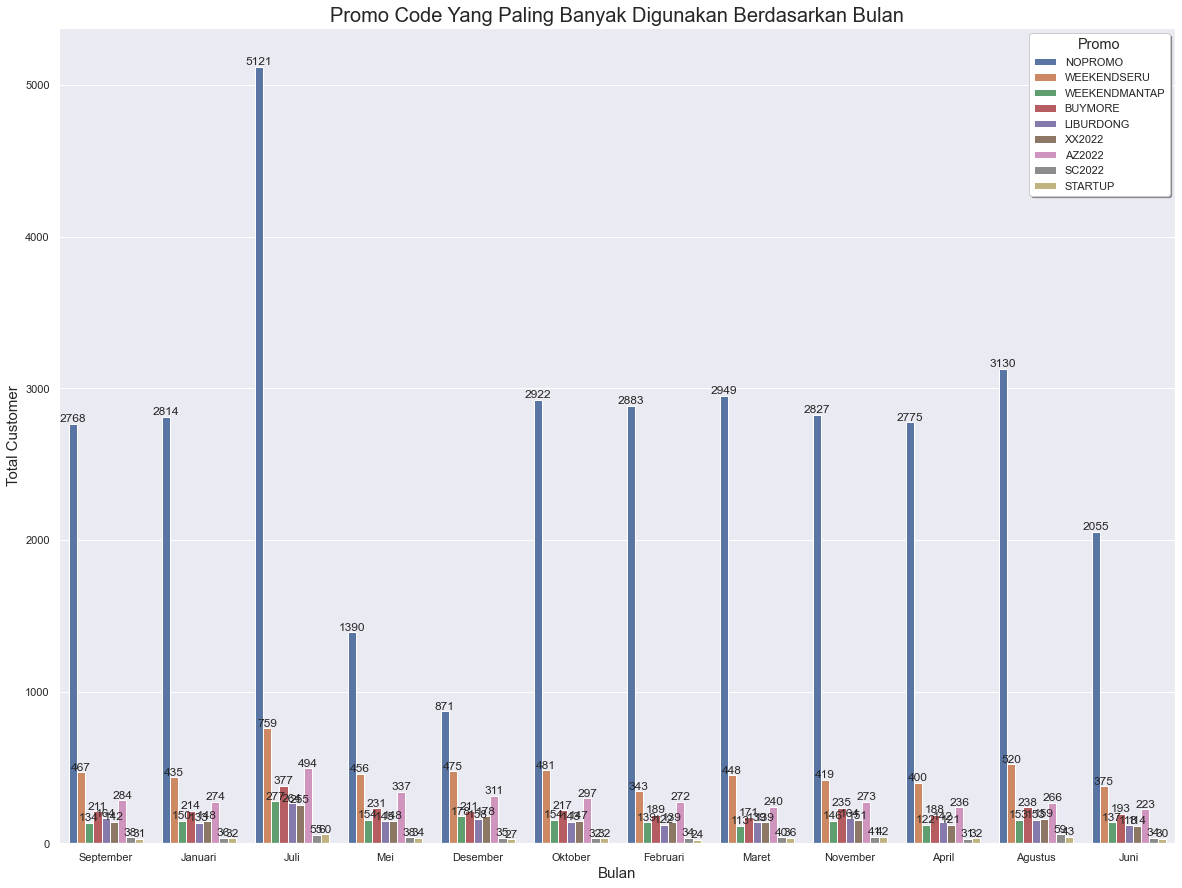

In [228]:
plt.figure(figsize=(20,15))
a = sns.countplot(x='bulan_promo', hue='promo_code', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Promo Code Yang Paling Banyak Digunakan Berdasarkan Bulan', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Bulan', fontsize=15)
plt.legend(title='Promo',shadow=True, facecolor='white', title_fontsize='large')
plt.show()

### Bagaimana customer yang menggunakan promo code di setiap tahun?

In [229]:
df['tahun_prom'] = df['event_time'].dt.year
#df['tahun_prom'].value_counts()

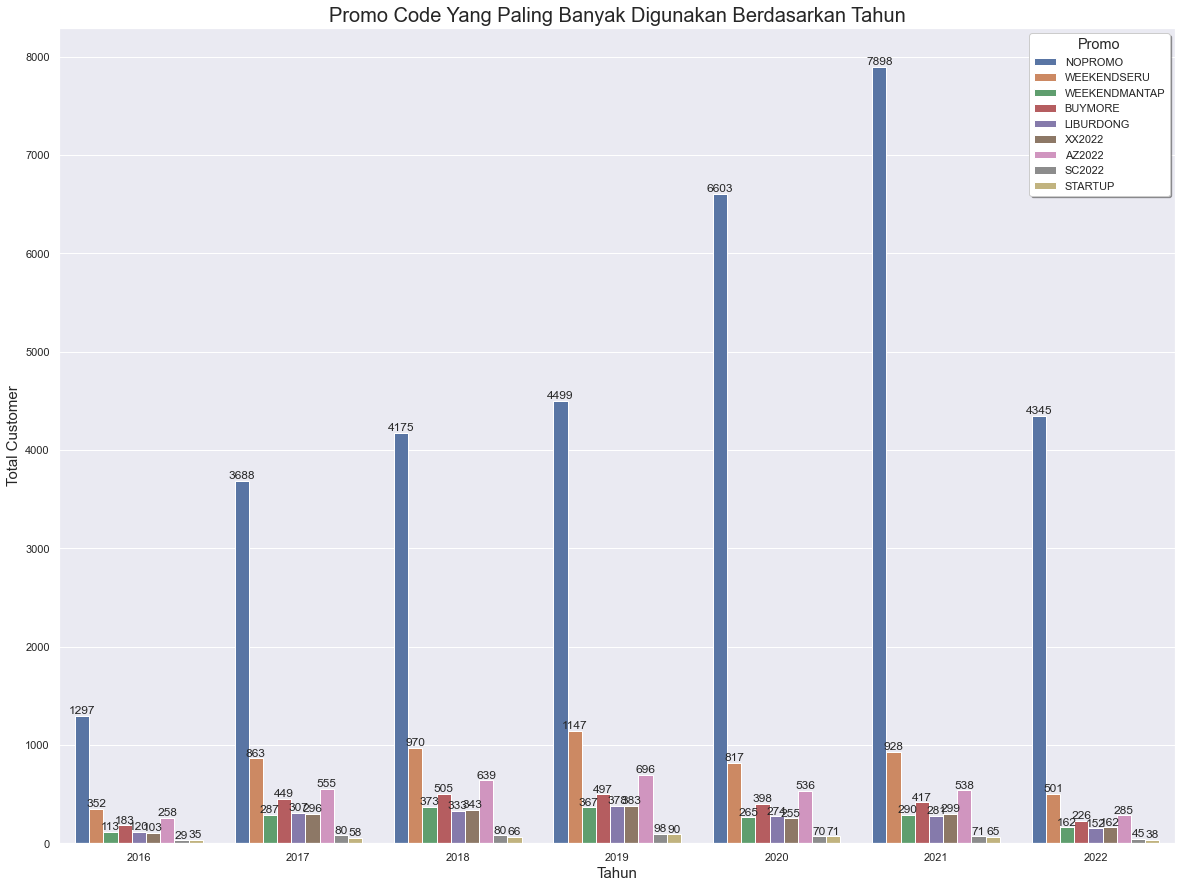

In [230]:
plt.figure(figsize=(20,15))
a = sns.countplot(x='tahun_prom', hue='promo_code', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Promo Code Yang Paling Banyak Digunakan Berdasarkan Tahun', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Tahun', fontsize=15)
plt.legend(title='Promo',shadow=True, facecolor='white', title_fontsize='large')
plt.show()

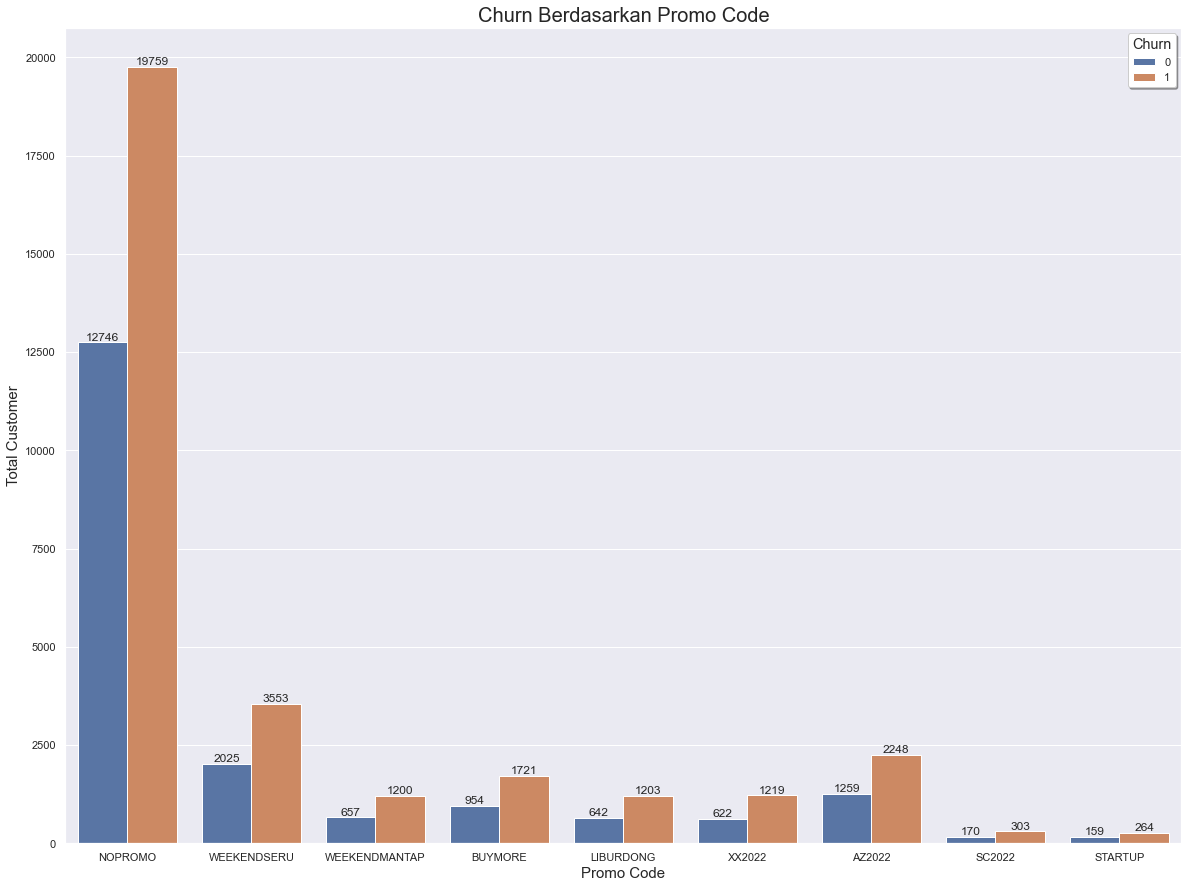

In [231]:
# Churn berdasarkan promo code
plt.figure(figsize=(20,15))
a = sns.countplot(x='promo_code', hue='churn', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Churn Berdasarkan Promo Code', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Promo Code', fontsize=15)
plt.legend(title='Churn',shadow=True, facecolor='white', title_fontsize='large')
plt.show()    

### Bagaimana distribusi shipment fee?

In [232]:
dist_shipment_fee = df_trans.shipment_fee.value_counts()
#dist_shipment_fee

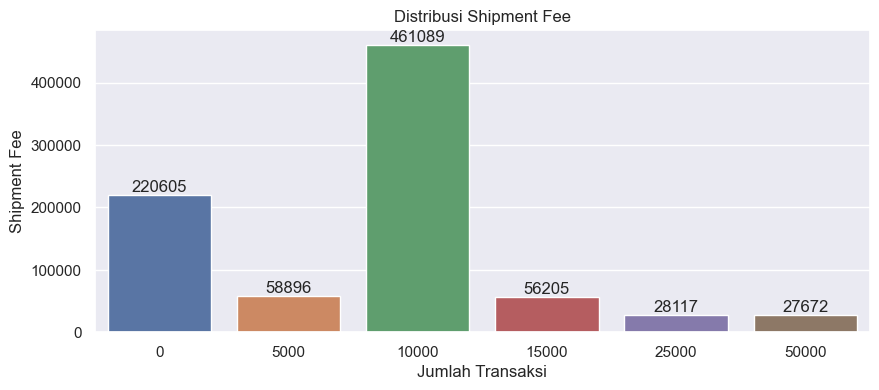

In [233]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=dist_shipment_fee.index, y=dist_shipment_fee.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Distribusi Shipment Fee')
plt.ylabel('Shipment Fee')
plt.xlabel('Jumlah Transaksi')
plt.show()

### Bagaimana biaya pengiriman berdasarkan code promo?

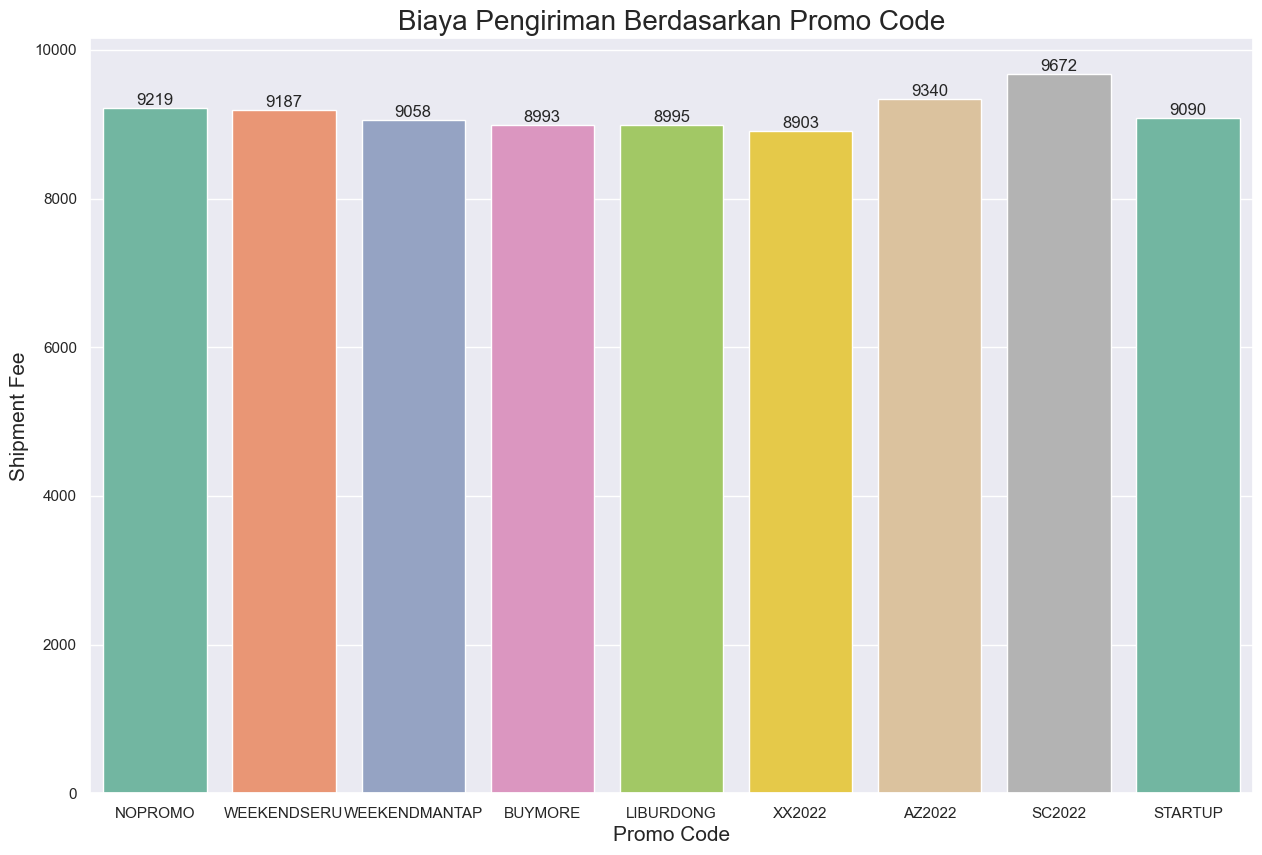

In [234]:
# Biaya pengiriman berdasarkan promo code
plt.figure(figsize=(15,10), dpi=100)
a = sns.barplot(x='promo_code', y='shipment_fee', data=df, palette='Set2', ci=None)
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.title('Biaya Pengiriman Berdasarkan Promo Code', fontsize=20)
plt.ylabel('Shipment Fee', fontsize=15)
plt.xlabel('Promo Code', fontsize=15)
plt.show()


### Bagaimana biaya pengiriman berdasarkan metode pembayaran?

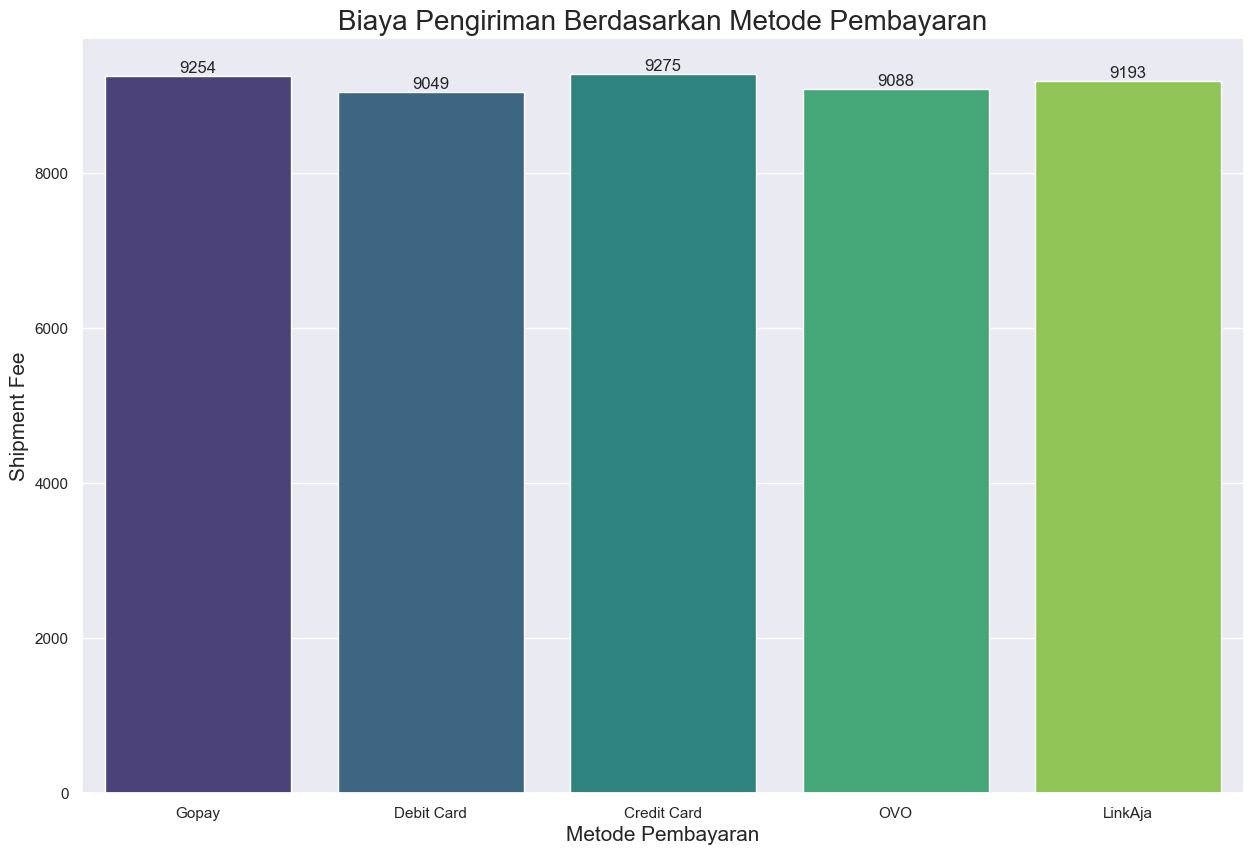

In [235]:
# Biaya pengiriman berdasarkan metode pembayaran
plt.figure(figsize=(15,10), dpi=100)
a = sns.barplot(x='payment_method', y='shipment_fee', data=df, ci=None, palette='viridis')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.title('Biaya Pengiriman Berdasarkan Metode Pembayaran', fontsize=20)
plt.ylabel('Shipment Fee', fontsize=15)
plt.xlabel('Metode Pembayaran', fontsize=15)
plt.show()    

### Bagaimana distribusi traffic user?

In [236]:
traffic_src = df_click.groupby('traffic_source')[['event_id']].count()
traffic_src

event_id
traffic_source          
MOBILE          11548304
WEB              1285298

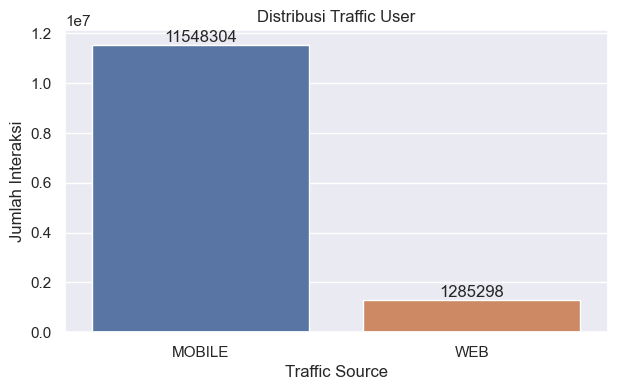

In [237]:
plt.figure(figsize=(7,4), dpi=100)
a = sns.barplot(x=traffic_src.index, y=traffic_src.event_id)
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.title('Distribusi Traffic User')
plt.ylabel('Jumlah Interaksi')
plt.xlabel('Traffic Source')
plt.show()

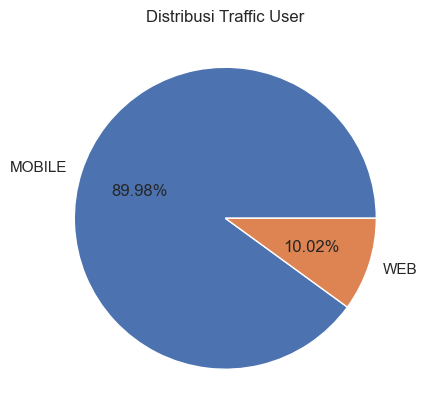

In [238]:
plt.figure(figsize=(5,5), dpi= 100)
df_click.traffic_source.value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Distribusi Traffic User')
plt.ylabel('')
plt.show()

### Aktivitas apa saja yang dilakukan customer?

In [239]:
#Mengecek aktivitas yang dilakukan customer saat mengakses aplikasi
customer_click = df_1.event_name.value_counts()
customer_click

CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

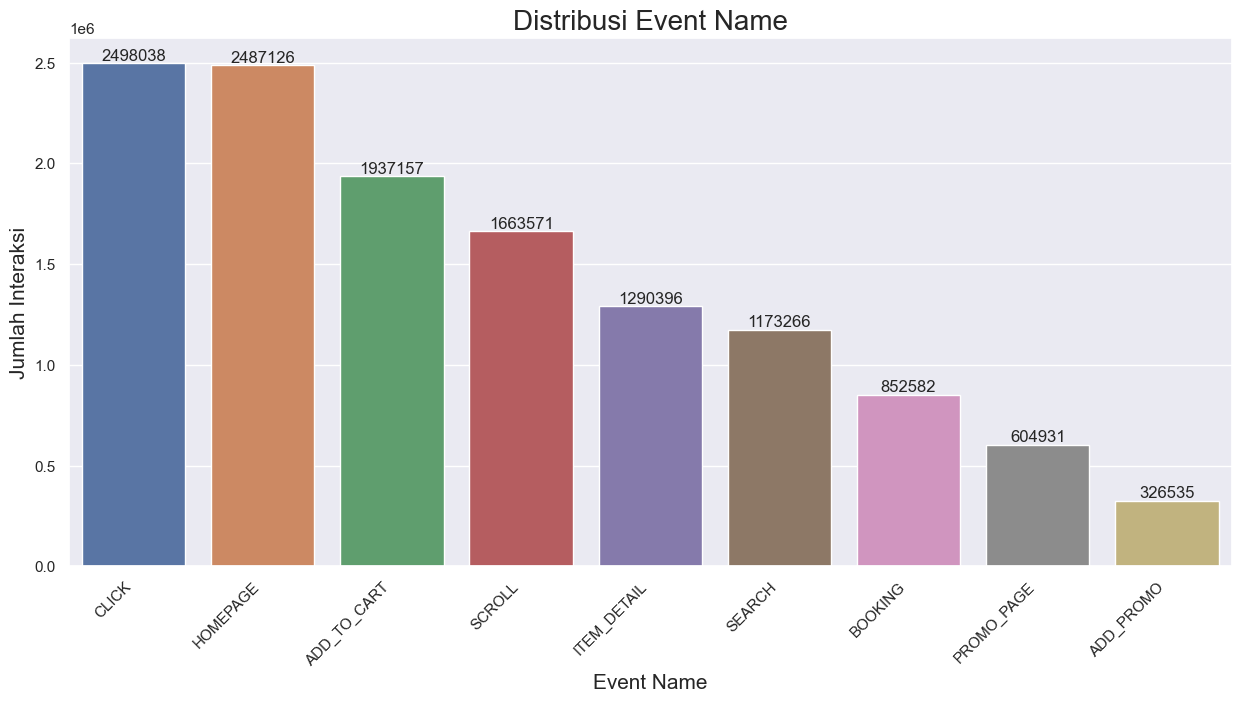

In [240]:
plt.figure(figsize=(15,7), dpi=100)
a = sns.barplot(x=customer_click.index, y=customer_click.values)
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Event Name', fontsize=20)
plt.ylabel('Jumlah Interaksi', fontsize=15)
plt.xlabel('Event Name', fontsize=15)
plt.show()

### Bagaimana tren aktivitas pada platform?

In [241]:
act_dist = df_click.groupby(df_click.event_time.dt.date)[["session_id"]].count()
act_dist.sort_values("event_time", ascending=False)

session_id
event_time            
2022-08-01          24
2022-07-31       27759
2022-07-30       10180
2022-07-29        7650
2022-07-28        9479
...                ...
2016-07-04         181
2016-07-03         150
2016-07-02          67
2016-07-01          18
2016-06-30          14

[2224 rows x 1 columns]

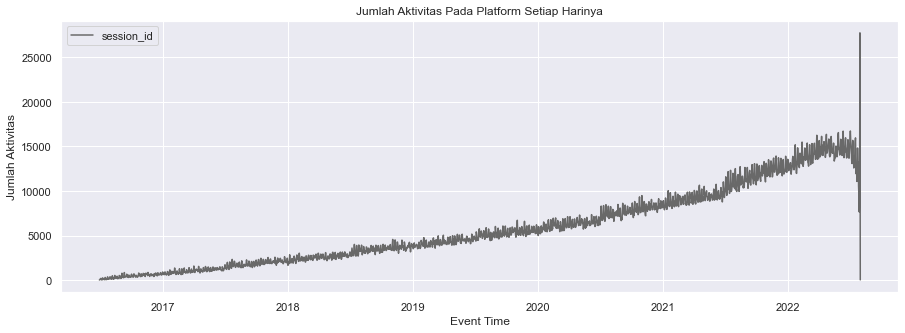

In [242]:
act_dist.plot(kind="line", color = "dimgray", figsize=(15,5))
plt.xlabel("Event Time")
plt.ylabel("Jumlah Aktivitas")
plt.title("Jumlah Aktivitas Pada Platform Setiap Harinya")
plt.show()

### Apa saja yang dicari oleh customer?

In [243]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 

In [244]:
#mengecek pencarian yang dilakukan oleh customer
search = df_click.loc[df_click['event_name']=='SEARCH']

search["keyword"] = search.event_metadata.str[21 : -2]

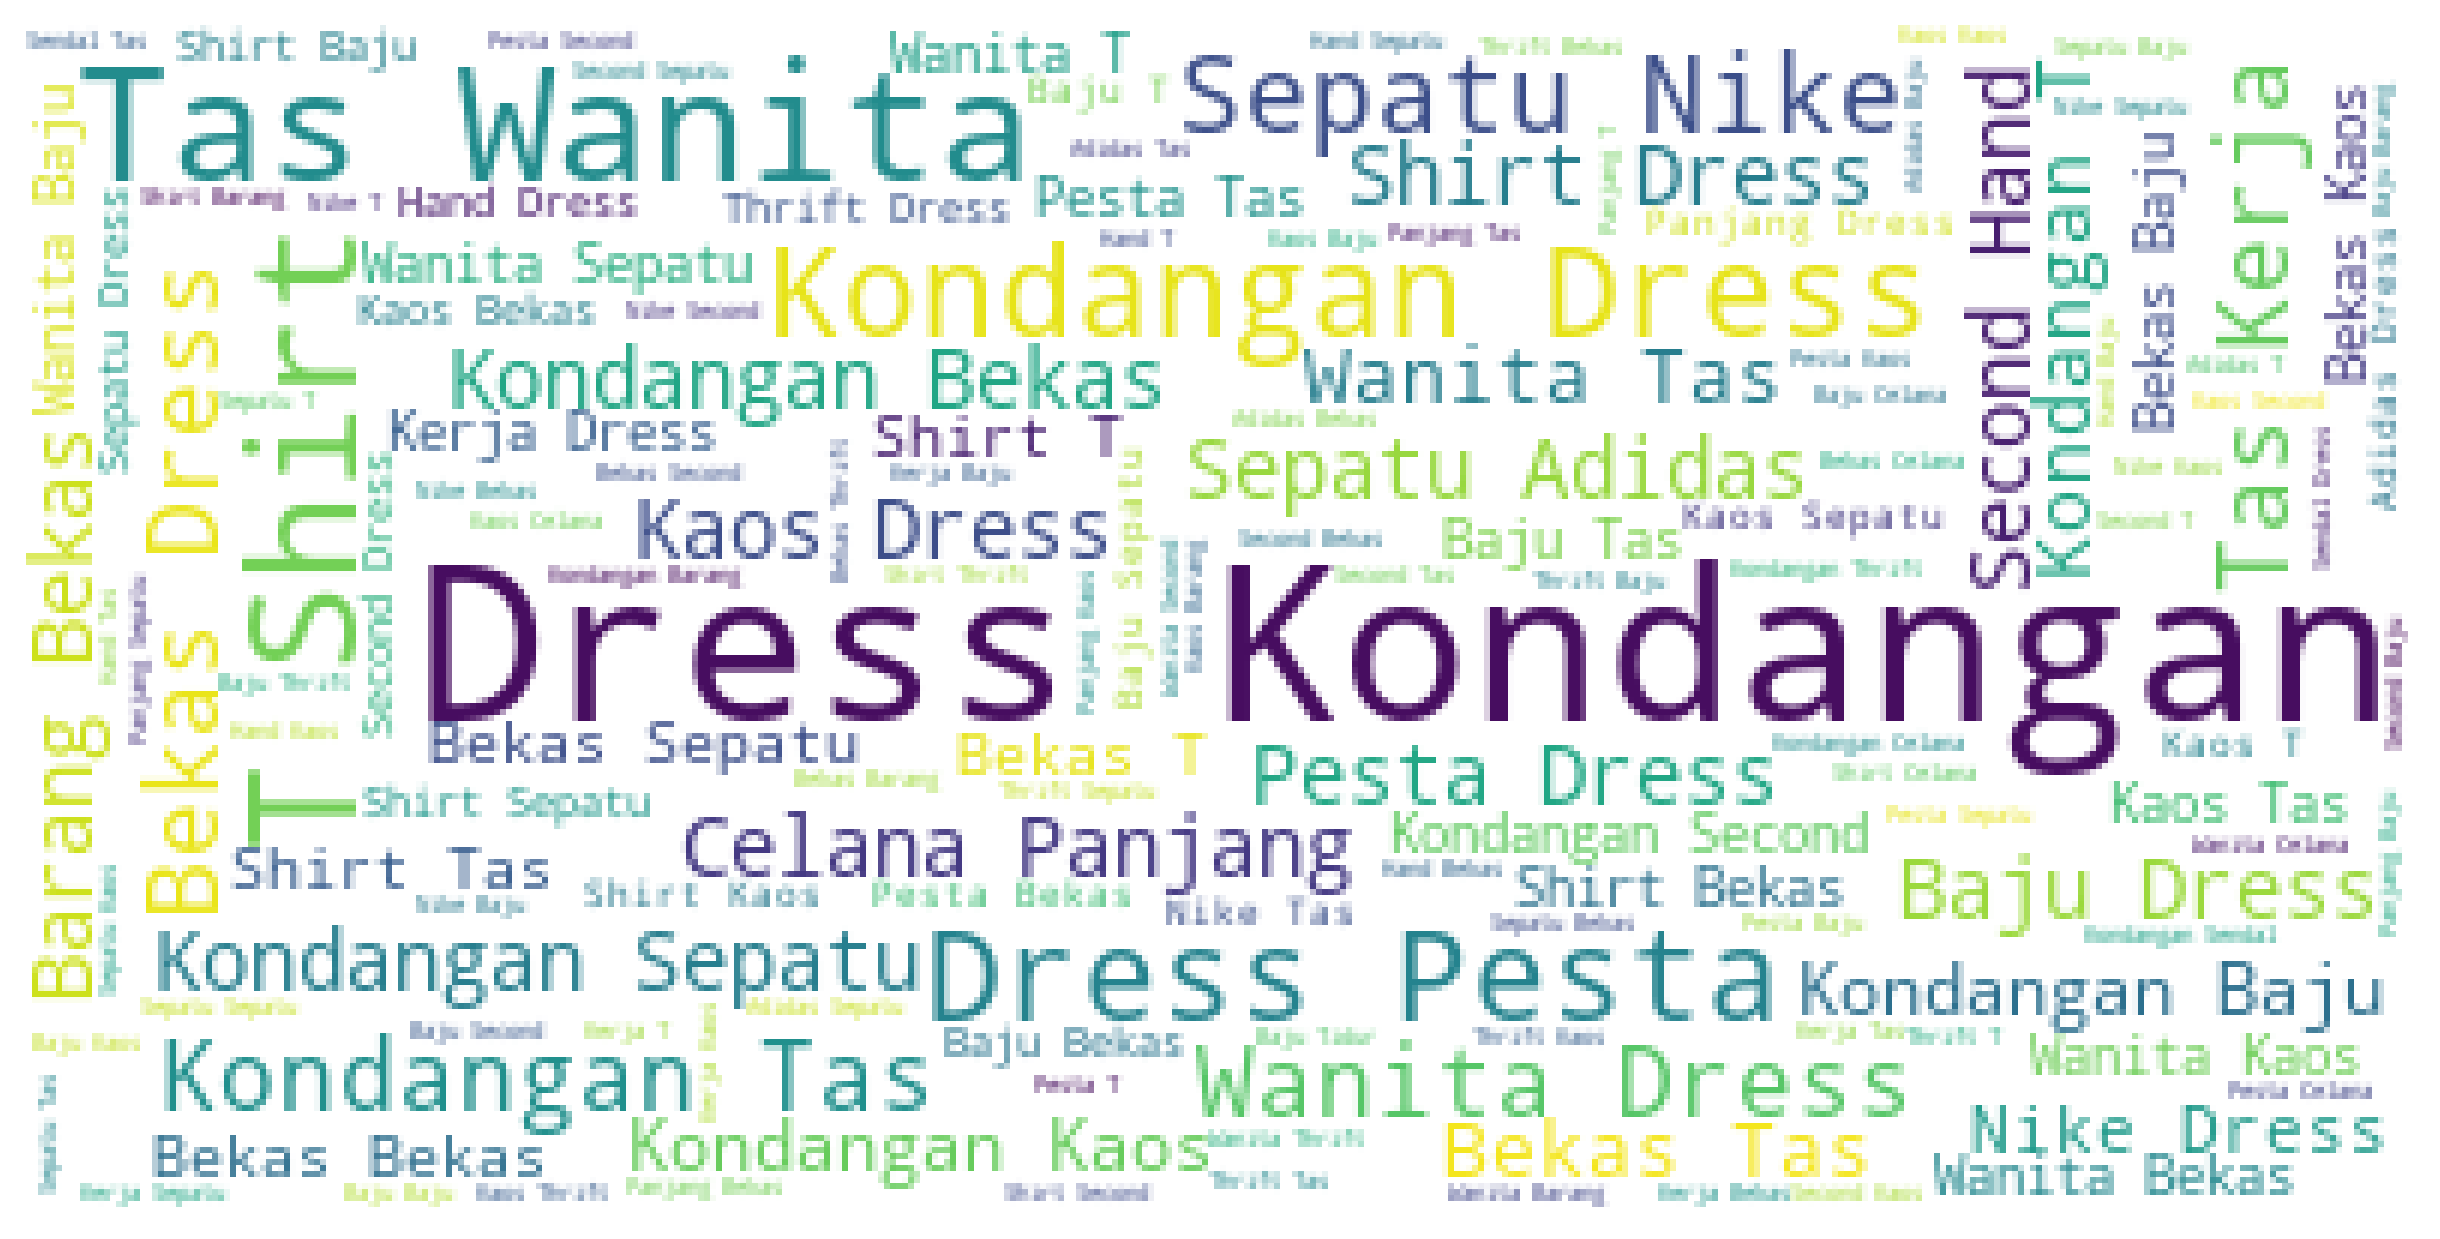

In [245]:
text = " ".join(review for review in search.keyword)
word_cloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)

plt.figure(figsize = (12, 8), facecolor = None, dpi=200) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [246]:
search["keyword"].value_counts()

Dress Kondangan    256194
Tas Wanita         128790
Bekas              112269
T-Shirt            100087
Baju                83873
Kaos                83759
Dress Pesta         76829
Sepatu Nike         51578
Tas Kerja           38677
Second Hand         28429
Second              28195
Thrift              28171
Sepatu              28029
Celana Panjang      28009
Barang Bekas        27818
Sepatu Adidas       25627
Sendal              12787
Celana              11739
T-shirt              7097
Jam                  7000
Topi                 4844
Baju Tidur           2268
Daster               1197
Name: keyword, dtype: int64

### Let's answer this question

In [247]:
#mengecek promo yang digunakan oleh customer
promo = df_1.loc[df_1['event_name']=='ADD_PROMO']
promo

session_id event_name  \
20        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2  ADD_PROMO   
46        d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9  ADD_PROMO   
53        98e66f53-f24f-4238-8c9c-34a0482e22d5  ADD_PROMO   
74        1553b735-081d-4dc5-8d5f-80c1bf442e0f  ADD_PROMO   
169       a1027501-f085-479f-a719-1aeec041408c  ADD_PROMO   
...                                        ...        ...   
12832905  cebfe9cd-0754-4151-9ba7-2372164686b7  ADD_PROMO   
12832915  5e7c20e3-e1f0-42ae-9016-b3227169dea9  ADD_PROMO   
12832967  eef8cec1-9dc6-4756-a4bc-0832da4b6e69  ADD_PROMO   
12833104  137b5f97-a8d0-4898-ac99-12cbbfc52362  ADD_PROMO   
12833120  1c2d6c6a-e1b8-4126-9f5d-082738e87b21  ADD_PROMO   

                               event_time  \
20       2019-09-09 07:22:05.425431+00:00   
46       2019-09-24 16:16:10.425431+00:00   
53       2019-10-02 15:14:18.425431+00:00   
74       2019-10-16 20:20:14.425431+00:00   
169      2019-11-20 03:28:12.425431+00:00   
...                                   ...   
12832905 2020-04-05 10:24:17.116768+00:00   
12832915 2018-06-03 08:00:35.938975+00:00   
12832967 2021-07-25 08:23:48.795552+00:00   
12833104 2021-11-18 17:57:33.345950+00:00   
12833120 2021-09-17 14:34:55.708206+00:00   

                                      event_id  traffic_source  \
20        28329764-aa29-4e7a-9d8e-eee88d00a640               1   
46        7a808081-2384-4a3a-ad00-9f10df4f07a7               0   
53        1d293181-b1cf-46e0-b5eb-682fe652131d               1   
74        c86b2a91-0a21-404a-98e9-947d3060fdc2               1   
169       cef2a298-e38b-4460-bc89-71f7a3039ff7               1   
...                                        ...             ...   
12832905  a5ecd91b-ed11-4c8b-adf7-bab2720bc3c6               1   
12832915  487307cd-222a-4131-bc6a-69effe9f6560               1   
12832967  7fd98dbb-ed1a-4a5e-998f-d09566a67de0               1   
12833104  9abcf7c9-41e3-497e-974f-174a27161d2b               1   
12833120  4dc8868d-509a-4c02-b86d-95331c7e4be7               1   

                                             event_metadata  \
20           {'promo_code': 'AZ2022', 'promo_amount': 7047}   
46          {'promo_code': 'BUYMORE', 'promo_amount': 4903}   
53           {'promo_code': 'AZ2022', 'promo_amount': 6307}   
74        {'promo_code': 'WEEKENDSERU', 'promo_amount': ...   
169          {'promo_code': 'XX2022', 'promo_amount': 2569}   
...                                                     ...   
12832905  {'promo_code': 'WEEKENDMANTAP', 'promo_amount'...   
12832915  {'promo_code': 'WEEKENDSERU', 'promo_amount': ...   
12832967  {'promo_code': 'LIBURDONG', 'promo_amount': 3204}   
12833104     {'promo_code': 'AZ2022', 'promo_amount': 5284}   
12833120     {'promo_code': 'XX2022', 'promo_amount': 5413}   

                               created_at  customer_id  \
20       2019-09-09 12:17:55.425431+00:00      18770.0   
46       2019-09-25 12:30:19.425431+00:00      18770.0   
53       2019-10-03 12:34:39.425431+00:00      18770.0   
74       2019-10-19 13:06:22.425431+00:00      18770.0   
169      2019-11-20 13:15:42.425431+00:00      18770.0   
...                                   ...          ...   
12832905 2020-04-05 10:30:03.393618+00:00      43966.0   
12832915 2018-06-03 08:11:19.271684+00:00      37120.0   
12832967 2021-07-25 08:42:54.951324+00:00      51835.0   
12833104 2021-11-18 18:11:44.718592+00:00      61582.0   
12833120 2021-09-17 14:53:41.902193+00:00      15719.0   

                                    booking_id  \
20        022def29-0956-483a-b27c-ae69263351ef   
46        32766f80-e889-4483-84f6-4da69e8fd8a8   
53        d2d99246-0eee-4d10-a902-7ef1b07d9c1f   
74        63f47c2b-bd2a-4f97-9d1b-d89d9477566e   
169       a3e75620-df33-44ee-b089-19a4da28bb48   
...                                        ...   
12832905  a2342099-f972-4863-b0ac-3c866863a457   
12832915  7e05896c-b738-466b-8c63-9f1aeb0722b4   
12832967  334db380-b5c0-4b67-b946-a6be38507871   
12833104  d6130

In [248]:
print(promo[promo.promo_code == "STARTUP"].created_at.min())
print(promo[promo.promo_code == "STARTUP"].created_at.max())

2016-07-12 23:48:02.850252+00:00
2022-07-29 23:14:01.951340+00:00


In [249]:
promo_c = df_trans.groupby(df_trans.created_at.dt.date)[["promo_amount"]].sum()
promo_c

promo_amount
created_at              
2016-06-30             0
2016-07-01          6053
2016-07-02         11127
2016-07-03         30860
2016-07-04         62357
...                  ...
2022-07-27       1050329
2022-07-28        929777
2022-07-29        783995
2022-07-30        877165
2022-07-31       1367952

[2223 rows x 1 columns]

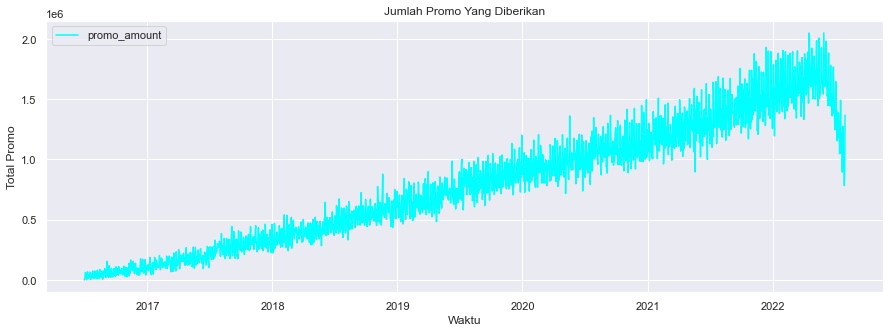

In [250]:
promo_c.plot(kind="line", color = "aqua", figsize=(15,5))
plt.xlabel("Waktu")
plt.ylabel("Total Promo")
plt.title("Jumlah Promo Yang Diberikan")
plt.show()

In [251]:
#mengecek promo yang digunakan oleh customer
dummy_df = df_trans.loc[df_trans['promo_code'] !='NOPROMO']

promo_a = dummy_df.groupby(dummy_df.created_at.dt.date)[["promo_code"]].count()
promo_a

promo_code
created_at            
2016-07-01           1
2016-07-02           2
2016-07-03           6
2016-07-04           9
2016-07-05           4
...                ...
2022-07-27         193
2022-07-28         169
2022-07-29         146
2022-07-30         175
2022-07-31         286

[2222 rows x 1 columns]

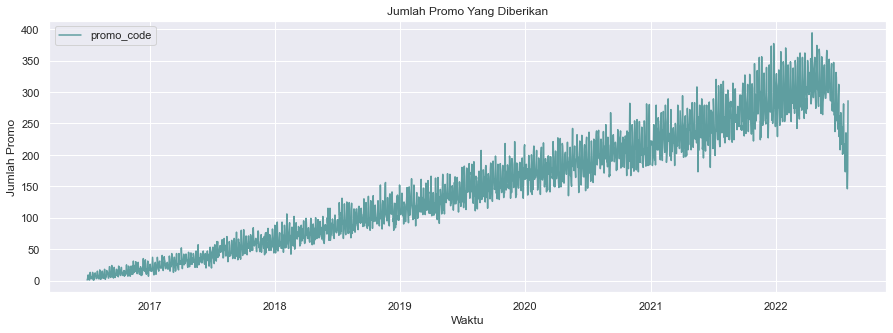

In [252]:
promo_a.plot(kind="line", color = "cadetblue", figsize=(15,5))
plt.xlabel("Waktu")
plt.ylabel("Jumlah Promo")
plt.title("Jumlah Promo Yang Diberikan")
plt.show()

In [253]:
promo_a.sort_values("created_at", ascending=False).head(20)

promo_code
created_at            
2022-07-31         286
2022-07-30         175
2022-07-29         146
2022-07-28         169
2022-07-27         193
2022-07-26         199
2022-07-25         235
2022-07-24         207
2022-07-23         173
2022-07-22         191
2022-07-21         217
2022-07-20         202
2022-07-19         217
2022-07-18         281
2022-07-17         255
2022-07-16         208
2022-07-15         201
2022-07-14         244
2022-07-13         217
2022-07-12         238

In [258]:
import plotly.express as px
import matplotlib

In [259]:
df['traffic_source'].value_counts()

1    45715
0     4989
Name: traffic_source, dtype: int64

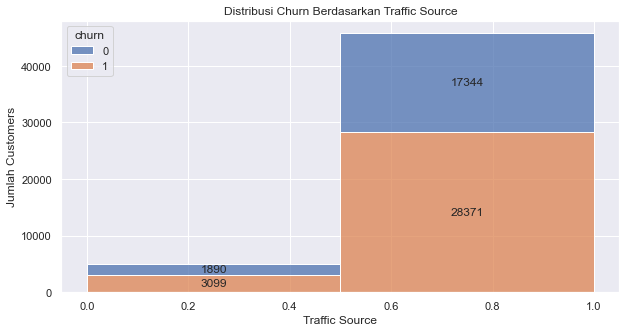

In [282]:
plt.figure(figsize=(10,5))
a = sns.histplot(df, x='traffic_source',bins=2, hue='churn', multiple='stack')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.xlabel("Traffic Source")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Traffic Source")
#plt.legend(["Not Churn", "Churn"])
plt.show()

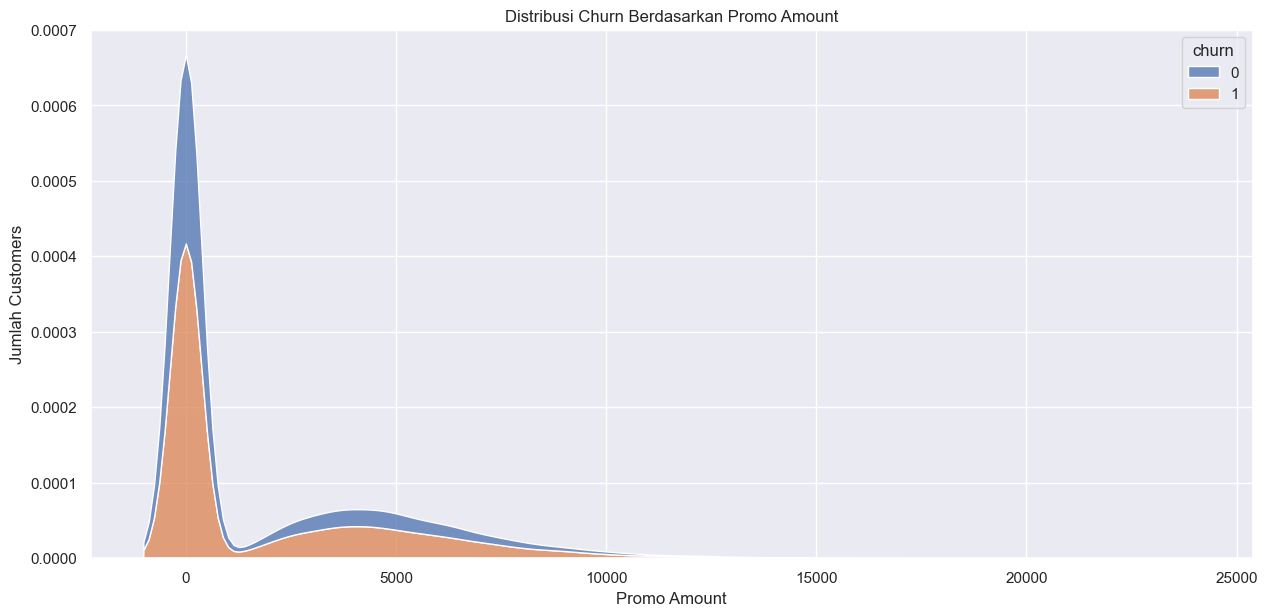

In [261]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='promo_amount', hue='churn', multiple="stack")
plt.xlabel("Promo Amount")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Promo Amount")
plt.show()

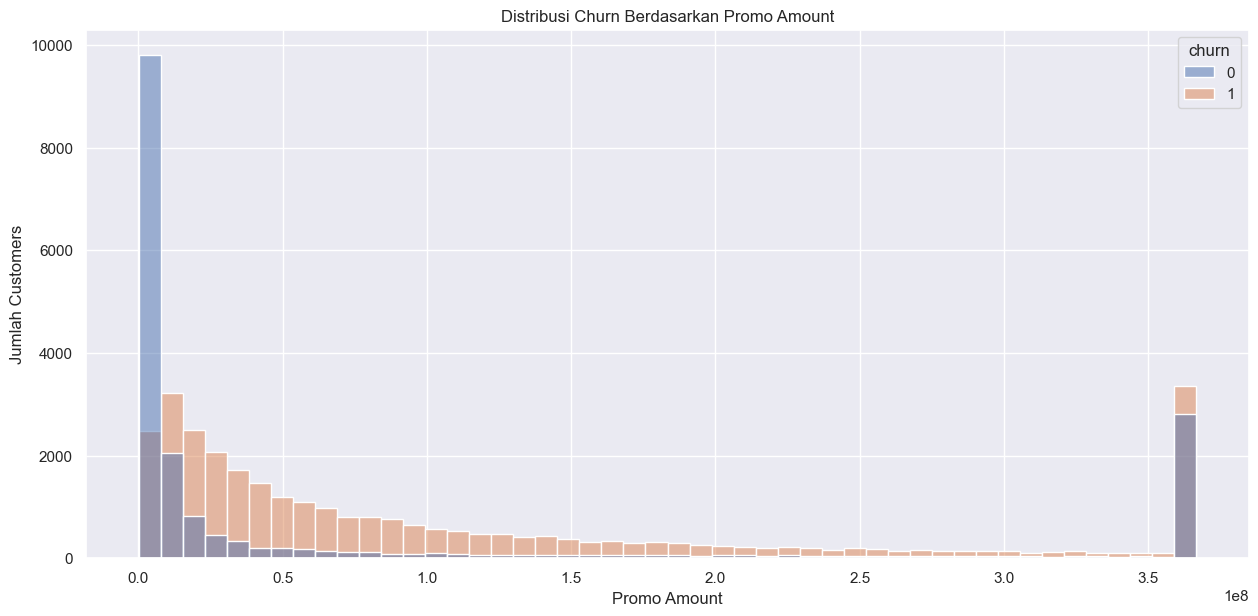

In [262]:
plt.figure(figsize=(15,7), dpi=100)
sns.histplot(df, x='monetary', hue='churn')
plt.xlabel("Promo Amount")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Promo Amount")
plt.show()

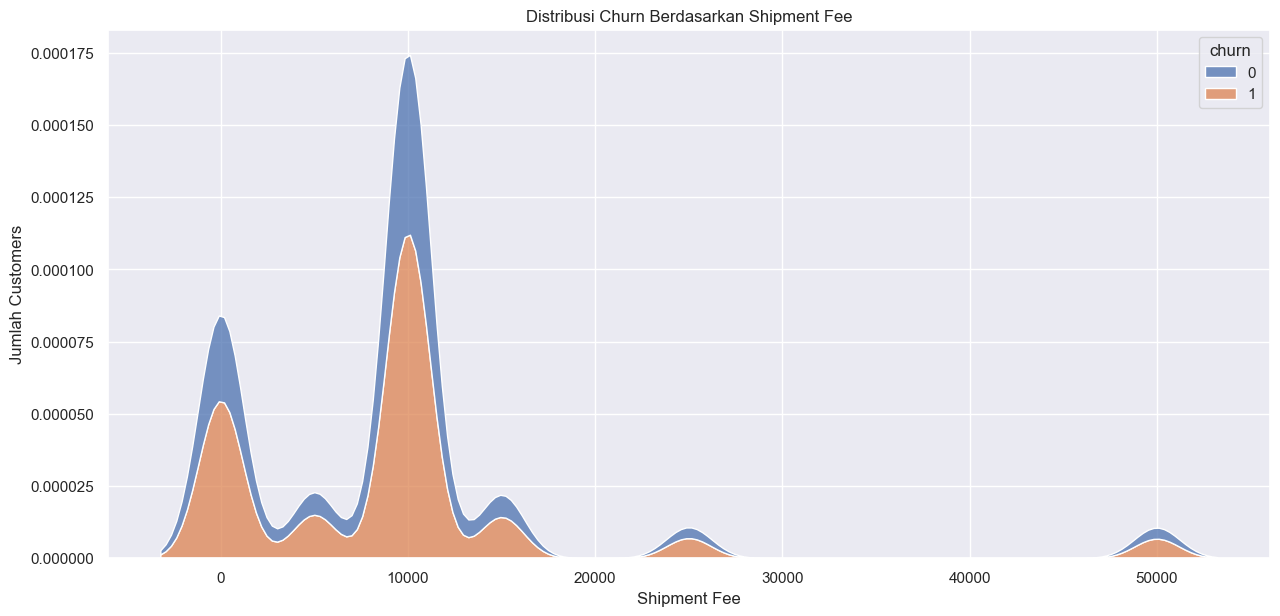

In [263]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='shipment_fee', hue='churn', multiple="stack")
plt.xlabel("Shipment Fee")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Shipment Fee")
plt.show()

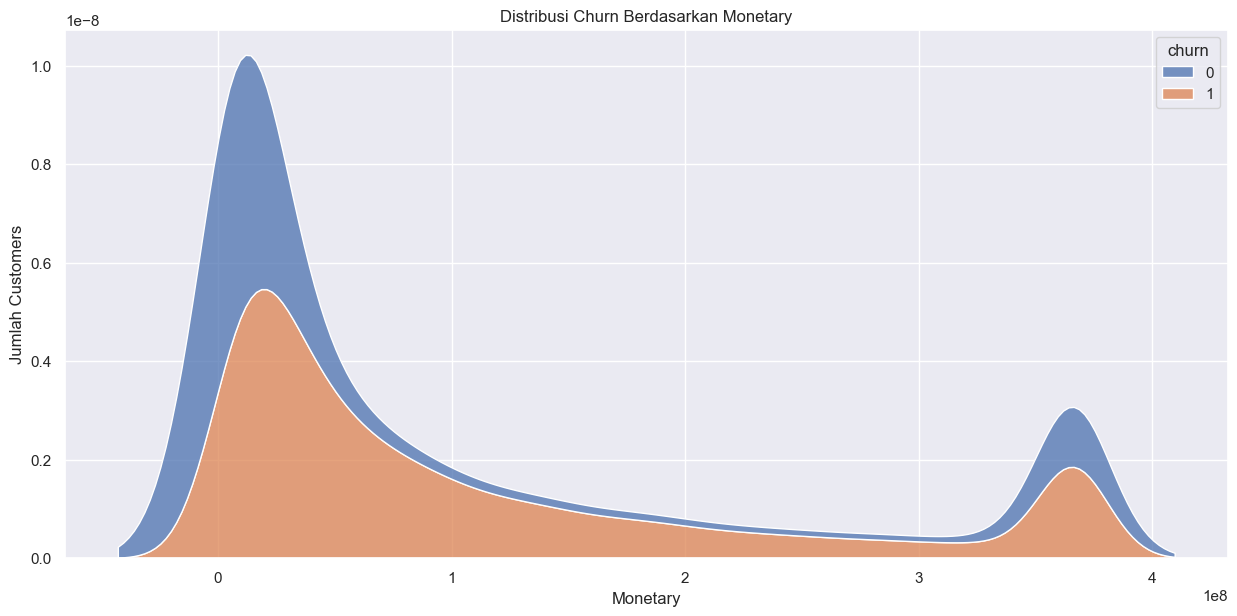

In [264]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='monetary', hue='churn', multiple="stack")
plt.xlabel("Monetary")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Monetary")
plt.show()

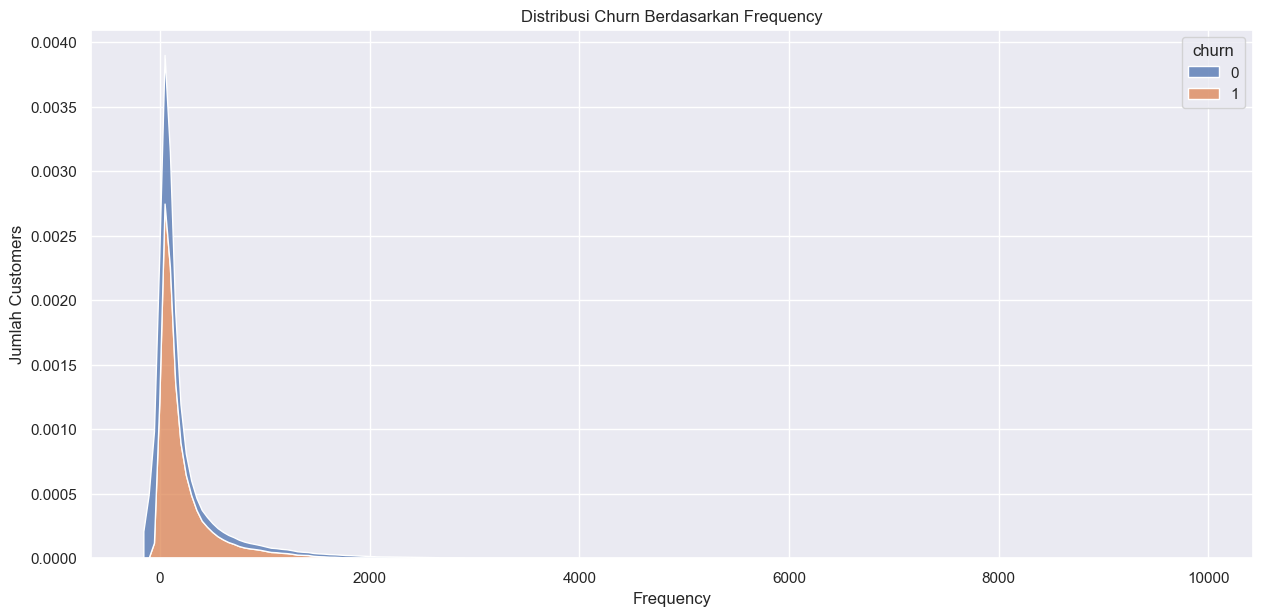

In [265]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='frequency', hue='churn', multiple="stack")
plt.xlabel("Frequency")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Frequency")
plt.show()

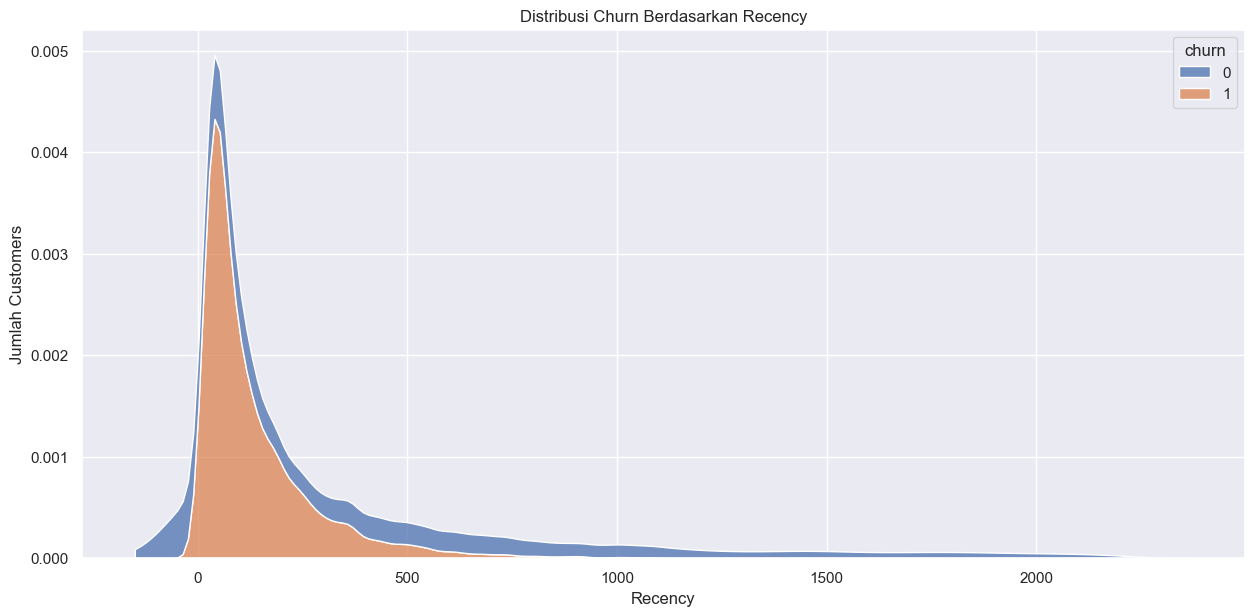

In [266]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='recent_days', hue='churn', multiple="stack")
plt.xlabel("Recency")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Recency")
plt.show()

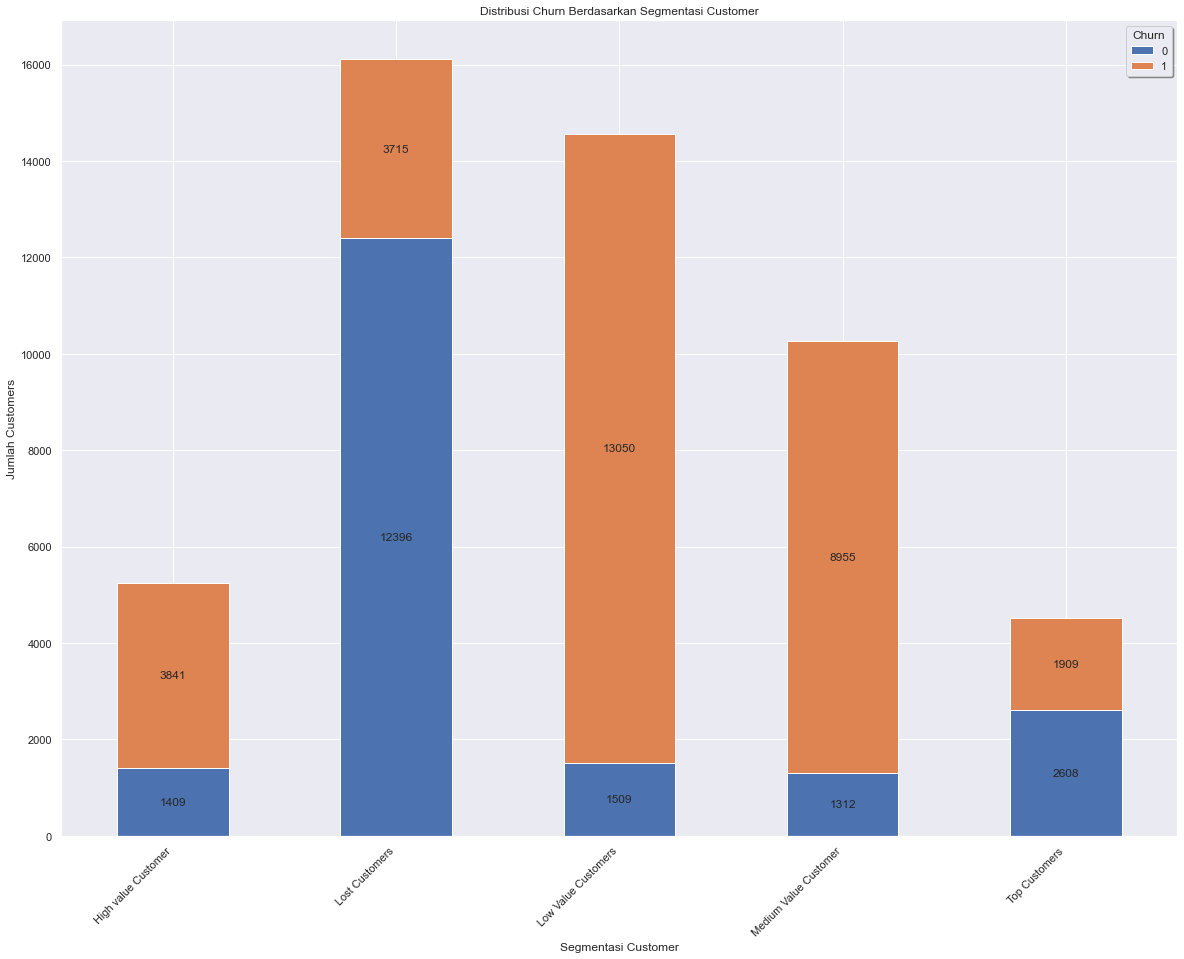

In [267]:
a = df.groupby(['Customer_segment','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,15))
for j in a.containers:
    a.bar_label(j, label_type='center', fmt='%.0f')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Segmentasi Customer")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Segmentasi Customer")
plt.legend(title = "Churn", loc = "upper right", shadow=True)
plt.show()

In [268]:
segment_churn = df.groupby(["Customer_segment","churn"])["customer_id"].count()
segment_churn

Customer_segment       churn
High value Customer    0         1409
                       1         3841
Lost Customers         0        12396
                       1         3715
Low Value Customers    0         1509
                       1        13050
Medium Value Customer  0         1312
                       1         8955
Top Customers          0         2608
                       1         1909
Name: customer_id, dtype: int64

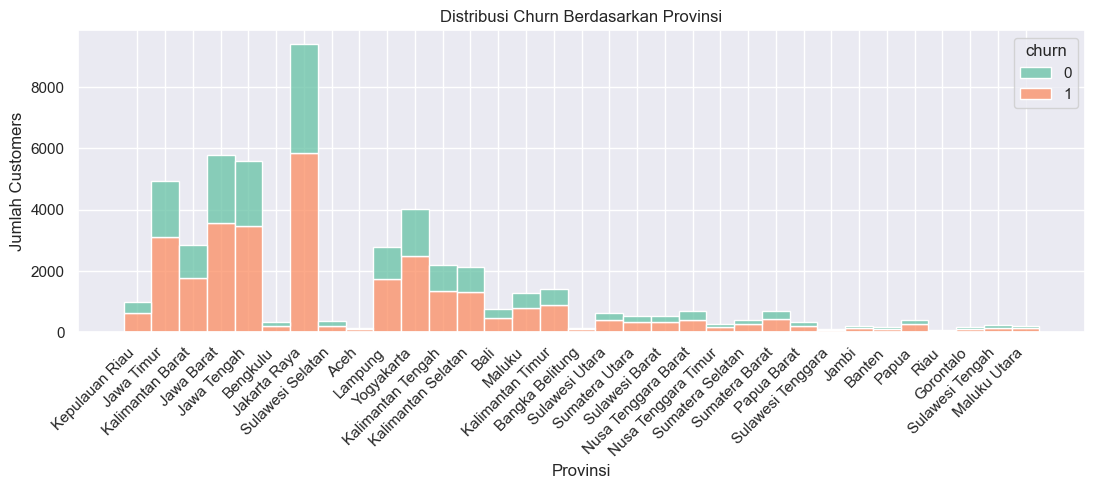

In [269]:
plt.figure(figsize=(13,4), dpi=100)
sns.histplot(df, x='home_location', hue='churn', multiple='stack', palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Provinsi")
plt.show()

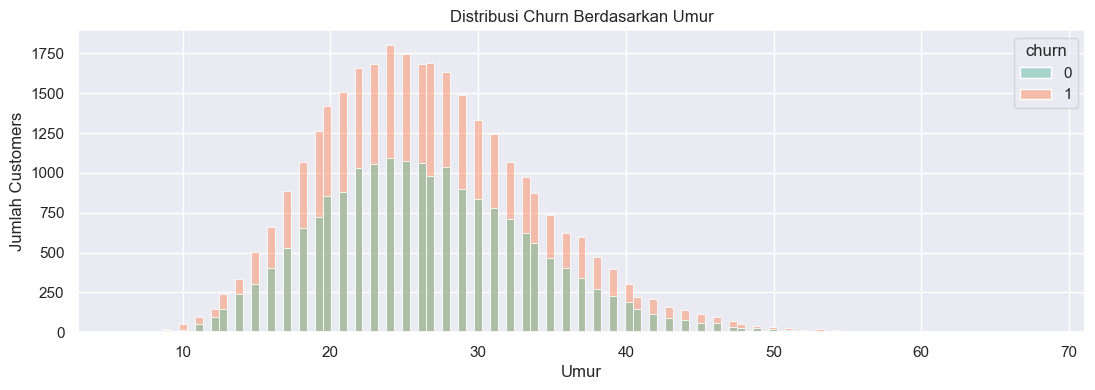

In [285]:
plt.figure(figsize=(13,4), dpi=100)
sns.histplot(df, x='age', hue='churn', palette="Set2")
plt.xlabel("Umur")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Umur")
plt.show()

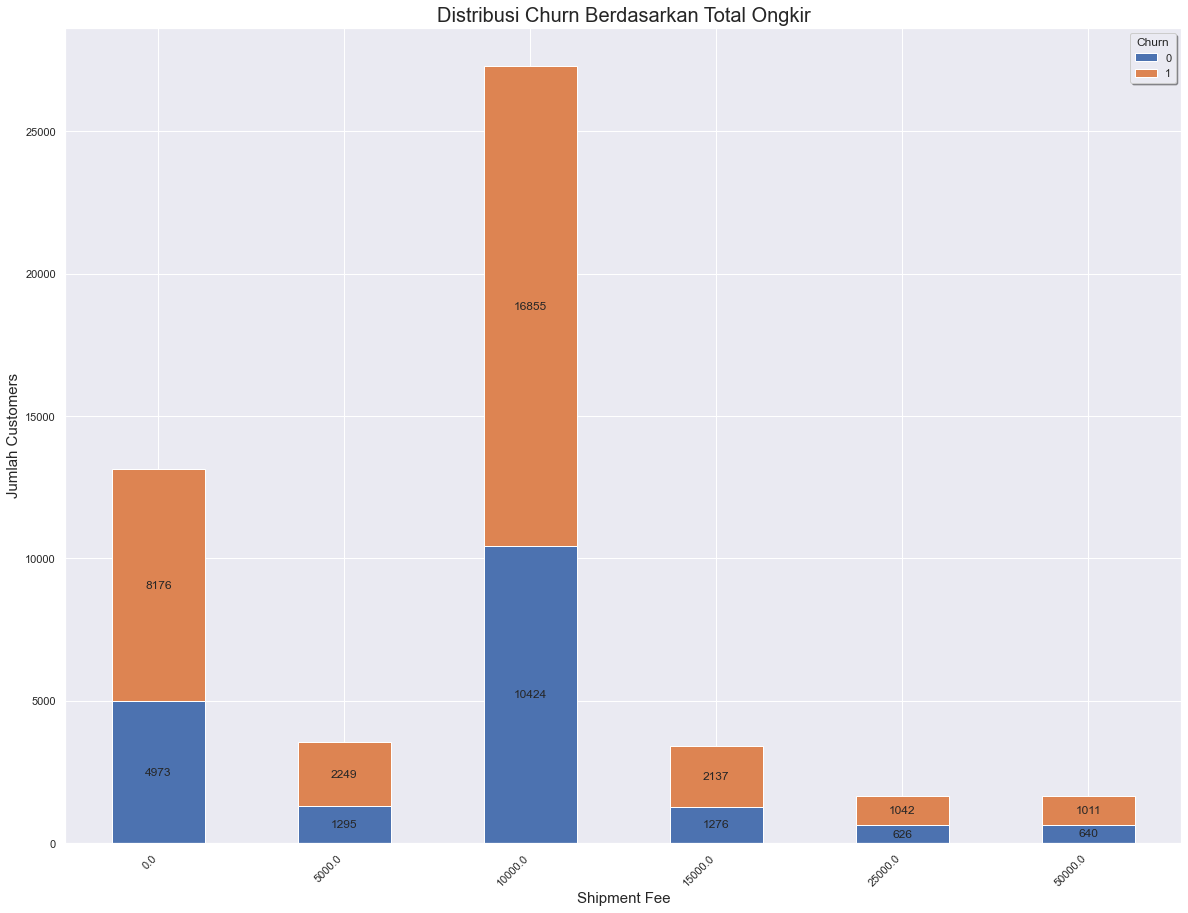

In [271]:
a = df.groupby(['shipment_fee','churn']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,15))
for j in a.containers:
    a.bar_label(j, label_type='center', fmt='%.0f')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Shipment Fee", fontsize=15)
plt.ylabel("Jumlah Customers", fontsize=15)
plt.title("Distribusi Churn Berdasarkan Total Ongkir", fontsize=20)
plt.legend(title = "Churn", loc = "upper right", shadow=True)
plt.show()

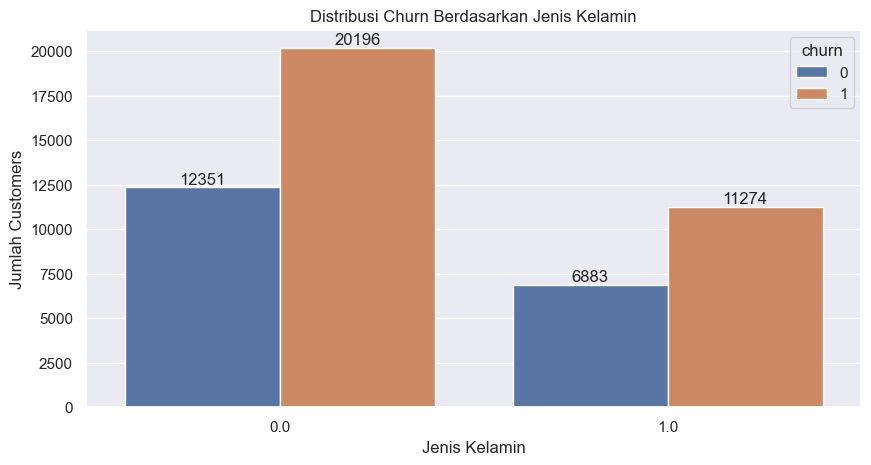

In [272]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='gender', hue='churn')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Jenis Kelamin")
plt.show()

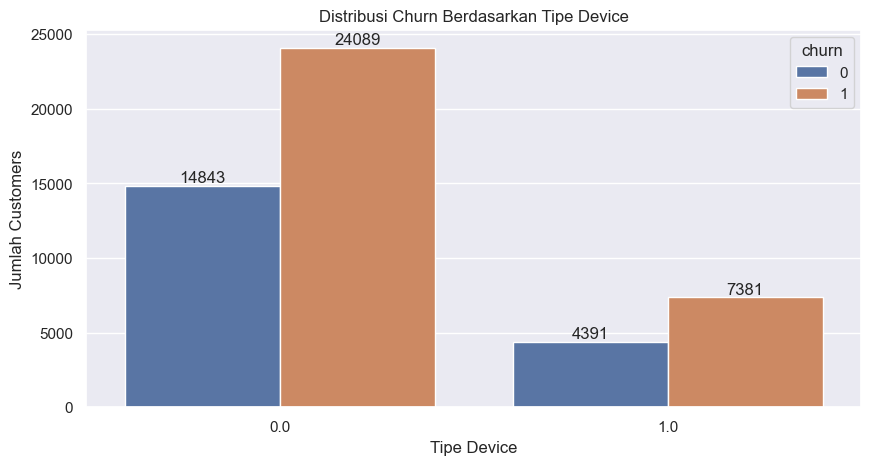

In [273]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='device_type', hue='churn')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Tipe Device")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Tipe Device")
plt.show()

In [274]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# Data Preprocessing

### Splitting Data

In [ ]:
df['churn'] = df['churn'].astype('int')
df['churn'].dtypes

In [ ]:
X = (df[['age', 'home_location', 'purchase_year', 'payment_method', 'ongkir','total_promo', 'device_type', 'gender', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'Customer_segment', 'tenure', 'monthly_spend', 'freq_diff', 'purchased_3m', 'ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', 'HOMEPAGE', 'ITEM_DETAIL', 'PROMO_PAGE', 'SCROLL', 'SEARCH']])
y = (df['churn'])

In [ ]:
X

In [ ]:
y

In [ ]:
X.isna().sum()

In [ ]:
# Isi Misiing Value dengan Modus
#X['device_type'].fillna(X['device_type'].mode()[0])

# Handling Missing Value dengan Modus
#X['gender'].fillna(X['gender'].mode()[0])


In [ ]:
X['purchased_3m'] = pd.to_numeric(X['purchased_3m'], errors='coerce')
X['gender'] = pd.to_numeric(X['gender'], errors='coerce')
X['device_type'] = pd.to_numeric(X['device_type'], errors='coerce')

### One Hot Encoding

In [ ]:
categorical_cols = X.select_dtypes('object').columns.tolist()

In [ ]:
df[categorical_cols].nunique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

In [ ]:
encoder.categories_

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

In [ ]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [ ]:
X.columns

In [ ]:
X.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

### Oversampling

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(10,5))
a = sns.countplot(y, palette="Set2", edgecolor="black")
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Churn")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn")
plt.show()

In [ ]:
# Cek Imbalance Data
#Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))


In [ ]:
plt.figure(figsize=(10,5))
a = sns.countplot(y, palette="Set2", edgecolor="black")
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Churn")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn")
plt.show()

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
#print(X)

In [ ]:
# Cek Korelasi
df_korelasi = df.corr()
df_korelasi = df_korelasi['churn'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'churn']
df_korelasi

In [ ]:
# Cek Korelasi
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Jumlah data keseluruhan
print('Jumlah data Predictor (X)  :', X.shape)
print('Jumlah data Target (y)     :', y.shape)
print('==========================================')  
# Jumlah Data Train
print('Jumlah data Train (X)      :', X_train.shape)
print('Jumlah data Train (y)      :', y_train.shape)
print('===========================================')
# Jumlah Data Test
print('Jumlah data Test (X)       :', X_test.shape)
print('Jumlah data Test (y)       :', y_test.shape)
print('===========================================')
# Jumlah Data Validation
print('Jumlah data Validation (X) :', X_val.shape)
print('Jumlah data Validation (y) :', y_val.shape)


# Modeling

Feature yang digunakan untuk modeling adalah sebagai berikut:
- age = umur customer
- gender = jenis kelamin customer
- device_type = device customer Android (0) dan IOS (1)
- home_location =  provinsi customer yang akan dilakukan one hot encoding
- purchase_year = tahun dilakukannya transaksi
- payment_method = jenis pembayaran
- total promo = total promo yang digunakan pada saat transaksi
- ongkir = ongkos kirim saat transaksi
- recent_days = recency
- frequency = frequensi belanja customer
- monetary = total belanja customer
- RFM Score = Score RFM
- Customer_segment = segmentasi customer
- tenure = feature berapa bulan antara pembelian pertama dan pembelian terakhir
- monthly_spend = total belanja customer setiap bulannya
- freq_diff = jarak rata-rata antara pembelian pertama dan kedua
- ADD_PROMO = berapa kali customer masuk ke bagian menambahkan promo
- ADD_TO_CART = berapa kali customer menambahkan product ke keranjang
- BOOKING = berapa kali customer melakukan booking
- CLICK = berapa kali customer melakukan click pada platform
- HOMEPAGE = berapa kali customer mengunjungi homepage
- ITEM_DETAIL = berapa kali customer melihat detail product
- PROMO_PAGE = berapa kali customer masuk ke halaman promo
- SCROLL = berapa kali customer scroll pada platform
- SEARCH = berapa kali customer melakukan pencarian

Dan feature target yang digunakan adalah **Churn**
- Churn = 1 jika customer masih aktif
- Churn = 0 jika customer sudah tidak aktif

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

### Logictic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)
preds[:5]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(preds, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

## Model Validation Logistic Regression

### Cross Validation 

In [ ]:
confusion_matrix(preds, y_test, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy : {:.2f}%".format(accuracy * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, preds) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, preds) * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

In [ ]:
val_preds = predict_and_plot(X_val, y_val, 'Validation')

In [ ]:
test_preds = predict_and_plot(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Logistic Regresi',mean_absolute_error(y_test, test_preds))


### Basic Validation

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Logistic Regresi',roc_auc_score(y_test, preds))

In [ ]:
def roc_curve_func(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)


  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [ ]:
y_train_pred_proba=model.predict_proba(X_train)[:,1]

In [ ]:
# Akurasi Training 
from sklearn.metrics import accuracy_score
print('Akurasi Logistic Regresi     : ',accuracy_score(y_train, train_preds))
# Recall
from sklearn.metrics import recall_score
print('Recall Logistic Regresi      : ',recall_score(y_train, train_preds))
# Precision
from sklearn.metrics import precision_score
print('Precision Logistic Regresi   : ',precision_score(y_train, train_preds))
# F1
from sklearn.metrics import f1_score
print('F1 Logistic Regresi          : ',f1_score(y_train, train_preds))
# MSE
from sklearn.metrics import mean_squared_error
print('MSE Logistic Regresi         : ',mean_squared_error(y_train, train_preds))

In [ ]:
roc_curve_func(y_train,y_train_pred_proba,'Training')

In [ ]:
roc_curve_func(y_test,test_preds,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, test_preds)))


## Support Vector Machine (SVM)

In [ ]:
# Library SVM
#%%time
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C=0.1, gamma=0.1)
model_svm.fit(X_train, y_train)


## Model Validation SVM

### Cross Validation

In [ ]:
def svm_model(inputs, targets, name='' ):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy : {:.2f}%".format(accuracy_svm * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_svm) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_svm) * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm


In [ ]:
# Training
train_svm = svm_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi SVM
pred_svm = svm_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_svm = svm_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE SVM',mean_absolute_error(y_test, pred_svm))


### Basic Validation

In [ ]:
def roc_curve_svm(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)


  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [ ]:
roc_curve_svm(y_train,train_svm,'Training')

In [ ]:
roc_curve_svm(y_test,pred_svm,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_svm, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_svm)))
                        

In [ ]:
# Akurasi Test
print('Akurasi SVM     : ',accuracy_score(y_test, pred_svm))
# Precision
print('Precision SVM   : ',precision_score(y_test, pred_svm))
# Recall
print('Recall SVM      : ',recall_score(y_test, pred_svm))
# F1
print('F1 SVM          : ',f1_score(y_test, pred_svm))
# MSE
print('MSE SVM         : ',mean_squared_error(y_test, pred_svm))
# ROC AUC
print('ROC AUC SVM     : ',roc_auc_score(y_test, pred_svm))

## Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rf.fit(X_train, y_train)

In [ ]:
# Prediksi Random Forest
rf_mod = model_rf.predict(X_test)
rf_mod[:5]

## Model Validation Random Forest

### Cross Validation

In [ ]:
def rf_model(inputs, targets, name=''):
    pred_rf = model.predict(inputs)
    accuracy_rf = accuracy_score(targets,pred_rf)
    print("Accuracy : {:.2f}%".format(accuracy_rf * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_rf) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_rf) * 100))

    cm = confusion_matrix(targets, pred_rf, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_rf


In [ ]:
# Training
train_rf = rf_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Random Forest
pred_rf = rf_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_rf = rf_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Random Forest',mean_absolute_error(y_test, pred_rf))

### Basic Validation

In [ ]:
def roc_curve_rf(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_curve_rf(y_train,train_rf,'Training')

In [ ]:
roc_curve_rf(y_test,pred_rf,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_rf)))
                        

In [ ]:
# Graph Model
from sklearn import tree
plt.figure(figsize=(30,25), dpi=100)
tree.plot_tree(model_rf.estimators_[0], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False, proportion=True, precision=2, label='all')
#tree.plot_tree(model_rf.estimators_[1], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False)
plt.show()

In [ ]:
# Akurasi
print('Akurasi Random Forest     : ',accuracy_score(y_test, pred_rf))
# Precision
print('Precision Random Forest   : ',precision_score(y_test, pred_rf))
# Recall
print('Recall Random Forest      : ',recall_score(y_test, pred_rf))
# F1
print('F1 Random Forest          : ',f1_score(y_test, pred_rf))
# MSE
print('MSE Random Forest         : ',mean_squared_error(y_test, pred_rf))
# ROC AUC
print('ROC AUC Random Forest     : ',roc_auc_score(y_test, pred_rf))


## Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy',  max_depth=3, min_samples_leaf=3)
model_dt.fit(X_train, y_train)


In [ ]:
dt_mod = model_dt.predict(X_test)
dt_mod[:5]

## Model Validation Decision Tree

### Cross Validation

In [ ]:
def dt_model(inputs, targets, name=''):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

In [ ]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Decision Tree
dt_pred = dt_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_dt = dt_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Decision Tree',mean_absolute_error(y_test, dt_pred))


### Basic Validation

In [ ]:
def roc_curve_dt(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_curve_dt(y_train,train_dt,'Training')

In [ ]:
roc_curve_dt(y_test, dt_pred,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, dt_pred)))
                        

In [ ]:
# Pohon Keputusan
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, rounded=True, class_names=['No', 'Yes'], feature_names=X.columns);
plt.show()

In [ ]:
# Akurasi
print('Akurasi Decision Tree     : ',accuracy_score(y_test, dt_pred))
# Precision
print('Precision Decision Tree   : ',precision_score(y_test, dt_pred))
# Recall
print('Recall Decision Tree      : ',recall_score(y_test, dt_pred))
# F1
print('F1 Decision Tree          : ',f1_score(y_test, dt_pred))
# MSE
print('MSE Decision Tree         : ',mean_squared_error(y_test, dt_pred))
# ROC AUC
print('ROC AUC Decision Tree     : ',roc_auc_score(y_test, dt_pred))


## Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB(var_smoothing=1e-09)
model_nb.fit(X_train, y_train)

In [ ]:
nb_mod = model_nb.predict(X_test)
nb_mod[:5]

## Model Validation Naive Bayes

### Cross Validation

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))
    

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

In [ ]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_nb = nb_model(X_val, y_val, 'Validation')


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))


### Basic Validation

In [ ]:
def roc_curve_nb(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")


In [ ]:
roc_curve_nb(y_train,train_nb,'Training')

In [ ]:
roc_curve_nb(y_test, nb_pred,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_nb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, nb_pred)))
                        

In [ ]:
# Akurasi
print('Akurasi Naive Bayes     : ',accuracy_score(y_test, nb_pred))
# Precision
print('Precision Naive Bayes   : ',precision_score(y_test, nb_pred))
# Recall
print('Recall Naive Bayes      : ',recall_score(y_test, nb_pred))
# F1
print('F1 Naive Bayes          : ',f1_score(y_test, nb_pred))
# MSE
print('MSE Naive Bayes         : ',mean_squared_error(y_test, nb_pred))
# ROC AUC
print('ROC AUC Naive Bayes     : ',roc_auc_score(y_test, nb_pred))


## Jaringan Syaraf Tiruan (ANN)

In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# Model ANN
model_ann = Sequential()
# Input Layer
model_ann.add(tf.keras.layers.Dense(62, input_dim=66, activation='relu'))
# Hidden Layer 1
model_ann.add(tf.keras.layers.Dense(32, activation='relu'))
# Hidden Layer 2
model_ann.add(tf.keras.layers.Dense(32, activation='relu'))
# Hidden Layer 3
model_ann.add(tf.keras.layers.Dense(16, activation='relu'))
# Hiden Layer 4
model_ann.add(tf.keras.layers.Dense(16, activation='relu'))
# Output Layer
model_ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_ann.summary()


In [ ]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_ann.fit(X_train,y_train, epochs=100,
                steps_per_epoch=10, batch_size=32, 
                validation_data=(X_val, y_val), validation_steps=10)

In [ ]:
# Prediksi ANN
ann_pred = (model_ann.predict(X_test)>0.5).astype("int32")
ann_pred[:5]

In [ ]:
# Akurasi ANN
model_ann.evaluate(X_test, y_test)[1]

In [ ]:
print(accuracy_score(y_test, ann_pred))

In [ ]:
# Confusion Matrix ANN
cm = confusion_matrix(y_test, ann_pred, normalize='true')
plt.figure()
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, ann_pred))


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE ANN',mean_absolute_error(y_test, ann_pred))


In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC ANN',roc_auc_score(y_test, ann_pred))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, ann_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ANN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Akurasi ANN
akurasi = model_ann.evaluate(X_test, y_test)[1]
print('Akurasi ANN      : ', akurasi)
# Recall ANN
print('Recall ANN       : ',recall_score(y_test, ann_pred))
# Precision ANN
print('Precision ANN    : ',precision_score(y_test, ann_pred))
# F1 ANN
print('F1 ANN           : ',f1_score(y_test, ann_pred))
# MSE
print('MSE ANN          : ',mean_squared_error(y_test, ann_pred))
# ROC AUC ANN
print('ROC AUC ANN      : ',roc_auc_score(y_test, ann_pred))



## K Nearest Neighbors (KNN)

In [ ]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
model_knn.fit(X_train, y_train)

In [ ]:
knn_mod = model_knn.predict(X_test)
knn_mod[:5]

## Model Validation KNN

### Cross Validation

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn) * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn) * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

In [ ]:
# Train
knn_train = knn_model(X_train, y_train, name='Train')

In [ ]:
# Test
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
# Validation
knn_val = knn_model(X_val, y_val, name='Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE KNN',mean_absolute_error(y_test, knn_pred))


### Basic Validation

In [ ]:
def roc_auc_knn(y_test, y_pred, name=''):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(name))
    plt.legend(loc="lower right")

In [ ]:
roc_auc_knn(y_train, knn_train, name='Train')

In [ ]:
roc_auc_knn(y_test, knn_pred, name='Test')

In [ ]:
# Akurasi KNN
print('Akurasi KNN      : ',model_knn.score(X_test, y_test))
# Recall KNN
print('Recall KNN       : ',recall_score(y_test, knn_pred))
# Precision KNN
print('Precision KNN    : ',precision_score(y_test, knn_pred))
# F1 KNN
print('F1 KNN           : ',f1_score(y_test, knn_pred))
# MSE
print('MAE KNN          : ', mean_absolute_error(y_test, knn_pred))
# ROC AUC
print('ROC AUC KNN      : ',roc_auc_score(y_test, knn_pred))


In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, knn_pred)))
                     

In [ ]:
# Mencari nilai K terbaik
from sklearn.model_selection import cross_val_score
accuracies = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), accuracies)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
print("Nilai K terbaik adalah ", accuracies.index(max(accuracies))+1)
print("Akurasi sebesar", round(max(accuracies)*100), "%")

# Hyperparameter Tuning


Berdasarkan model yang telah dibuat, maka akan dilakukan hyperparameter tuning untuk meningkatkan performa model. Model yang akan dilakukan hyperparameter tuning adalah Model K-Nearest Neighbors. Kami memilih model tersebut karena nilai recall dan akurasi yang paling tinggi diantara model yang lain. Disini kami menggunakan GridSearchCV untuk melakukan hyperparameter tuning. GridSearchCV akan melakukan perulangan untuk setiap kombinasi parameter yang telah ditentukan. Setelah melakukan perulangan, GridSearchCV akan mengembalikan parameter terbaik yang akan digunakan untuk membuat model terbaik. Kami mencoba untuk menaikan nilai recall dan akurasi model dan mengurangi nilai eror yaitu MAE.

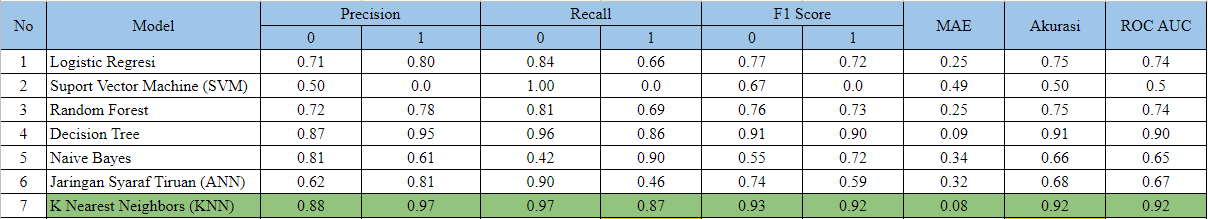

### K-Nearest Neighbors (KNN) Hyperparameter Tuning


In [ ]:
# Hyperparameter Tuning (KNN)
from sklearn.model_selection import GridSearchCV
param_knn = {'n_neighbors': np.arange(1, 25), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

In [ ]:
pred_grid_knn = grid_knn.predict(X_test)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_grid_knn))

In [ ]:
# Hasil Hyperparameter Tuning (KNN)
#print('Best Score       : ', grid_knn.best_score_)
print('Best Params      : ', grid_knn.best_params_)
print('Best Estimator   : ', grid_knn.best_estimator_)
print('Best Index       : ', grid_knn.best_index_)
print('=======================================================')
# Akurasi KNN
print('Akurasi KNN      : ',grid_knn.score(X_test, y_test))
# Recall KNN
print('Recall KNN       : ',recall_score(y_test, pred_grid_knn))
# Precision KNN
print('Precision KNN    : ',precision_score(y_test, pred_grid_knn))
# F1 KNN
print('F1 KNN           : ',f1_score(y_test, pred_grid_knn))
# MAE
print('MAE KNN          : ',mean_absolute_error(y_test, pred_grid_knn))
# ROC AUC
print('ROC AUC KNN      : ',roc_auc_score(y_test, pred_grid_knn))

## Kesimpulan Model

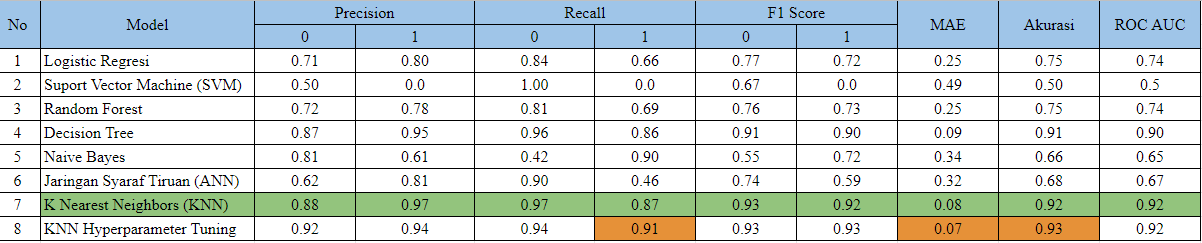